## Business Questions:
> ### How well are female students represented across different demographics and across different colleges?

In [413]:
# Import Python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import chart_studio.plotly as py
from chart_studio.plotly import iplot
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

# Regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
import statsmodels
from scipy import stats
from pandas.plotting import scatter_matrix
import scipy.stats as stats

# Classification Model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

## 1. Import Dataset 
Data Description:
* Collected undergraduate student applicant data from the Kansas State University Student Information System (KSIS) 
* Student applicant demographics
* Years: 2012 through 2019

Data Fields:
> * ID: equivalent to primary key identifier
> * State: continental US States only
> * Age 
> * Gender
> * Citizenship: As disclosed by student during application process; for US students populated with 'US'
> * Ethnicity: as given by student during application process
> * Residency: IS = In-State (KS); OS = Out of State (non-KS)
> * Admit Term
> * College: college and program that student has applied to
> * Degree / Non-Degree: status of application for degree program vs. non-degree program (e.g. certificate)
> * Application Center: K-State campust to which student has applied
> * Admit Type: traditional freshmen, re-admits, online students, or transfer students
> * Status: current status of student's application / program 
> * Application Date: date when application was submitted to / received by K-State
> * Admit Status: derived from now deleted column 'Admit Date', which if exists = 'Admitted', otherwise: 'Not Admitted'
> * Enrolled Status: derived from now deleted column 'Enrollment Date', which if exists = 'Enrolled', otherwise: 'Not Enrolled'
> * Withdrew?: did the student at any point withdraw after having been admitted

Pre-Processing Steps:
* Data pre-cleaned via Excel:
> * Verified data consistency, integrity, and accuracy
> * Deleted identifing information and non-demographic data
> * Original 185 data points reduced to 17

In [2]:
# Read and save master data file to continue processing
stdnt_data = pd.read_excel('Student Data 2012 - 2019.xlsx')
stdnt_data.head()

ID State   Age Gender Citizenship         Ethnicity Residency  \
0  132441    KS  70.0      M          US  African American        IS   
1  921672    CA  69.0      M          US             White        OS   
2  922050    KS  67.0      M          US             White        IS   
3  922182    KS  63.0      F          US             White        IS   
4  905009    KS  63.0      M          US             White        IS   

  Admit Term                  College Degree / Non-Degree  \
0  Fall 2019  Health & Human Sciences              Degree   
1  Fall 2019              Agriculture          Non-Degree   
2  Fall 2019    Technology & Aviation          Non-Degree   
3  Fall 2019  Health & Human Sciences          Non-Degree   
4  Fall 2019          Arts & Sciences              Degree   

      Application Center Admit Type     Status Application Date Admit Status  \
0          Global Campus     Online  Cancelled       2019-05-16     Admitted   
1          Global Campus     Online     Active       2019-07-25     Admitted   
2            Polytechnic   Freshman     Active       2019-08-05     Admitted   
3          Global Campus   Transfer     Active       2019-08-07     Admitted   
4  Manhattan Main Campus    Readmit     Active       2019-05-21     Admitted   

  Enrolled Status Withdrew?  
0    Not Enrolled         N  
1    Not Enrolled         N  
2        Enrolled         N  
3    Not Enrolled         N  
4        Enrolled         N

## 2. Data Transformation and Cleaning

In [3]:
# Verify data types in file
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                101086 non-null  object        
 2   Age                  111614 non-null  float64       
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

> Looking at the counts we can see that there are some null values in the 'State' and 'Age' columns.

In [4]:
# Fill cells with null values 
stdnt_data = stdnt_data.fillna({'State':'No State'})

In [5]:
# Find mean age to fill null value(s)
stdnt_data['Age'].mean()

20.38497858691562

In [6]:
# Replace null values with mean age (rounded)
stdnt_data = stdnt_data.fillna({'Age':20})

In [7]:
#Verify no remaining null values
stdnt_data.isnull().sum()

ID                     0
State                  0
Age                    0
Gender                 0
Citizenship            0
Ethnicity              0
Residency              0
Admit Term             0
College                0
Degree / Non-Degree    0
Application Center     0
Admit Type             0
Status                 0
Application Date       0
Admit Status           0
Enrolled Status        0
Withdrew?              0
dtype: int64

In [8]:
# Change data type of age from float to int; this removes the decimal
stdnt_data['Age'] = stdnt_data['Age'].astype('int64')
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                111615 non-null  object        
 2   Age                  111615 non-null  int64         
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

In [9]:
stdnt_data.head(1)

ID State  Age Gender Citizenship         Ethnicity Residency  \
0  132441    KS   70      M          US  African American        IS   

  Admit Term                  College Degree / Non-Degree Application Center  \
0  Fall 2019  Health & Human Sciences              Degree      Global Campus   

  Admit Type     Status Application Date Admit Status Enrolled Status  \
0     Online  Cancelled       2019-05-16     Admitted    Not Enrolled   

  Withdrew?  
0         N

In [10]:
# Basic statistics of numeric column 'Age'
stdnt_data['Age'].describe()

count    111615.000000
mean         20.384975
std           5.276311
min          13.000000
25%          18.000000
50%          18.000000
75%          20.000000
max          80.000000
Name: Age, dtype: float64

> This basic statistical overview of age, shows us that we have a minimum age value of 13. While we may find during later analysis that this inaccurate, at this time, since we have high school admit types, we will assume it is in fact an accurate depiction of age for an applicant. Therefore we will keep this and not make any changes at this time. 

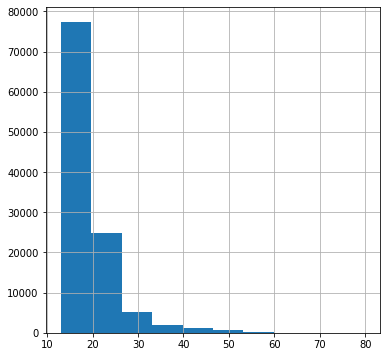

In [11]:
# Histogram of age distribution
stdnt_data['Age'].hist(figsize=(6,6))

> This visual shows that majority of students are around the age of 20 which agrees with our mean age of 20.38 years.

## 3. Verify Data Accuracy and Integrity
> Use of Group By to allow for quick overview of counts

In [12]:
# Grouping by admit status and enrolled status allows for counts and checking for inaccuracies;
# Students who are not admitted should not show as 'Enrolled'; 
Adm_Enrolled = stdnt_data.groupby(['Admit Status', 'Enrolled Status']).size()
Adm_Enrolled

Admit Status  Enrolled Status
Admitted      Enrolled           51151
              Not Enrolled       55255
Not Admitted  Not Enrolled        5209
dtype: int64

> Results show that we have indeed no enrollments for non-admits

In [13]:
# Ensuring no withdrawals for non-admits
Adm_Withdr = stdnt_data.groupby(['Admit Status', 'Withdrew?']).size()
Adm_Withdr

Admit Status  Withdrew?
Admitted      N            105536
              Y               870
Not Admitted  N              5209
dtype: int64

> Results show that we have no withdrawals for non-admits and a total of 870 withdrawals for previously admitted students

### We now have a dataset that no longer contains any null values. The validity of the data has been verified by looking at groupings and counts and we can proceed with further analysis. 

## 4. Exploratory Data Analysis

In [14]:
# Group by Status
status = stdnt_data.groupby('Status').size()
status

Status
Active                  61082
Admitted                26322
Application Deferred      552
Applied                  2646
Cancelled               20123
Denied                    819
Discontinued               71
dtype: int64

In [15]:
# Group by Admit Type
admit_type = stdnt_data.groupby('Admit Type').size()
admit_type

Admit Type
Freshman         67874
High School       1665
International    10300
Online            7127
Other               36
Readmit           6000
Transfer         18613
dtype: int64

In [16]:
# Group by Age
age = stdnt_data.groupby('Age').size()
age

Age
13       1
14      14
15     105
16     440
17    2639
      ... 
71       1
72       2
74       2
77       1
80       1
Length: 63, dtype: int64

In [17]:
# Group by Ethnicity for preliminary counts
eth = stdnt_data.groupby('Ethnicity').size()
eth

Ethnicity
African American              7277
Asian                         8709
Hawaiian Pacific Islander      162
Hispanic                     10558
Multi Racial                  4333
Native American                550
Not Specified                 2517
WHITE                            1
White                        77508
dtype: int64

In [18]:
# Group by College / Program
college = stdnt_data.groupby('College').size()
college

College
Agriculture                14085
Architecture                2740
Arts & Sciences            38949
Business Administration    14601
Education                   5632
Engineering                18290
Health & Human Sciences    12005
Technology & Aviation       5313
dtype: int64

In [19]:
# Group by Admit Term
term = stdnt_data.groupby('Admit Term').size()
term

Admit Term
Fall 2012      12556
Fall 2013      12714
Fall 2014      12671
Fall 2015      11680
Fall 2016      11382
Fall 2017      10368
Fall 2018      12233
Fall 2019      12037
Spring 2012      648
Spring 2013     2554
Spring 2014     2275
Spring 2015     2088
Spring 2016     1997
Spring 2017     1888
Spring 2018     2442
Spring 2019     2082
dtype: int64

In [20]:
# Dropping values that are not significant or relevant in the scope of further analysis
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Admit Type'] == "High School"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Admit Type'] == "Other"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Age'] < 17].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Age'] > 60].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Ethnicity']== "WHITE"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Ethnicity']== "Not Specified"].index)
stdnt_data.head()

ID State  Age Gender Citizenship         Ethnicity Residency  \
7   919451    MO   60      F          US  African American        OS   
8   172358    TX   60      F          US             White        OS   
9   135435    KS   59      M          US  African American        IS   
10  922350    KS   58      F          US             White        IS   
11  916358    TX   58      M          US             White        OS   

   Admit Term                  College Degree / Non-Degree  \
7   Fall 2019  Business Administration              Degree   
8   Fall 2019              Agriculture              Degree   
9   Fall 2019  Health & Human Sciences              Degree   
10  Fall 2019          Arts & Sciences              Degree   
11  Fall 2019  Health & Human Sciences              Degree   

       Application Center Admit Type     Status Application Date  \
7           Global Campus     Online  Cancelled       2019-06-08   
8           Global Campus     Online     Active       2019-04-16   
9   Manhattan Main Campus    Readmit     Active       2018-09-18   
10  Manhattan Main Campus   Transfer    Applied       2019-08-09   
11          Global Campus     Online  Cancelled       2019-04-30   

    Admit Status Enrolled Status Withdrew?  
7   Not Admitted    Not Enrolled         N  
8       Admitted    Not Enrolled         N  
9       Admitted    Not Enrolled         N  
10  Not Admitted    Not Enrolled         N  
11  Not Admitted    Not Enrolled         N

In [21]:
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['College']== "Education"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['College']== "Architecture"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['College']== "Technology & Aviation"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['College']== "Health & Human Sciences"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['College']== "Agriculture"].index)

In [22]:
college = stdnt_data.groupby('College').size()
college

College
Arts & Sciences            37634
Business Administration    14239
Engineering                17652
dtype: int64

In [23]:
# Replacing categorical values with numerical values (adding new column for College: College2)
stdnt_data['Admitted'] = stdnt_data['Admit Status'].map({'Admitted': 1, 'Not Admitted': 0})
stdnt_data['Enrolled'] = stdnt_data['Enrolled Status'].map({'Enrolled': 1, 'Not Enrolled': 0})
stdnt_data['Withdrew'] = stdnt_data['Withdrew?'].map({'Y': 1, 'N': 0})
stdnt_data['Deferred'] = stdnt_data['Status'].map({'Active': 0, 'Admitted': 0, 'Application Deferred': 1, 'Applied': 0, 'Cancelled': 0, 'Denied': 0, 'Discontinued':0})
stdnt_data['Applied'] = stdnt_data['Status'].map({'Active': 0, 'Admitted': 0, 'Application Deferred': 0, 'Applied': 1, 'Cancelled': 0, 'Denied': 0, 'Discontinued':0})
stdnt_data['Cancelled App'] = stdnt_data['Status'].map({'Active': 0, 'Admitted': 0, 'Application Deferred': 0, 'Applied': 0, 'Cancelled': 1, 'Denied': 0, 'Discontinued':0})
stdnt_data['Denied'] = stdnt_data['Status'].map({'Active': 0, 'Admitted': 0, 'Application Deferred': 0, 'Applied': 0, 'Cancelled': 0, 'Denied': 1, 'Discontinued':0})
stdnt_data['Discontinued'] = stdnt_data['Status'].map({'Active': 0, 'Admitted': 0, 'Application Deferred': 0, 'Applied': 0, 'Cancelled': 0, 'Denied': 0, 'Discontinued':1})
stdnt_data['In-State'] = stdnt_data['Residency'].map({'IS': 1, 'OS':0})
stdnt_data['Freshman'] = stdnt_data['Admit Type'].map({'Freshman': 1, 'International': 0, 'Online': 0, 'Transfer': 0, 'Readmit': 0})
stdnt_data['International'] = stdnt_data['Admit Type'].map({'Freshman': 0, 'International': 1, 'Online': 0, 'Transfer': 0, 'Readmit': 0})
stdnt_data['Online'] = stdnt_data['Admit Type'].map({'Freshman': 0, 'International': 0, 'Online': 1, 'Transfer': 0, 'Readmit': 0})
stdnt_data['Transfer'] = stdnt_data['Admit Type'].map({'Freshman': 0, 'International': 0, 'Online': 0, 'Transfer': 1, 'Readmit': 0})
stdnt_data['Readmit'] = stdnt_data['Admit Type'].map({'Freshman': 0, 'International': 0, 'Online': 0, 'Transfer': 0, 'Readmit': 1})
stdnt_data['Female'] = stdnt_data['Gender'].map({'F': 1, 'M': 0})
stdnt_data['Male'] = stdnt_data['Gender'].map({'F': 0, 'M': 1})
stdnt_data['Degree'] = stdnt_data['Degree / Non-Degree'].map({'Degree': 1, 'Non-Degree': 0})
stdnt_data['Native American'] = stdnt_data['Ethnicity'].map({'Native American': 1, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['Hawaiian Pac.'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 1, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['Multi Racial'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 1, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['African American'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 1, 'Asian': 0, 'Hispanic': 0, 'White': 0})
stdnt_data['Asian'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 1, 'Hispanic': 0, 'White': 0})
stdnt_data['Hispanic'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 1, 'White': 0})
stdnt_data['White'] = stdnt_data['Ethnicity'].map({'Native American': 0, 'Hawaiian Pacific Islander': 0, 'Multi Racial': 0, 'African American': 0, 'Asian': 0, 'Hispanic': 0, 'White': 1})
stdnt_data['Ethnicity'] = stdnt_data['Ethnicity'].map({'Native American': 'NA', 'Hawaiian Pacific Islander': 'HPI', 'Multi Racial': 'MR', 'African American': 'AA', 'Asian': 'AS', 'Hispanic': 'HS', 'White': 'WH'})
stdnt_data['Business'] = stdnt_data['College'].map({'Business Administration': 1, 'Engineering': 0, 'Arts & Sciences': 0})
stdnt_data['Engineering'] = stdnt_data['College'].map({'Business Administration': 0, 'Engineering': 1, 'Arts & Sciences': 0})
stdnt_data['Arts & Sciences'] = stdnt_data['College'].map({'Business Administration': 0, 'Engineering': 0, 'Arts & Sciences': 1})
stdnt_data['Year'] = stdnt_data['Admit Term'].map({'Fall 2012': 2012, 'Spring 2012': 2012, 'Fall 2013': 2013, 'Spring 2013': 2013, 'Fall 2014': 2014, 'Spring 2014': 2014, 'Fall 2015': 2015, 'Spring 2015': 2015, 'Fall 2016': 2016, 'Spring 2016': 2016, 'Fall 2017': 2017, 'Spring 2017': 2017, 'Fall 2018': 2018, 'Spring 2018': 2018, 'Fall 2019': 2019, 'Spring 2019': 2019})

In [24]:
stdnt_data = stdnt_data.drop(['ID', 'Admit Term','Application Center','College', 'Admit Type', 'Status','Gender','Admit Status', 'Enrolled Status','Residency','Ethnicity', 'Degree / Non-Degree', 'Withdrew?'], axis=1)

In [25]:
#Verifying accuracy of data after adding numerical columns
stdnt_data.head(5)

State  Age Citizenship Application Date  Admitted  Enrolled  Withdrew  \
7         MO   60          US       2019-06-08         0         0         0   
10        KS   58          US       2019-08-09         0         0         0   
18  No State   55         COL       2018-11-30         0         0         0   
20        KS   55          US       2019-08-29         1         0         1   
22        KS   55          US       2019-06-21         1         0         1   

    Deferred  Applied  Cancelled App  ...  Hawaiian Pac.  Multi Racial  \
7          0        0              1  ...              0             0   
10         0        1              0  ...              0             0   
18         0        1              0  ...              0             0   
20         0        0              0  ...              0             0   
22         0        0              0  ...              0             0   

    African American  Asian  Hispanic  White  Business  Engineering  \
7                  1      0         0      0         1            0   
10                 0      0         0      1         0            0   
18                 0      0         1      0         0            0   
20                 0      0         0      1         0            0   
22                 0      0         0      1         0            0   

    Arts & Sciences  Year  
7                 0  2019  
10                1  2019  
18                1  2019  
20                1  2019  
22                1  2019  

[5 rows x 32 columns]

In [26]:
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69525 entries, 7 to 111612
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State             69525 non-null  object        
 1   Age               69525 non-null  int64         
 2   Citizenship       69525 non-null  object        
 3   Application Date  69525 non-null  datetime64[ns]
 4   Admitted          69525 non-null  int64         
 5   Enrolled          69525 non-null  int64         
 6   Withdrew          69525 non-null  int64         
 7   Deferred          69525 non-null  int64         
 8   Applied           69525 non-null  int64         
 9   Cancelled App     69525 non-null  int64         
 10  Denied            69525 non-null  int64         
 11  Discontinued      69525 non-null  int64         
 12  In-State          69525 non-null  int64         
 13  Freshman          69525 non-null  int64         
 14  International     695

### 4.1 Correlation Analysis

In [27]:
# Correlation Table
stdnt_data.corr()

Age  Admitted  Enrolled  Withdrew  Deferred   Applied  \
Age               1.000000 -0.048592  0.085910  0.085831  0.005161  0.028006   
Admitted         -0.048592  1.000000  0.176966  0.016282 -0.337271 -0.754919   
Enrolled          0.085910  0.176966  1.000000 -0.059574 -0.059880 -0.133595   
Withdrew          0.085831  0.016282 -0.059574  1.000000 -0.005509 -0.012292   
Deferred          0.005161 -0.337271 -0.059880 -0.005509  1.000000 -0.010349   
Applied           0.028006 -0.754919 -0.133595 -0.012292 -0.010349  1.000000   
Cancelled App    -0.120239  0.018826 -0.417843 -0.034312 -0.032385 -0.072252   
Denied           -0.000110 -0.378183 -0.069278 -0.006374 -0.005366 -0.011973   
Discontinued      0.006071  0.004517 -0.009387  0.006163 -0.001528 -0.003410   
In-State         -0.081950  0.107832  0.267033 -0.008845 -0.019502 -0.082869   
Freshman         -0.513571  0.061097 -0.115772 -0.059986 -0.015877 -0.033514   
International     0.108975 -0.066435 -0.092749  0.001030 -0.021080  0.047319   
Online            0.409740 -0.013333  0.026403  0.053997 -0.012928 -0.024086   
Transfer          0.193057 -0.023457  0.139330  0.026239  0.051726  0.011728   
Readmit           0.293150  0.010567  0.128833  0.039499 -0.008941  0.006391   
Female            0.000103 -0.001355 -0.041992  0.002451  0.006453  0.005574   
Male             -0.000103  0.001355  0.041992 -0.002451 -0.006453 -0.005574   
Degree           -0.366055 -0.020089 -0.067260 -0.066082  0.007642  0.013884   
Native American   0.024061 -0.012368  0.000980  0.002328  0.001554  0.009464   
Hawaiian Pac.     0.016400 -0.015003 -0.000160  0.001426 -0.002661  0.018884   
Multi Racial     -0.017231 -0.023139 -0.021893 -0.002430  0.015677  0.021917   
African American  0.052508 -0.150162 -0.093502  0.001850  0.023839  0.119894   
Asian             0.014276  0.005491 -0.129088  0.005994 -0.016662 -0.008150   
Hispanic          0.044042 -0.035832 -0.018288  0.003315  0.013328  0.027767   
White            -0.064595  0.116724  0.155389 -0.006419 -0.018103 -0.092241   
Business          0.005952 -0.008217 -0.022282  0.002407  0.002764 -0.006560   
Engineering      -0.102424  0.014913  0.027454 -0.015116 -0.010968 -0.010538   
Arts & Sciences   0.084642 -0.006371 -0.005934  0.011253  0.007342  0.014518   
Year             -0.009227 -0.272985 -0.052369  0.011010  0.092612  0.208779   

                  Cancelled App    Denied  Discontinued  In-State  ...  \
Age                   -0.120239 -0.000110      0.006071 -0.081950  ...   
Admitted               0.018826 -0.378183      0.004517  0.107832  ...   
Enrolled              -0.417843 -0.069278     -0.009387  0.267033  ...   
Withdrew              -0.034312 -0.006374      0.006163 -0.008845  ...   
Deferred              -0.032385 -0.005366     -0.001528 -0.019502  ...   
Applied               -0.072252 -0.011973     -0.003410 -0.082869  ...   
Cancelled App          1.000000 -0.037468     -0.010672 -0.055139  ...   
Denied                -0.037468  1.000000     -0.001768 -0.036191  ...   
Discontinued          -0.010672 -0.001768      1.000000  0.000718  ...   
In-State              -0.055139 -0.036191      0.000718  1.000000  ...   
Freshman               0.169349  0.008895     -0.015803  0.201910  ...   
International          0.002049 -0.002774     -0.005786 -0.438560  ...   
Online                -0.061112  0.003087      0.030737 -0.065470  ...   
Transfer              -0.131755  0.000532      0.010196  0.069402  ...   
Readmit               -0.100969 -0.018166      0.000231  0.120478  ...   
Female                 0.038665 -0.008115      0.003123 -0.006485  ...   
Male                  -0.038665  0.008115     -0.003123  0.006485  ...   
Degree                 0.077770  0.016237     -0.013664  0.155934  ...   
Native American       -0.002138  0.005371     -0.001538  0.000770  ...   
Hawaiian Pac.         -0.008125  0.006336     -0.000877 -0.012092  ...   
Multi Racial          -0.002336  0.004839     -0.001443  0.012519  .

This large correlation table is better depicted in a heatmap visualization to allow for a much better and easier recognition of any highly correlated factors.

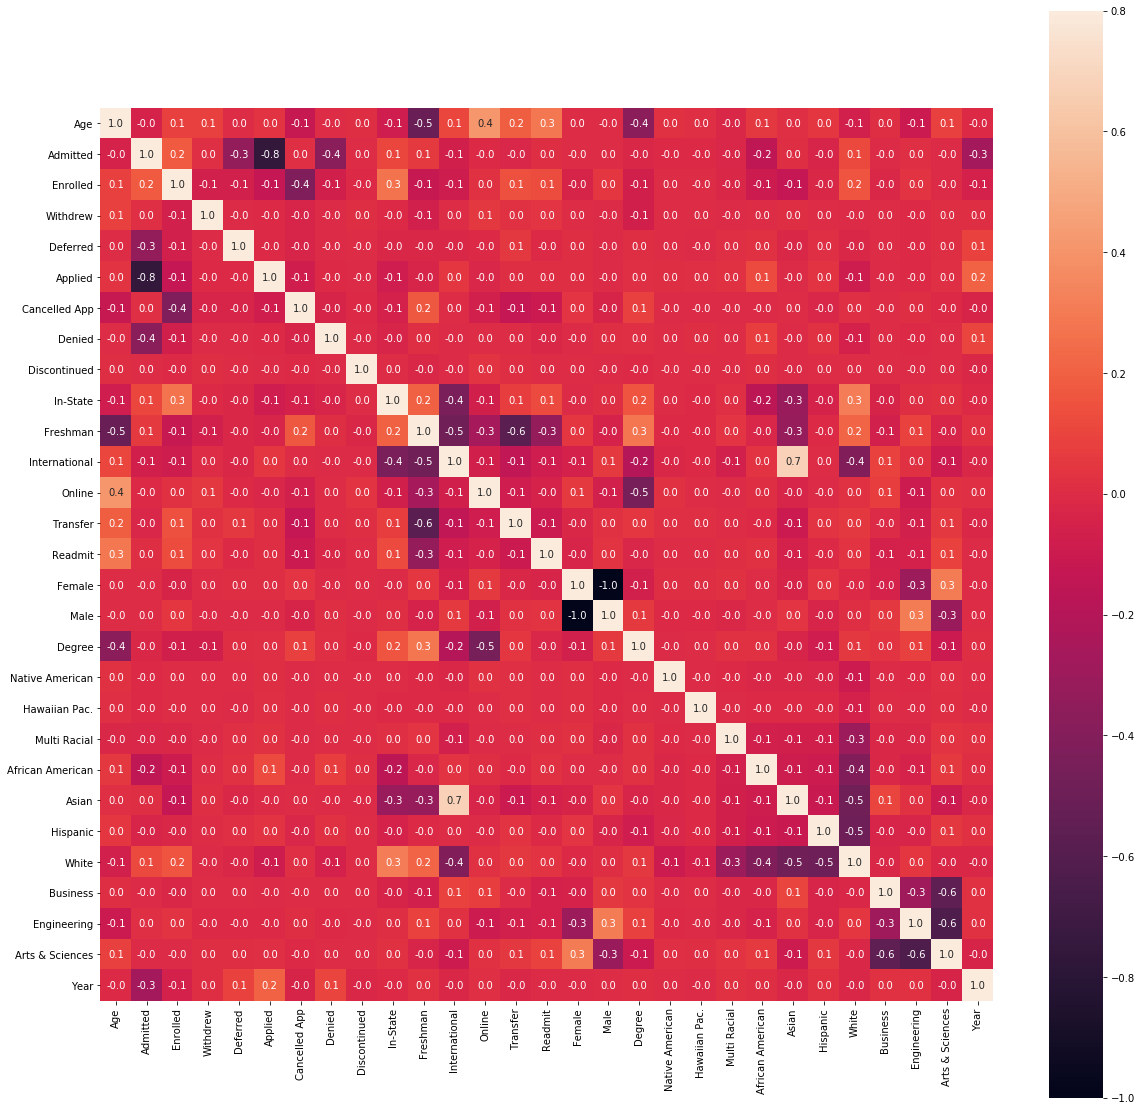

In [28]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(stdnt_data.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

The above heatmap and correlation analysis shows us that a status of **Enrolled and In-State Residency** have a positive correlation, as does for example **Age and Online**. The latter indicates that online students tend to be older. Interestingly, **Admitted and Year**  have a negative correlation, while **Applied** shows as being slighly positively correlated with **Year**.
I think at this time it would be useful to analyze by different admit types. This will allow for a in-depth view of the various factors, and also reduce the skewdness of the data as it is predominantely Freshmen and under the age of 20. 

#### Creating datasets for different cohorts of students:
> * Freshmen - Domestic
> * Non-Traditional - Domestic
> * International

In [29]:
# Create Datasets for admit types (true) freshmen, non-traditional, and international students
Fresh = stdnt_data.drop(stdnt_data[stdnt_data['Freshman']== 0].index).reset_index(drop=True)
Fresh = Fresh.drop(Fresh[Fresh['Age']>19].index).reset_index(drop=True)
Fresh = Fresh.drop(['International', 'Online','Readmit', 'Transfer','Freshman'], axis=1)
NonTrad = stdnt_data.drop(stdnt_data[stdnt_data['Freshman']== 1].index).reset_index(drop=True)
NonTrad = stdnt_data.drop(stdnt_data[stdnt_data['International']== 1].index).reset_index(drop=True)
NonTrad = stdnt_data.drop(stdnt_data[stdnt_data['Age'] < 20].index).reset_index(drop=True)
NonTrad = NonTrad.drop(['International', 'Freshman','Online','Readmit', 'Transfer'], axis=1)
Int = stdnt_data.drop(stdnt_data[stdnt_data['International']== 0].index).reset_index(drop=True)
Int = Int.drop(['Freshman', 'Online','Readmit', 'Transfer','International'], axis=1)

### 4.1.1 Domestic Cohort Analysis
#### Where are most of our non-Kansas students from - Geographic depiction on a map

In [30]:
frsloc = pd.DataFrame({'count' : Fresh.groupby( [ "State"]).size()}).reset_index()
nontradloc = pd.DataFrame({'count' : NonTrad.groupby( [ "State"]).size()}).reset_index()

In [31]:
frsloc

State  count
0         AK     26
1         AL     29
2         AR    117
3         AZ    112
4         CA    793
5         CO    938
6         CT     51
7         DC     18
8         DE     20
9         FL    162
10        GA    127
11        HI     37
12        IA    204
13        ID      9
14        IL   1292
15        IN     89
16        KS  30937
17        KY     21
18        LA     32
19        MA     74
20        MD    114
21        ME     10
22        MI    108
23        MN    327
24        MO   3377
25        MS     18
26        MT     15
27        NC     82
28        ND     11
29        NE   1243
30        NH     21
31        NJ    127
32        NM     53
33        NV     49
34        NY    120
35  No State    148
36        OH     87
37        OK    445
38        OR     26
39        PA    118
40        RI     10
41        SC     27
42        SD     47
43        TN     89
44        TX   2019
45        UT     28
46        VA    170
47        VT      7
48        WA     74
49        WI    139
50        WV      6
51        WY     22

In [32]:
#Dropping KS and No State from freshmen dataset to prevent skewdness of data
frsloc = frsloc.drop(frsloc[frsloc['State']== "No State"].index)
frsloc = frsloc.drop(frsloc[frsloc['State']== "KS"].index)
nontradloc = nontradloc.drop(nontradloc[nontradloc['State']== "No State"].index)
nontradloc = nontradloc.drop(nontradloc[nontradloc['State']== "KS"].index)

In [33]:
fig = px.choropleth(frsloc,  
                    locations="State",  
                    color="count",  
                    hover_name="count", 
                    locationmode = 'USA-states',
                    color_continuous_scale="BuPu") 
                
fig.update_layout(
    title_text = 'App Counts by State for Freshmen',
    geo_scope='usa',  
)
fig.show() 

In [34]:
fig = px.choropleth(nontradloc,  
                    locations="State",  
                    color="count",  
                    hover_name="count", 
                    locationmode = 'USA-states',
                    color_continuous_scale="BuPu") 
                
fig.update_layout(
    title_text = 'App Counts by State for Non-Traditional Students',
    geo_scope='usa',  
)
fig.show() 

We can see that for our non-traditional students, a larger percentage originate from Texas and California vs. our freshmen cohort which is predominantly from the state of Missouri.

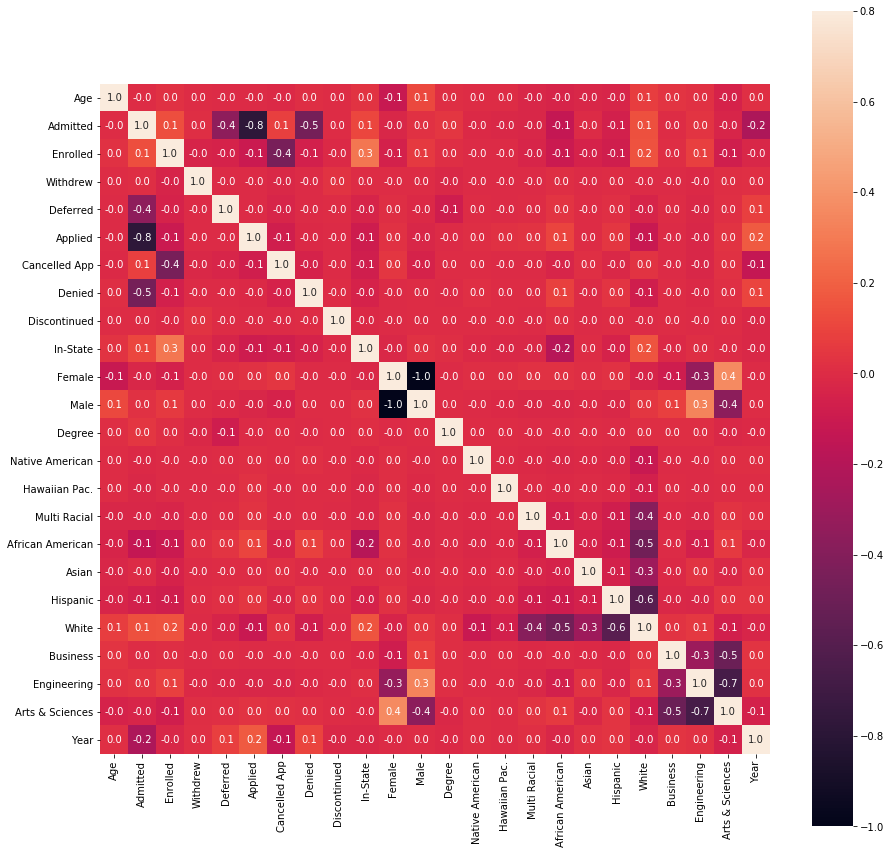

In [35]:
# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(Fresh.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

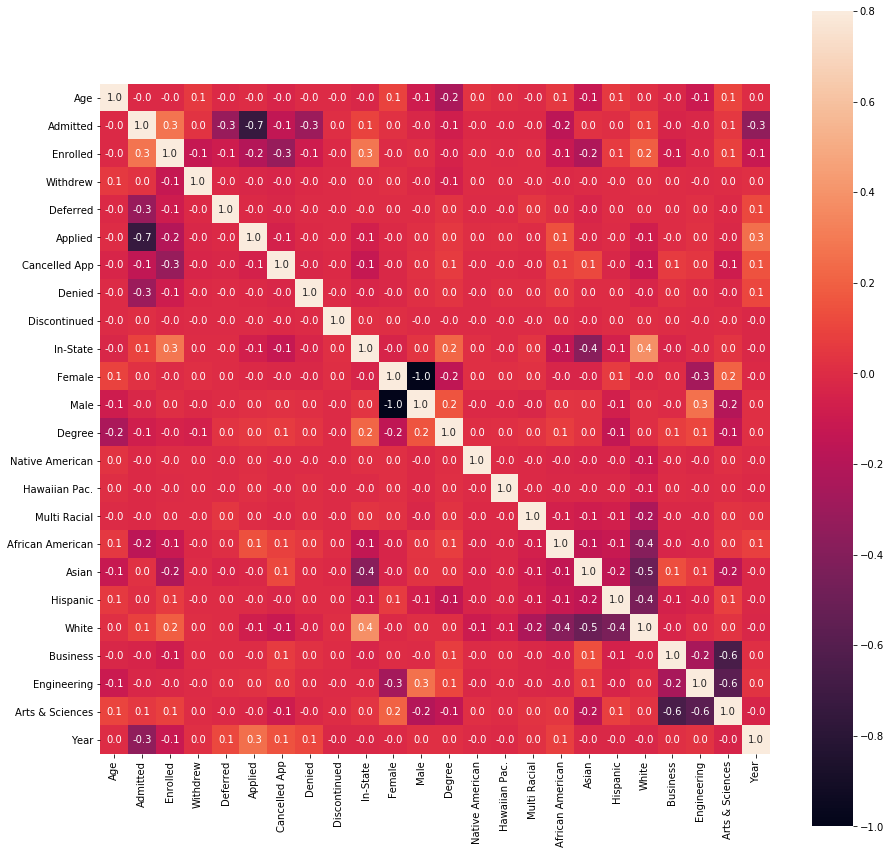

In [36]:
# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(NonTrad.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

### Taking a Closer Look - Correlation between two columns & Histogram visualizations: 
#### Age vs Gender

Male
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

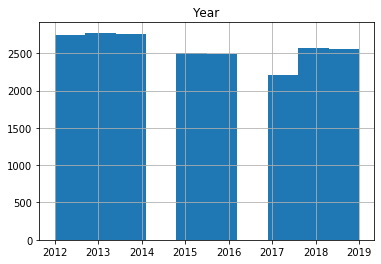

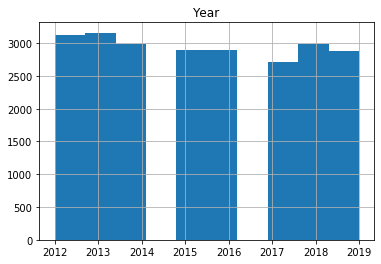

In [37]:
Fresh.groupby('Male').hist('Year')

Male
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

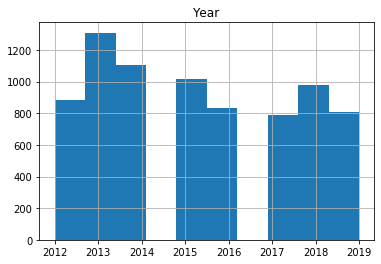

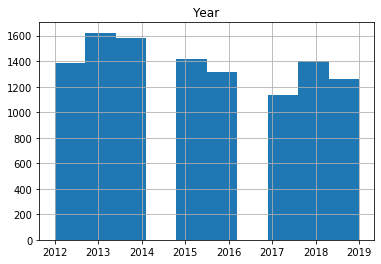

In [38]:
NonTrad.groupby('Male').hist('Year')

Male
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

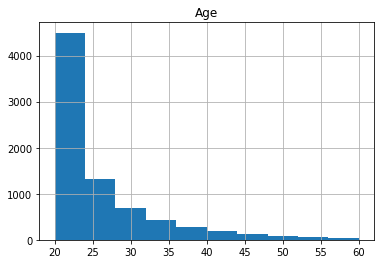

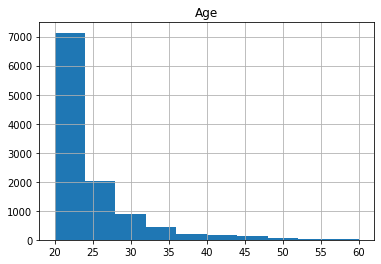

In [39]:
NonTrad.groupby('Male').hist('Age')

In [40]:
# Age & Gender for Freshmen
Fresh[['Age', 'Male']].corr()

Age      Male
Age   1.000000  0.117916
Male  0.117916  1.000000

In [41]:
# Age & Gender for Non-Traditional Students
NonTrad[['Age', 'Male']].corr()

Age      Male
Age   1.000000 -0.091322
Male -0.091322  1.000000

When looking at the freshmen and non-traditional student data, we can see that a positive correlation exists for the freshmen data, while a negative correlation exists for the non-traditional students. This indicates that freshmen (and thereby younger students) tend to be mostly male while non-traditional students tend to have a larger proportion of female students as compared to the freshmen cohort. 

(array([7959., 3671., 2059., 1286.,  905.,  696.,  493.,  377.,  271.,
         213.,  185.,  154.,  144.,  104.,   89.,   67.,   50.,   59.,
          33.,   26.]),
 array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44.,
        46., 48., 50., 52., 54., 56., 58., 60.]),
 <a list of 20 Patch objects>)

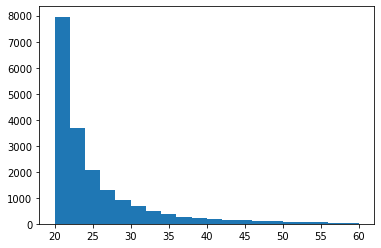

In [42]:
plt.hist(NonTrad['Age'], bins=20)

#### Degree Seeking vs Gender

In [43]:
Fresh[['Degree', 'Male']].corr()

Degree      Male
Degree  1.000000  0.002724
Male    0.002724  1.000000

In [44]:
NonTrad[['Degree', 'Male']].corr()

Degree      Male
Degree  1.000000  0.154171
Male    0.154171  1.000000

Looking closer at degree seeking status (i.e. in a program that will award a degree vs. a certificate program), we can see that for male students in both cohorts this is positively correlated, however, very minimally in the freshmen cohort. This indicates that for the non-traditional students, male students are more likely seeking a degree while female students may opt to obtain a certificate. 

In [45]:
gen = Fresh.groupby('Male').size()
gen

Male
0    20584
1    23641
dtype: int64

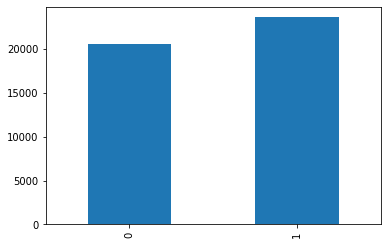

In [46]:
Fresh['Male'].value_counts().sort_index().plot.bar()

In [47]:
gen = Fresh.groupby('Degree').size()
gen

Degree
0       33
1    44192
dtype: int64

In [48]:
gen2 = NonTrad.groupby('Male').size()
gen2

Male
0     7724
1    11117
dtype: int64

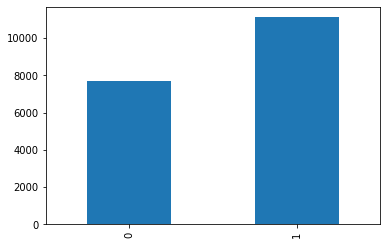

In [49]:
NonTrad['Male'].value_counts().sort_index().plot.bar()

In [50]:
gen2 = NonTrad.groupby('Degree').size()
gen2

Degree
0     2866
1    15975
dtype: int64

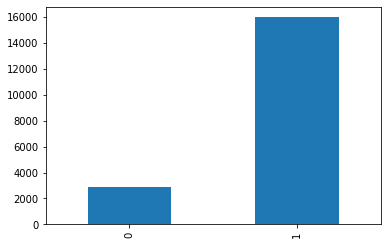

In [51]:
NonTrad['Degree'].value_counts().sort_index().plot.bar()

By taking a look at the grouped distribution we can see that most non-traditional students tend to be degree seeking and also tend to be mostly male vs. female. 

#### Gender and College / Ethnicity

In [52]:
Fresh[['Male', 'Business']].corr()

Male  Business
Male      1.000000  0.079919
Business  0.079919  1.000000

In [53]:
NonTrad[['Male', 'Business']].corr()

Male  Business
Male      1.000000 -0.003617
Business -0.003617  1.000000

For the College of Business, interestingly we are showing that for the freshmen cohort, students tend to be mostly male, while for the non-traditional student cohort, we have a negative correlation indicating a larger percentage of females as compared to the freshmen students. 

In [54]:
Fresh[['Male', 'Engineering']].corr()

Male  Engineering
Male         1.000000     0.331389
Engineering  0.331389     1.000000

In [55]:
NonTrad[['Male', 'Engineering']].corr()

Male  Engineering
Male         1.00000      0.26242
Engineering  0.26242      1.00000

For the College of Engineering, both the freshmen and non-traditional students tend to be male. 

In [56]:
Fresh[['Male', 'Arts & Sciences']].corr()

Male  Arts & Sciences
Male             1.000000        -0.361969
Arts & Sciences -0.361969         1.000000

In [57]:
NonTrad[['Male', 'Arts & Sciences']].corr()

Male  Arts & Sciences
Male             1.000000        -0.203073
Arts & Sciences -0.203073         1.000000

For the College of Arts & Sciences, we have a negative correlation for both cohorts indicating that the trend is towards female students for this college in both groups. 

In [58]:
Fresh[['Male', 'White']].corr()

Male     White
Male   1.000000  0.042351
White  0.042351  1.000000

In [59]:
NonTrad[['Male', 'White']].corr()

Male     White
Male   1.000000  0.011993
White  0.011993  1.000000

Freshmen and non-traditional white students tend to be male vs. female.

In [60]:
Fresh[['Male', 'Asian']].corr()

Male     Asian
Male   1.000000 -0.010099
Asian -0.010099  1.000000

In [61]:
NonTrad[['Male', 'Asian']].corr()

Male     Asian
Male   1.000000  0.033042
Asian  0.033042  1.000000

Among Asian students, freshmen tend to be female vs. male for non-traditional students.

In [62]:
Fresh[['Male', 'African American']].corr()

Male  African American
Male              1.000000         -0.020482
African American -0.020482          1.000000

In [63]:
NonTrad[['Male', 'African American']].corr()

Male  African American
Male              1.000000          0.035923
African American  0.035923          1.000000

Freshmen African American students tend to be female vs non-traditional students who tend to be male.

In [64]:
Fresh[['Male', 'Native American']].corr()

Male  Native American
Male             1.000000        -0.008341
Native American -0.008341         1.000000

In [65]:
NonTrad[['Male', 'Native American']].corr()

Male  Native American
Male             1.000000        -0.014297
Native American -0.014297         1.000000

Freshmen and non-traditional Native American students tend to be female vs. male. This holds true for the following correlations between gender and Hawaiian Pac., Hispanic, and multi racial students.

In [66]:
Fresh[['Male', 'Hawaiian Pac.']].corr()

Male  Hawaiian Pac.
Male           1.000000      -0.009607
Hawaiian Pac. -0.009607       1.000000

In [67]:
NonTrad[['Male', 'Hawaiian Pac.']].corr()

Male  Hawaiian Pac.
Male           1.000000      -0.013534
Hawaiian Pac. -0.013534       1.000000

In [68]:
Fresh[['Male', 'Hispanic']].corr()

Male  Hispanic
Male      1.00000  -0.02094
Hispanic -0.02094   1.00000

In [69]:
NonTrad[['Male', 'Hispanic']].corr()

Male  Hispanic
Male      1.000000 -0.068352
Hispanic -0.068352  1.000000

In [70]:
Fresh[['Male', 'Multi Racial']].corr()

Male  Multi Racial
Male          1.000000     -0.020567
Multi Racial -0.020567      1.000000

In [71]:
NonTrad[['Male', 'Multi Racial']].corr()

Male  Multi Racial
Male          1.000000     -0.023329
Multi Racial -0.023329      1.000000

The prior correlation analysis of admit type and gender, could have led us to believe that there were more male students across the board, however, with the gender and age correlation analysis for non-traditional students, as well as taking into account additional demographics such as ethnicity, we can see that this is not an accurate depiction of the demograpic distribution across the board for freshmen and non-traditional students. 

#### Age and Admit Type (All Others)

In [72]:
NonTrad[['Male', 'Year']].corr()

Male     Year
Male  1.00000  0.01322
Year  0.01322  1.00000

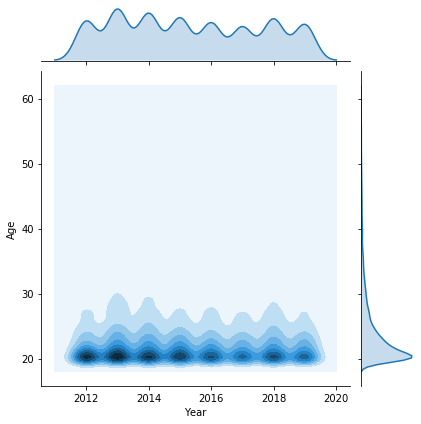

In [73]:
# Jointplot
sns.jointplot(x="Year", y="Age", data=NonTrad, kind="kde")

When looking at the correlation for male students and the application years, we can see that there is a trend towards an increase of male students vs. female students. Also, looking at the distribution of ages over the years, we can see that for non-traditional students the concentration of students around 20 years old has tapered off. 

### 4.1.2 International Cohort Analysis

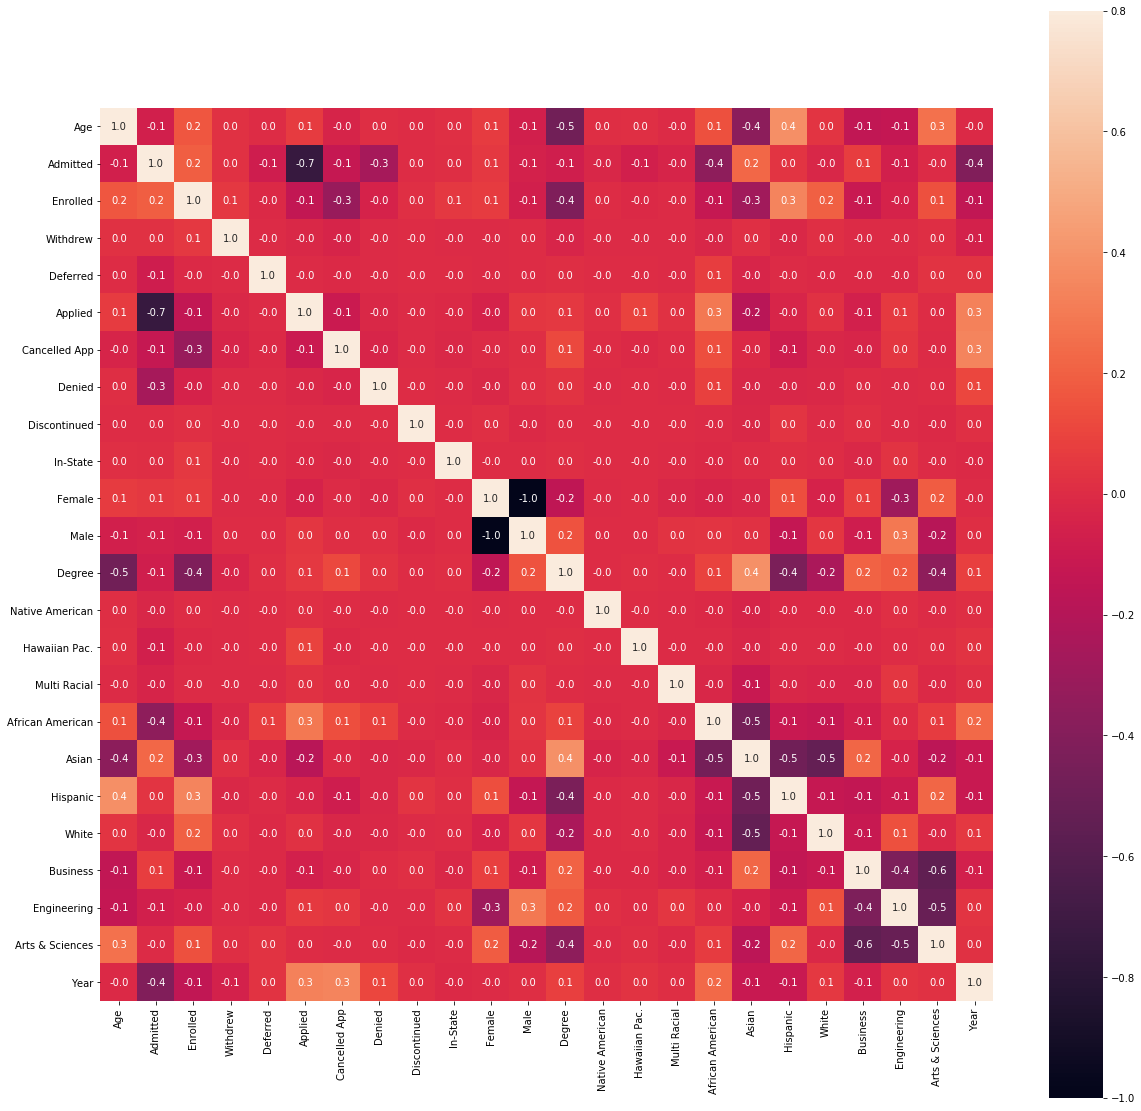

In [74]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(Int.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [75]:
Int[['Age', 'Business']].corr()

Age  Business
Age       1.000000 -0.146366
Business -0.146366  1.000000

In [469]:
Int[['Age', 'Engineering']].corr()

Age  Engineering
Age          1.000000    -0.133239
Engineering -0.133239     1.000000

In [470]:
Int[['Age', 'Arts & Sciences']].corr()

Age  Arts & Sciences
Age              1.000000         0.260659
Arts & Sciences  0.260659         1.000000

For engineering and business, students tend to be younger, while for A&S they actually show to be trending to be older. 

Male
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

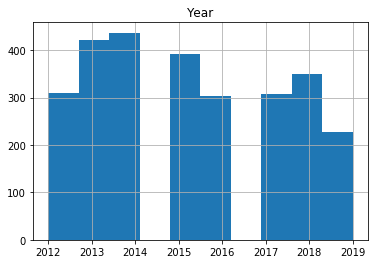

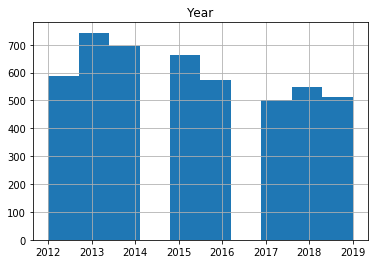

In [76]:
Int.groupby('Male').hist('Year')

International female enrollment trended down the past year, having a larger drop than the male population of the international student group.

Business
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

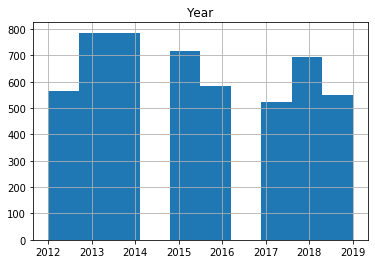

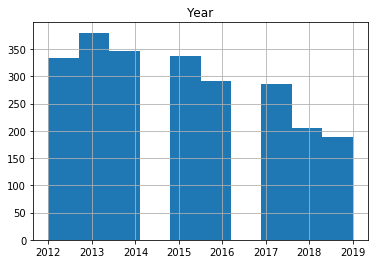

In [77]:
Int.groupby('Business').hist('Year')

Engineering
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

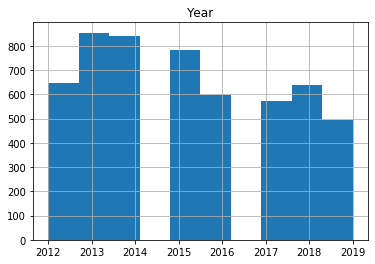

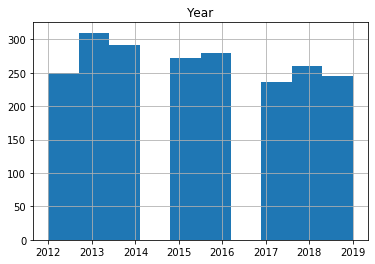

In [78]:
Int.groupby('Engineering').hist('Year')

Arts & Sciences
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

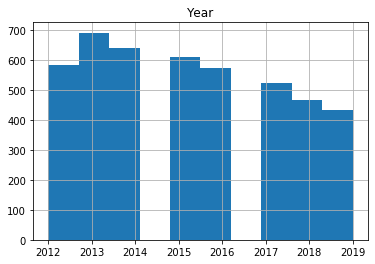

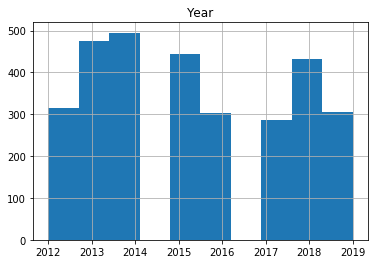

In [79]:
Int.groupby('Arts & Sciences').hist('Year')

Female enrollment dropped across all three colleges, while less significant for A&S

In [80]:
Int[['Male', 'White']].corr()

Male     White
Male   1.000000  0.047124
White  0.047124  1.000000

In [81]:
Int[['Male', 'Asian']].corr()

Male     Asian
Male   1.000000  0.025753
Asian  0.025753  1.000000

In [82]:
Int[['Male', 'Hispanic']].corr()

Male  Hispanic
Male      1.000000 -0.133863
Hispanic -0.133863  1.000000

In [83]:
Int[['Male', 'Age']].corr()

Male       Age
Male  1.000000 -0.068423
Age  -0.068423  1.000000

## 5. Modeling

## 5.1 Logistic Regression
#### Freshmen

In [84]:
Fresh2 = Fresh.drop(['Application Date', 'State', 'Citizenship','Year','Deferred','Withdrew','Cancelled App','Denied','Discontinued'], axis=1)
NonTrad2 = NonTrad.drop(['Application Date', 'State', 'Citizenship','Year','Deferred','Withdrew','Cancelled App','Denied','Discontinued'], axis=1)
Int2 = Int.drop(['Application Date', 'State', 'Citizenship','Year','Deferred','Withdrew','Cancelled App','Denied','Discontinued'], axis=1)

In [85]:
y = Fresh2['Male']
X = Fresh2.drop(['Male', 'Female'], axis=1)

In [86]:
X.head(2)

Age  Admitted  Enrolled  Applied  In-State  Degree  Native American  \
0   19         1         1        0         1       1                0   
1   19         0         0        1         1       1                0   

   Hawaiian Pac.  Multi Racial  African American  Asian  Hispanic  White  \
0              0             0                 0      0         0      1   
1              0             0                 0      0         0      1   

   Business  Engineering  Arts & Sciences  
0         1            0                0  
1         1            0                0

In [87]:
# Train and test sets and building a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
#Model evaluation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.679454326198372

In [89]:
confusion_matrix(y_test, lr.predict(X_test))

array([[4515, 1719],
       [2534, 4500]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report
clss = classification_report(y_test, lr.predict(X_test))

In [91]:
print (clss)

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      6234
           1       0.72      0.64      0.68      7034

    accuracy                           0.68     13268
   macro avg       0.68      0.68      0.68     13268
weighted avg       0.68      0.68      0.68     13268



In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,lr.predict(X_test))

0.6820019386108391

We can see that the model is not doing such a good job at determining gender based on the factors of age, ethnicity, and college:<br>
**Model Accuracy: 67.95%**<br>
**True positives out of all positives: .64**<br>
**False positives out of all negatives: .72**<br>
**AUC Score: .682**

#### Non-Traditional

In [93]:
y1 = NonTrad2['Male']
X1 = NonTrad2.drop(['Male', 'Female'], axis=1)

In [94]:
X1.head(2)

Age  Admitted  Enrolled  Applied  In-State  Degree  Native American  \
0   60         0         0        0         0       1                0   
1   58         0         0        1         1       1                0   

   Hawaiian Pac.  Multi Racial  African American  Asian  Hispanic  White  \
0              0             0                 1      0         0      0   
1              0             0                 0      0         0      1   

   Business  Engineering  Arts & Sciences  
0         1            0                0  
1         0            0                1

In [95]:
# Train and test sets and building a logistic regression model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=10)
lr = LogisticRegression()
lr.fit(X1_train,y1_train)

C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
accuracy_score(y1_test, lr.predict(X1_test))

0.6269237572970104

In [97]:
confusion_matrix(y1_test, lr.predict(X1_test))

array([[ 735, 1556],
       [ 553, 2809]], dtype=int64)

In [98]:
clss1 = classification_report(y1_test, lr.predict(X1_test))

In [99]:
print(clss1)

              precision    recall  f1-score   support

           0       0.57      0.32      0.41      2291
           1       0.64      0.84      0.73      3362

    accuracy                           0.63      5653
   macro avg       0.61      0.58      0.57      5653
weighted avg       0.61      0.63      0.60      5653



In [100]:
roc_auc_score(y1_test,lr.predict(X1_test))

0.5781675885074955

Our model for non-traditional students actually performed worse and only has an accuracy score of 62.7%. 

### Let's take a look at the three colleges we're focusing on in this analysis.

## 5.2 Logit Function
### 5.2.1 College of Arts & Sciences (AS)
**Freshmen**

In [101]:
# Statsmodels for logit function
yfas = Fresh2['Male']
Xfas = Fresh2.drop(['Female', 'Male'], axis=1)

In [102]:
fas_logit = sm.Logit(yfas, Xfas) 
fas_model_logit = fas_logit.fit()

Optimization terminated successfully.
         Current function value: 0.607570
         Iterations 7


In [103]:
pre = fas_model_logit.predict()
for i in pre:
    print(i)

0.7435019925630448
0.6905875464132816
0.49298075082706105
0.503228781140755
0.8697473639058472
0.7225935029143964
0.4894678140822325
0.5384671453817892
0.445113458211216
0.8655941009904761
0.47223799424133994
0.48555470661326244
0.7360161958620455
0.8667332869001672
0.730118361685637
0.7465724441316459
0.6905875464132816
0.8775508892296551
0.6905875464132816
0.42813562577194636
0.5384671453817892
0.876490996958299
0.8775508892296551
0.7134378044793696
0.8775508892296551
0.7435019925630448
0.6942395076512102
0.8775508892296551
0.730118361685637
0.7273397210265967
0.4560544051661242
0.8602452641154136
0.8775508892296551
0.4894678140822325
0.5102357033282778
0.8745065474935806
0.4870124166855398
0.8683394757302165
0.736215476914715
0.4894678140822325
0.473223206425928
0.5077797442566979
0.7416234282541869
0.5005155885749905
0.47223799424133994
0.7273397210265967
0.5142742790107316
0.8775508892296551
0.4894678140822325
0.8775508892296551
0.6610336790778595
0.48597566165388767
0.71022506602

0.32815790353347424
0.32815790353347424
0.8012642185224162
0.35358821783243394
0.3435528893633518
0.5756859442134483
0.7964209256277395
0.7826182212008774
0.2901145225931591
0.612749508013499
0.7689044439963106
0.7964209256277395
0.7850000473677534
0.7706459995032829
0.5928599474976436
0.3625259423078556
0.7706459995032829
0.7964209256277395
0.6231832920953932
0.3413400716126864
0.2901145225931591
0.34634821336152555
0.5928599474976436
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.7964209256277395
0.7826182212008774
0.3435528893633518
0.7964209256277395
0.612749508013499
0.612749508013499
0.31397446260866324
0.7964209256277395
0.612749508013499
0.612749508013499
0.7964209256277395
0.5760975347980927
0.7809417333889109
0.5928599474976436
0.3467298232739307
0.7918379856679151
0.7826182212008774
0.5938803502920147
0.5320744219232985
0.30453375719378745
0.7964209256277395
0.3127613884337712
0.32815790353347424
0.7826182212008774
0.7809417333889109
0.5928599474976436
0.79642092

0.3435528893633518
0.7964209256277395
0.32599500182248686
0.32815790353347424
0.29075156696937926
0.3625259423078556
0.5587427229559372
0.7826182212008774
0.7809417333889109
0.3467298232739307
0.32815790353347424
0.3625259423078556
0.30499068575430444
0.735719120087049
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.5928599474976436
0.612749508013499
0.7706459995032829
0.3435528893633518
0.3625259423078556
0.32815790353347424
0.35358821783243394
0.3625259423078556
0.3277864776976846
0.3435528893633518
0.612749508013499
0.7809417333889109
0.7826182212008774
0.36025798558994604
0.3435528893633518
0.2901145225931591
0.7964209256277395
0.3625259423078556
0.7826182212008774
0.7964209256277395
0.7964209256277395
0.28809484332900975
0.3435528893633518
0.3435528893633518
0.7706459995032829
0.7689044439963106
0.612749508013499
0.3435528893633518
0.3435528893633518
0.3728007416472762
0.5736959035741166
0.7382232429677357
0.612749508013499
0.7850000473677534
0.7826182212008774
0.782618

0.3435528893633518
0.612749508013499
0.3625259423078556
0.3625259423078556
0.3625259423078556
0.32815790353347424
0.3024564651532482
0.7689044439963106
0.7826182212008774
0.612749508013499
0.5760975347980927
0.7826182212008774
0.7964209256277395
0.7023377026137411
0.612749508013499
0.32599500182248686
0.36025798558994604
0.612749508013499
0.35358821783243394
0.7850000473677534
0.3435528893633518
0.5928599474976436
0.3467298232739307
0.3435528893633518
0.7678659520374774
0.3625259423078556
0.3435528893633518
0.7833368432637698
0.3435528893633518
0.3277864776976846
0.32815790353347424
0.5760975347980927
0.7826182212008774
0.612749508013499
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.7706459995032829
0.5760975347980927
0.7382232429677357
0.7826182212008774
0.5928599474976436
0.7023377026137411
0.3435528893633518
0.7964209256277395
0.32599500182248686
0.7964209256277395
0.7964209

0.612749508013499
0.3625259423078556
0.7964209256277395
0.3467298232739307
0.32815790353347424
0.3413400716126864
0.3625259423078556
0.3413400716126864
0.3435528893633518
0.5928599474976436
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.3695200509430186
0.6034828408192316
0.3435528893633518
0.612749508013499
0.612749508013499
0.2901145225931591
0.3435528893633518
0.32599500182248686
0.7964209256277395
0.7706459995032829
0.7850000473677534
0.3435528893633518
0.7964209256277395
0.3435528893633518
0.3435528893633518
0.3662697180801265
0.3435528893633518
0.5760975347980927
0.5894818683179447
0.3625259423078556
0.5756859442134483
0.7826182212008774
0.3435528893633518
0.7826182212008774
0.29075156696937926
0.7826182212008774
0.5928599474976436
0.32815790353347424
0.35358821783243394
0.7785412603864402
0.3625259423078556
0.32815790353347424
0.7706459995032829
0.3625259423078556
0.32815790353347424
0.3435528893633518
0.5928599474976436
0.25539620779491534
0.35382273723777097
0.3281

0.6637058531360606
0.5896117853221772
0.42350055763836103
0.27774603458680736
0.22993649831625382
0.6471639999539767
0.1821454190551058
0.22993649831625382
0.18093567617028702
0.22220421849124855
0.21050326881727277
0.1727687710138661
0.36642035396516714
0.22464301601616748
0.4709476580295357
0.4394136128627034
0.6658957130112336
0.22993649831625382
0.23512220584668553
0.42548960286122
0.22220421849124855
0.18093567617028702
0.23982858329293957
0.18239659312862436
0.19989203483430532
0.4916865404133457
0.3970692517917814
0.6627612661612926
0.21050326881727277
0.22464301601616748
0.22464301601616748
0.22220421849124855
0.172087194463758
0.6467791045421813
0.6471639999539767
0.6218303213747547
0.25796759879319775
0.6054669117328755
0.1727687710138661
0.22993649831625382
0.16696248024532884
0.6992857003959128
0.19989203483430532
0.19291697774749889
0.1989918786117756
0.6059819372949902
0.42573133335305363
0.8378232388944716
0.8453033421328366
0.48597566165388767
0.4697894945553461
0.46978

0.8775508892296551
0.8775508892296551
0.7435019925630448
0.47223799424133994
0.7435019925630448
0.47223799424133994
0.7273397210265967
0.4870124166855398
0.8775508892296551
0.8775508892296551
0.8775508892296551
0.7273397210265967
0.49298075082706105
0.730118361685637
0.7435019925630448
0.8775508892296551
0.5102357033282778
0.8683394757302165
0.8602452641154136
0.7360161958620455
0.8465840255882054
0.8775508892296551
0.7435019925630448
0.4894678140822325
0.4894678140822325
0.47223799424133994
0.47223799424133994
0.4426876290774669
0.47223799424133994
0.8775508892296551
0.8775508892296551
0.8775508892296551
0.8602452641154136
0.5102357033282778
0.8683394757302165
0.4894678140822325
0.7273397210265967
0.8699381544719488
0.8602452641154136
0.859059636032089
0.7281776130433599
0.8775508892296551
0.7273397210265967
0.7273397210265967
0.5102357033282778
0.7273397210265967
0.47223799424133994
0.8667332869001672
0.7273397210265967
0.5102357033282778
0.8683394757302165
0.5102357033282778
0.72733

0.5928599474976436
0.3127613884337712
0.35358821783243394
0.612749508013499
0.612749508013499
0.7964209256277395
0.7826182212008774
0.3435528893633518
0.7706459995032829
0.32599500182248686
0.7706459995032829
0.3435528893633518
0.28787773083576573
0.612749508013499
0.5760975347980927
0.7964209256277395
0.3625259423078556
0.612749508013499
0.3413400716126864
0.5928599474976436
0.3435528893633518
0.8012642185224162
0.3435528893633518
0.3413400716126864
0.2901145225931591
0.3413400716126864
0.3625259423078556
0.38907719539370683
0.6034828408192316
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.5962482971587261
0.3625259423078556
0.7706459995032829
0.7964209256277395
0.7826182212008774
0.5760975347980927
0.6198768773398706
0.612749508013499
0.3435528893633518
0.5736959035741166
0.3625259423078556
0.7964209256277395
0.5736959035741166
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.5760975347980927
0.7826182212008774
0.2901145225931591
0.3413400716

0.3435528893633518
0.3467298232739307
0.36025798558994604
0.32815790353347424
0.7706459995032829
0.7964209256277395
0.5962482971587261
0.3625259423078556
0.7706459995032829
0.32815790353347424
0.7706459995032829
0.32815790353347424
0.7706459995032829
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.612749508013499
0.3625259423078556
0.612749508013499
0.3435528893633518
0.3625259423078556
0.612749508013499
0.3467298232739307
0.32599500182248686
0.3435528893633518
0.7964209256277395
0.3445072818286715
0.612749508013499
0.612749508013499
0.7706459995032829
0.5760975347980927
0.3625259423078556
0.7507638585467936
0.5760975347980927
0.3625259423078556
0.5958425460259132
0.612749508013499
0.7706459995032829
0.3467298232739307
0.32815790353347424
0.3435528893633518
0.3625259423078556
0.32815790353347424
0.5928599474976436
0.32815790353347424
0.3435528893633518
0.7539586136393002
0.7833368432637698
0.5601322529979992
0.3435528893633518
0.38907719539370683
0.3127613884337712
0.6127495

0.32815790353347424
0.32815790353347424
0.3467298232739307
0.5760975347980927
0.3435528893633518
0.5928599474976436
0.5928599474976436
0.3435528893633518
0.7706459995032829
0.3413400716126864
0.3435528893633518
0.7689044439963106
0.612749508013499
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.7850000473677534
0.7964209256277395
0.7948229793287241
0.612749508013499
0.3625259423078556
0.7826182212008774
0.7706459995032829
0.7826182212008774
0.3625259423078556
0.36025798558994604
0.3625259423078556
0.3695200509430186
0.3413400716126864
0.5928599474976436
0.2757702731708338
0.612749508013499
0.3625259423078556
0.3625259423078556
0.5962482971587261
0.612749508013499
0.7706459995032829
0.7706459995032829
0.7826182212008774
0.5760975347980927
0.3662697180801265
0.32815790353347424
0.32815790353347424
0.7826182212008774
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.2901145225931591
0.6034828408192316
0.2901145225931591
0.7964209256277395
0.34355288

0.32599500182248686
0.31397446260866324
0.5760975347980927
0.7809417333889109
0.5736959035741166
0.3435528893633518
0.2901145225931591
0.3127613884337712
0.3404076435738549
0.3413400716126864
0.3625259423078556
0.3625259423078556
0.5736959035741166
0.3435528893633518
0.32815790353347424
0.7706459995032829
0.31397446260866324
0.6392497140611823
0.3625259423078556
0.3413400716126864
0.5928599474976436
0.3625259423078556
0.3413400716126864
0.3625259423078556
0.7706459995032829
0.32815790353347424
0.3467298232739307
0.7964209256277395
0.3413400716126864
0.7850000473677534
0.32599500182248686
0.3695200509430186
0.7826182212008774
0.7964209256277395
0.7850000473677534
0.3625259423078556
0.612749508013499
0.3695200509430186
0.3404076435738549
0.3435528893633518
0.32599500182248686
0.5928599474976436
0.5736959035741166
0.7948229793287241
0.7023377026137411
0.3435528893633518
0.8012642185224162
0.32815790353347424
0.5756859442134483
0.3625259423078556
0.5760975347980927
0.7826182212008774
0.341

0.7435019925630448
0.8775508892296551
0.5102357033282778
0.8683394757302165
0.8688222180281941
0.7435019925630448
0.8602452641154136
0.8602452641154136
0.5102357033282778
0.8683394757302165
0.8602452641154136
0.7435019925630448
0.7134378044793696
0.8775508892296551
0.8683394757302165
0.5102357033282778
0.8602452641154136
0.47223799424133994
0.7273397210265967
0.8775508892296551
0.7273397210265967
0.4894678140822325
0.7435019925630448
0.7435019925630448
0.8683394757302165
0.7435019925630448
0.5102357033282778
0.8775508892296551
0.5102357033282778
0.47223799424133994
0.8602452641154136
0.5177649516390895
0.8683394757302165
0.8683394757302165
0.8775508892296551
0.8683394757302165
0.5005155885749905
0.47181801627597814
0.8775508892296551
0.7130931538894498
0.7435019925630448
0.4894678140822325
0.7435019925630448
0.7435019925630448
0.8775508892296551
0.7134378044793696
0.7435019925630448
0.5102357033282778
0.7134378044793696
0.5102357033282778
0.4894678140822325
0.7435019925630448
0.8775508

0.32815790353347424
0.7964209256277395
0.3413400716126864
0.612749508013499
0.3625259423078556
0.612749508013499
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.3625259423078556
0.7964209256277395
0.5928599474976436
0.7826182212008774
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.6198768773398706
0.34634821336152555
0.3435528893633518
0.612749508013499
0.3445072818286715
0.5928599474976436
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.3413400716126864
0.3127613884337712
0.32815790353347424
0.612749508013499
0.5928599474976436
0.5928599474976436
0.7706459995032829
0.590485777022962
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3413400716126864
0.3625259423078556
0.3625259423078556
0.3728007416472762
0.612749508013499
0.784715493524943
0.7964209256277395
0.612749508013499
0.7964209256277395
0.7964209256277395
0.7706459995032829
0.5928599474976436
0.7964209256277395
0.612749508013499
0.362525942307855

0.612749508013499
0.5760975347980927
0.5962482971587261
0.7826182212008774
0.3413400716126864
0.5756859442134483
0.3625259423078556
0.3625259423078556
0.32815790353347424
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.7964209256277395
0.5928599474976436
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.612749508013499
0.7706459995032829
0.35358821783243394
0.3435528893633518
0.32815790353347424
0.34634821336152555
0.7706459995032829
0.3625259423078556
0.7382232429677357
0.32815790353347424
0.5760975347980927
0.3413400716126864
0.38907719539370683
0.7689044439963106
0.3435528893633518
0.35358821783243394
0.5736959035741166
0.32815790353347424
0.5928599474976436
0.5928599474976436
0.7826182212008774
0.7964209256277395
0.3127613884337712
0.3625259423078556
0.38907719539370683
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.32815790353347424
0.7964209256277395
0.7706459995032829
0.5928599474976436
0.32815790353347424
0.5928599474976436
0.612749508013499
0.78

0.3625259423078556
0.612749508013499
0.38907719539370683
0.3435528893633518
0.7703480057600316
0.3625259423078556
0.3435528893633518
0.3127613884337712
0.7850000473677534
0.7809417333889109
0.5928599474976436
0.3435528893633518
0.6104151047585145
0.7706459995032829
0.7706459995032829
0.6104151047585145
0.5928599474976436
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.612749508013499
0.612749508013499
0.36025798558994604
0.612749508013499
0.5760975347980927
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.5736959035741166
0.3435528893633518
0.7833368432637698
0.6104151047585145
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.5928599474976436
0.32815790353347424
0.7850000473677534
0.3625259423078556
0.3625259423078556
0.7964209256277395
0.7826182212008774
0.3467298232739307
0.5928599474976436
0.7689044439963106
0.32815790353347424
0.7850000473677534
0.3445072818286715
0.6034828408192316
0.3435528893633518
0.7964209256277395
0.7706459995

0.7706459995032829
0.3695200509430186
0.7900434213562816
0.32599500182248686
0.3625259423078556
0.33089110576322994
0.7964209256277395
0.6104151047585145
0.5760975347980927
0.6104151047585145
0.612749508013499
0.32599500182248686
0.7850000473677534
0.32599500182248686
0.3625259423078556
0.32815790353347424
0.3413400716126864
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.5928599474976436
0.7964209256277395
0.3435528893633518
0.7539586136393002
0.3625259423078556
0.32815790353347424
0.7706459995032829
0.3625259423078556
0.3435528893633518
0.5958425460259132
0.29075156696937926
0.3127613884337712
0.32815790353347424
0.7964209256277395
0.7964209256277395
0.7706459995032829
0.7964209256277395
0.32815790353347424
0.612749508013499
0.6104151047585145
0.3625259423078556
0.32815790353347424
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.32815790353347424
0.7964209256277395
0.7826182212008774
0.7706459995032829
0.

0.6905954595692303
0.23186381340788148
0.25796759879319775
0.24497655416158035
0.24497655416158035
0.20791213021337884
0.2368940972073976
0.24497655416158035
0.8378232388944716
0.36288911932859175
0.8683394757302165
0.5102357033282778
0.5928599474976436
0.36025798558994604
0.5102357033282778
0.3277864776976846
0.3435528893633518
0.38907719539370683
0.3435528893633518
0.5102357033282778
0.5928599474976436
0.7246661754866176
0.5928599474976436
0.4697894945553461
0.7518396352342205
0.2368940972073976
0.3625259423078556
0.7809417333889109
0.49298075082706105
0.32815790353347424
0.8775508892296551
0.5736959035741166
0.5962482971587261
0.5791157540287141
0.7850000473677534
0.5077797442566979
0.3435528893633518
0.32599500182248686
0.32815790353347424
0.8282240804558637
0.7964209256277395
0.859059636032089
0.49298075082706105
0.4894678140822325
0.8683394757302165
0.4894678140822325
0.3625259423078556
0.3413400716126864
0.7826182212008774
0.7826182212008774
0.7826182212008774
0.3602579855899460

0.3435528893633518
0.7964209256277395
0.3413400716126864
0.3695200509430186
0.3435528893633518
0.7964209256277395
0.7273397210265967
0.2767252435948068
0.7706459995032829
0.3413400716126864
0.5928599474976436
0.7964209256277395
0.3625259423078556
0.612749508013499
0.3413400716126864
0.8602452641154136
0.3435528893633518
0.3625259423078556
0.35358821783243394
0.3625259423078556
0.7826182212008774
0.3435528893633518
0.8683394757302165
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.5928599474976436
0.7826182212008774
0.5928599474976436
0.8683394757302165
0.5962482971587261
0.30817757057727124
0.29075156696937926
0.3413400716126864
0.7273397210265967
0.3277864776976846
0.612749508013499
0.8775508892296551
0.7826182212008774
0.8672119162852984
0.3625259423078556
0.7826182212008774
0.7850000473677534
0.3625259423078556
0.612749508013499
0.36025798558994604
0.3435528893633518
0.34634821336152555
0.7826182212008774
0.3435528893633518
0.3435528893633518
0.612749508013499
0.796420925

0.612749508013499
0.5102357033282778
0.3625259423078556
0.36025798558994604
0.5928599474976436
0.3625259423078556
0.7964209256277395
0.3435528893633518
0.3413400716126864
0.5928599474976436
0.7964209256277395
0.7826182212008774
0.7273397210265967
0.7826182212008774
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.7964209256277395
0.8775508892296551
0.3625259423078556
0.7826182212008774
0.612749508013499
0.5928599474976436
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.5928599474976436
0.7948229793287241
0.612749508013499
0.7826182212008774
0.3625259423078556
0.3467298232739307
0.612749508013499
0.7964209256277395
0.612749508013499
0.3625259423078556
0.612749508013499
0.3435528893633518
0.3625259423078556
0.7382232429677357
0.8012642185224162
0.5928599474976436
0.3413400716126864
0.7964209256277395
0.3625259423078556
0.32815790353347424
0.3435528893633518
0.7826182212008774
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.3435528893633518
0.343552889363

0.3435528893633518
0.4439031575471386
0.7435019925630448
0.32815790353347424
0.7706459995032829
0.2767252435948068
0.7706459995032829
0.612749508013499
0.5928599474976436
0.5760975347980927
0.35358821783243394
0.3277864776976846
0.6034828408192316
0.8775508892296551
0.7689044439963106
0.3127613884337712
0.3625259423078556
0.7964209256277395
0.3435528893633518
0.3413400716126864
0.3435528893633518
0.7703480057600316
0.5958425460259132
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.32815790353347424
0.7826182212008774
0.3625259423078556
0.5760975347980927
0.5756859442134483
0.7850000473677534
0.7689044439963106
0.612749508013499
0.3695200509430186
0.32815790353347424
0.7850000473677534
0.32599500182248686
0.3695200509430186
0.5928599474976436
0.32815790353347424
0.3467298232739307
0.32815790353347424
0.3625259423078556
0.4894678140822325
0.590485777022962
0.8602452641154136
0.3467298232739307
0.3625259423078556
0.3435528893633518
0.29075156696937926
0.3625259423078556
0.489

0.6104151047585145
0.29075156696937926
0.7826182212008774
0.7900434213562816
0.5928599474976436
0.5760975347980927
0.32815790353347424
0.3435528893633518
0.8775508892296551
0.7689044439963106
0.3228815901828395
0.7246661754866176
0.7850000473677534
0.7826182212008774
0.47181801627597814
0.3467298232739307
0.3625259423078556
0.5928599474976436
0.612749508013499
0.7706459995032829
0.32815790353347424
0.5760975347980927
0.5962482971587261
0.3435528893633518
0.3625259423078556
0.5102357033282778
0.5928599474976436
0.7964209256277395
0.7706459995032829
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.7703480057600316
0.3435528893633518
0.6104151047585145
0.3625259423078556
0.7706459995032829
0.7964209256277395
0.34634821336152555
0.6725676179627706
0.7826182212008774
0.7706459995032829
0.35358821783243394
0.612749508013499
0.38907719539370683
0.7900434213562816
0.4894678140822325
0.5928599474976436
0.32815790353347424
0.8683394757302165
0.612749508013499
0.612749508013499
0.362525

0.7900434213562816
0.859059636032089
0.5928599474976436
0.7706459995032829
0.3467298232739307
0.5760975347980927
0.3625259423078556
0.32815790353347424
0.3625259423078556
0.3127613884337712
0.3625259423078556
0.32815790353347424
0.20887474208075013
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.7850000473677534
0.47223799424133994
0.3625259423078556
0.32815790353347424
0.5928599474976436
0.32815790353347424
0.3435528893633518
0.7964209256277395
0.6471639999539767
0.3435528893633518
0.612749508013499
0.3467298232739307
0.32815790353347424
0.32815790353347424
0.47223799424133994
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.7706459995032829
0.6034828408192316
0.3467298232739307
0.32815790353347424
0.859059636032089
0.6034828408192316
0.35358821783243394
0.1989918786117756
0.7689044439963106
0.3127613884337712
0.32815790353347424
0.3277864776976846
0.3625259423078556
0.32815790353347424
0.5736959035741166

0.3625259423078556
0.5928599474976436
0.7964209256277395
0.3435528893633518
0.7826182212008774
0.8602452641154136
0.3625259423078556
0.3435528893633518
0.7689044439963106
0.3625259423078556
0.32815790353347424
0.3435528893633518
0.36025798558994604
0.22220421849124855
0.3435528893633518
0.3625259423078556
0.8775508892296551
0.3277864776976846
0.3625259423078556
0.7826182212008774
0.3435528893633518
0.7826182212008774
0.5962482971587261
0.4894678140822325
0.7964209256277395
0.47223799424133994
0.47223799424133994
0.5102357033282778
0.44935252661212777
0.3277864776976846
0.3413400716126864
0.7850000473677534
0.22051045255614654
0.5102357033282778
0.612749508013499
0.7273397210265967
0.7964209256277395
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.7948229793287241
0.32815790353347424
0.7964209256277395
0.7964209256277395
0.3435528893633518
0.7964209256277395
0.3435528893633518
0.7435019925630448
0.7964209256277395
0.612749508013499
0.5102357033282778
0.3625259423078556
0.7964

0.3625259423078556
0.34634821336152555
0.7964209256277395
0.7964209256277395
0.7964209256277395
0.612749508013499
0.7964209256277395
0.7964209256277395
0.7706459995032829
0.7706459995032829
0.3435528893633518
0.612749508013499
0.7964209256277395
0.8602452641154136
0.3625259423078556
0.3625259423078556
0.7964209256277395
0.4870124166855398
0.3435528893633518
0.590485777022962
0.4870124166855398
0.3728007416472762
0.47223799424133994
0.7273397210265967
0.7706459995032829
0.7948229793287241
0.3467298232739307
0.5102357033282778
0.5962482971587261
0.7689044439963106
0.7809417333889109
0.32815790353347424
0.7246661754866176
0.32815790353347424
0.7689044439963106
0.7850000473677534
0.7706459995032829
0.7964209256277395
0.47223799424133994
0.32815790353347424
0.7833368432637698
0.38907719539370683
0.8699381544719488
0.5962482971587261
0.32815790353347424
0.7273397210265967
0.7706459995032829
0.7689044439963106
0.32815790353347424
0.32599500182248686
0.3625259423078556
0.8733106432569782
0.573

0.3435528893633518
0.7826182212008774
0.7706459995032829
0.3435528893633518
0.3413400716126864
0.612749508013499
0.7826182212008774
0.3625259423078556
0.5760975347980927
0.3435528893633518
0.3435528893633518
0.7706459995032829
0.3625259423078556
0.7706459995032829
0.7706459995032829
0.7826182212008774
0.7826182212008774
0.3625259423078556
0.35358821783243394
0.7964209256277395
0.7964209256277395
0.3435528893633518
0.5760975347980927
0.36025798558994604
0.47223799424133994
0.7706459995032829
0.5760975347980927
0.7964209256277395
0.5928599474976436
0.7964209256277395
0.7706459995032829
0.32815790353347424
0.35358821783243394
0.7948229793287241
0.3435528893633518
0.3435528893633518
0.7134378044793696
0.32815790353347424
0.3435528893633518
0.6905954595692303
0.3435528893633518
0.3467298232739307
0.3277864776976846
0.5928599474976436
0.7706459995032829
0.3435528893633518
0.5587427229559372
0.7826182212008774
0.3625259423078556
0.3467298232739307
0.8602452641154136
0.8683394757302165
0.79642

0.3625259423078556
0.7134378044793696
0.3435528893633518
0.32815790353347424
0.35358821783243394
0.4894678140822325
0.3435528893633518
0.3435528893633518
0.4894678140822325
0.7706459995032829
0.5102357033282778
0.3625259423078556
0.2767252435948068
0.5328439707353256
0.3625259423078556
0.38907719539370683
0.5102357033282778
0.32815790353347424
0.8602452641154136
0.612749508013499
0.3435528893633518
0.3625259423078556
0.5760975347980927
0.7826182212008774
0.5102357033282778
0.3625259423078556
0.5928599474976436
0.3435528893633518
0.7826182212008774
0.4753222167026106
0.7826182212008774
0.5102357033282778
0.7826182212008774
0.5005155885749905
0.8012642185224162
0.4428594426952746
0.32599500182248686
0.8602452641154136
0.3625259423078556
0.8141641206082183
0.3435528893633518
0.3435528893633518
0.7706459995032829
0.4894678140822325
0.8012642185224162
0.32815790353347424
0.7706459995032829
0.29075156696937926
0.612749508013499
0.5928599474976436
0.6104151047585145
0.3625259423078556
0.59285

0.21022334159502168
0.32815790353347424
0.7850000473677534
0.7964209256277395
0.3625259423078556
0.32815790353347424
0.4894678140822325
0.7706459995032829
0.7706459995032829
0.5587427229559372
0.7826182212008774
0.8683394757302165
0.7246661754866176
0.34634821336152555
0.5928599474976436
0.7964209256277395
0.8602452641154136
0.8775508892296551
0.5928599474976436
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.4697894945553461
0.7826182212008774
0.612749508013499
0.7833368432637698
0.36025798558994604
0.29075156696937926
0.3625259423078556
0.5102357033282778
0.7706459995032829
0.32815790353347424
0.7826182212008774
0.612749508013499
0.7689044439963106
0.4894678140822325
0.7706459995032829
0.7689044439963106
0.5102357033282778
0.8012642185224162
0.3435528893633518
0.7579090478970257
0.7964209256277395
0.3435528893633518
0.8141641206082183
0.7826182212008774
0.3277864776976846
0.7382232429677357
0.8683394757302165
0.3625259423078556
0.877

0.7964209256277395
0.3625259423078556
0.7964209256277395
0.8683394757302165
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.612749508013499
0.5102357033282778
0.3435528893633518
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.5928599474976436
0.5077797442566979
0.3435528893633518
0.7826182212008774
0.7964209256277395
0.3625259423078556
0.3435528893633518
0.7435019925630448
0.7964209256277395
0.5760975347980927
0.7964209256277395
0.3435528893633518
0.7964209256277395
0.3435528893633518
0.7273397210265967
0.3625259423078556
0.3435528893633518
0.612749508013499
0.7964209256277395
0.612749508013499
0.5928599474976436
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.7826182212008774
0.7964209256277395
0.3435528893633518
0.32815790353347424
0.7964209256277395
0.3625259423078556
0.612749508013499
0.3435528893633518
0.7964209256277395
0.7850000473677534
0.32815790353347424
0.5962482971587261
0.7964209256277395
0.3435528893633518
0.5928599474976436
0.510235703328

0.3625259423078556
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.7435019925630448
0.32815790353347424
0.7826182212008774
0.8775508892296551
0.612749508013499
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.5102357033282778
0.36025798558994604
0.3435528893633518
0.8775508892296551
0.7706459995032829
0.5760975347980927
0.3435528893633518
0.3435528893633518
0.5177649516390895
0.3435528893633518
0.612749508013499
0.5760975347980927
0.7826182212008774
0.3625259423078556
0.612749508013499
0.7964209256277395
0.3435528893633518
0.4894678140822325
0.3695200509430186
0.3435528893633518
0.3625259423078556
0.612749508013499
0.35358821783243394
0.7809417333889109
0.7826182212008774
0.49298075082706105
0.36025798558994604
0.3435528893633518
0.3625259423078556
0.6942395076512102
0.7826182212008774
0.3435528893633518
0.612749508013499
0.3625259423078556
0.8892067708143836
0.36025798558994604
0.7826182212008774
0.8775508892296551
0.3435528

0.7850000473677534
0.4894678140822325
0.7964209256277395
0.3695200509430186
0.3277864776976846
0.7826182212008774
0.7826182212008774
0.7826182212008774
0.612749508013499
0.34634821336152555
0.7706459995032829
0.5962482971587261
0.876490996958299
0.5736959035741166
0.3625259423078556
0.6104151047585145
0.8775508892296551
0.32599500182248686
0.34634821336152555
0.3413400716126864
0.7826182212008774
0.32815790353347424
0.3435528893633518
0.3625259423078556
0.876490996958299
0.3435528893633518
0.3625259423078556
0.8012642185224162
0.36025798558994604
0.7728252496443077
0.3625259423078556
0.3467298232739307
0.30499068575430444
0.7703480057600316
0.5102357033282778
0.35358821783243394
0.3435528893633518
0.4870124166855398
0.3625259423078556
0.3625259423078556
0.36025798558994604
0.4894678140822325
0.3467298232739307
0.3625259423078556
0.7964209256277395
0.5177649516390895
0.3445072818286715
0.3435528893633518
0.7826182212008774
0.32815790353347424
0.3435528893633518
0.7706459995032829
0.5928

0.5962482971587261
0.3625259423078556
0.6392497140611823
0.5928599474976436
0.8775508892296551
0.8775508892296551
0.32815790353347424
0.3435528893633518
0.7826182212008774
0.7134378044793696
0.47223799424133994
0.5102357033282778
0.3435528893633518
0.5760975347980927
0.8683394757302165
0.32815790353347424
0.7706459995032829
0.47223799424133994
0.7964209256277395
0.32815790353347424
0.6034828408192316
0.3625259423078556
0.4894678140822325
0.612749508013499
0.3467298232739307
0.32815790353347424
0.30817757057727124
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3467298232739307
0.612749508013499
0.5102357033282778
0.7826182212008774
0.32599500182248686
0.7826182212008774
0.3625259423078556
0.3625259423078556
0.7826182212008774
0.3435528893633518
0.7900434213562816
0.3625259423078556
0.5928599474976436
0.5326112964923458
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.7826182212008774
0.7809417333889109
0.7964209256277395
0.22220421849124855
0.5

0.7703480057600316
0.3435528893633518
0.7134378044793696
0.3467298232739307
0.32599500182248686
0.3435528893633518
0.3413400716126864
0.3413400716126864
0.7809417333889109
0.8775508892296551
0.32815790353347424
0.32599500182248686
0.859059636032089
0.3625259423078556
0.7826182212008774
0.32815790353347424
0.5928599474976436
0.29075156696937926
0.7273397210265967
0.612749508013499
0.7114245144060657
0.7826182212008774
0.7809417333889109
0.45465619479603986
0.32815790353347424
0.5928599474976436
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.7273397210265967
0.3435528893633518
0.5760975347980927
0.3413400716126864
0.3625259423078556
0.3435528893633518
0.7706459995032829
0.32815790353347424
0.35358821783243394
0.3625259423078556
0.3413400716126864
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.612749508013499
0.4894678140822325
0.4894678140822325
0.32815790353347424
0.35358821783243394
0.3435528893633518
0.22220421849124855
0.32815790353347424
0.3625259423078556


0.612749508013499
0.7964209256277395
0.22993649831625382
0.32599500182248686
0.7809417333889109
0.32815790353347424
0.3625259423078556
0.32599500182248686
0.6034828408192316
0.36025798558994604
0.32815790353347424
0.29055885509375523
0.3435528893633518
0.32599500182248686
0.32815790353347424
0.47223799424133994
0.38907719539370683
0.7492078135572124
0.3728007416472762
0.5328439707353256
0.7706459995032829
0.32815790353347424
0.7706459995032829
0.7706459995032829
0.32599500182248686
0.7900434213562816
0.3625259423078556
0.5760975347980927
0.32815790353347424
0.32815790353347424
0.32815790353347424
0.3728007416472762
0.7246661754866176
0.3445072818286715
0.3435528893633518
0.32599500182248686
0.3467298232739307
0.7850000473677534
0.730118361685637
0.32815790353347424
0.3625259423078556
0.7706459995032829
0.42889263462864385
0.32815790353347424
0.5760975347980927
0.3127613884337712
0.3467298232739307
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.3277864776976846
0.647163999

0.3435528893633518
0.7826182212008774
0.7826182212008774
0.612749508013499
0.7850000473677534
0.3435528893633518
0.612749508013499
0.7826182212008774
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.34634821336152555
0.4894678140822325
0.7948229793287241
0.7826182212008774
0.7826182212008774
0.5928599474976436
0.7051475422873088
0.3435528893633518
0.7826182212008774
0.3625259423078556
0.5760975347980927
0.4894678140822325
0.34634821336152555
0.5177649516390895
0.4894678140822325
0.7826182212008774
0.49255954240316147
0.8683394757302165
0.7826182212008774
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.24238601749342947
0.22220421849124855
0.7826182212008774
0.7964209256277395
0.7826182212008774
0.7948229793287241
0.34634821336152555
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.612749508013499
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.23512220584668553
0.79642

0.3625259423078556
0.612749508013499
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.5756859442134483
0.7579090478970257
0.7850000473677534
0.3625259423078556
0.7964209256277395
0.7826182212008774
0.7964209256277395
0.3435528893633518
0.7826182212008774
0.4894678140822325
0.5928599474976436
0.29075156696937926
0.34634821336152555
0.612749508013499
0.3625259423078556
0.3695200509430186
0.7706459995032829
0.3413400716126864
0.8775508892296551
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.8683394757302165
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.3467298232739307
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.3695200509430186
0.3435528893633518
0.3625259423078556
0.8775508892296551
0.3413400716126864
0.36025798558994604
0.3435528893633518
0.7826182212008774
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.590485777022962
0.7964209256277395
0.8775508892296551
0.3625259423

0.7706459995032829
0.32815790353347424
0.7964209256277395
0.8775508892296551
0.7826182212008774
0.3435528893633518
0.7826182212008774
0.3467298232739307
0.4894678140822325
0.7964209256277395
0.32815790353347424
0.36025798558994604
0.4894678140822325
0.7703480057600316
0.3467298232739307
0.7964209256277395
0.6198768773398706
0.3435528893633518
0.590485777022962
0.7826182212008774
0.7964209256277395
0.5102357033282778
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.7435019925630448
0.612749508013499
0.3435528893633518
0.34634821336152555
0.612749508013499
0.3695200509430186
0.38907719539370683
0.612749508013499
0.5102357033282778
0.7273397210265967
0.3625259423078556
0.5760975347980927
0.5962482971587261
0.3625259423078556
0.7826182212008774
0.5760975347980927
0.32815790353347424
0.7964209256277395
0.7826182212008774
0.3625259423078556
0.36025798558994604
0.3625259423078556
0.8699381544719488
0.3435528893633518
0.5102357033282778
0.8775508892296551
0.3625259423078556
0.3890771

0.8683394757302165
0.5102357033282778
0.35358821783243394
0.7964209256277395
0.7826182212008774
0.35358821783243394
0.3625259423078556
0.3277864776976846
0.8683394757302165
0.32815790353347424
0.4697894945553461
0.3435528893633518
0.612749508013499
0.3413400716126864
0.3435528893633518
0.612749508013499
0.3435528893633518
0.5760975347980927
0.35358821783243394
0.3467298232739307
0.32815790353347424
0.32815790353347424
0.590485777022962
0.3435528893633518
0.3467298232739307
0.5928599474976436
0.7689044439963106
0.5005155885749905
0.32815790353347424
0.7706459995032829
0.32599500182248686
0.32599500182248686
0.36025798558994604
0.3435528893633518
0.612749508013499
0.7409304768907674
0.4894678140822325
0.32815790353347424
0.3435528893633518
0.7273397210265967
0.7826182212008774
0.36025798558994604
0.32815790353347424
0.8775508892296551
0.7706459995032829
0.5938803502920147
0.32815790353347424
0.7706459995032829
0.3413400716126864
0.3625259423078556
0.3625259423078556
0.7579090478970257
0.

0.5928599474976436
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.5928599474976436
0.3435528893633518
0.8034930407358416
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.32599500182248686
0.3435528893633518
0.3625259423078556
0.5928599474976436
0.3625259423078556
0.7706459995032829
0.3435528893633518
0.4894678140822325
0.7850000473677534
0.7706459995032829
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.8775508892296551
0.7826182212008774
0.5177649516390895
0.612749508013499
0.6392497140611823
0.7706459995032829
0.3625259423078556
0.612749508013499
0.35358821783243394
0.5928599474976436
0.7273397210265967
0.45465619479603986
0.3435528893633518
0.3435528893633518
0.47223799424133994
0.3695200509430186
0.5760975347980927
0.35358821783243394
0.8775508892296551
0.612749508013499
0.3625259423078556
0.35358821783243394
0.7809417333889109
0.7900434213562816
0.3435528893633518
0.8012642185224162
0.47223799424133994
0.612749508013499
0.3695200509430186
0.72733

0.4870124166855398
0.32815790353347424
0.35358821783243394
0.32599500182248686
0.3467298232739307
0.7900434213562816
0.7900434213562816
0.32815790353347424
0.32815790353347424
0.47181801627597814
0.32815790353347424
0.5102357033282778
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.8602452641154136
0.46344493719007185
0.36025798558994604
0.4404361472865785
0.36025798558994604
0.3728007416472762
0.5791157540287141
0.3625259423078556
0.4120740400938456
0.6627612661612926
0.3625259423078556
0.34634821336152555
0.5102357033282778
0.36025798558994604
0.8775508892296551
0.612749508013499
0.612749508013499
0.47223799424133994
0.32815790353347424
0.5760975347980927
0.7134378044793696
0.3435528893633518
0.32599500182248686
0.7246661754866176
0.7134378044793696
0.5760975347980927
0.7134378044793696
0.32815790353347424
0.32599500182248686
0.7706459995032829
0.7948229793287241
0.7246661754866176
0.7900434213562816
0.5760975347980927
0.35358821783243394
0.35358821783243394
0.472237994241

0.3625259423078556
0.3435528893633518
0.7964209256277395
0.8683394757302165
0.3625259423078556
0.7382232429677357
0.3435528893633518
0.3625259423078556
0.8141641206082183
0.612749508013499
0.3625259423078556
0.7273397210265967
0.612749508013499
0.3435528893633518
0.8775508892296551
0.7826182212008774
0.7826182212008774
0.7826182212008774
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.5102357033282778
0.49298075082706105
0.3625259423078556
0.3625259423078556
0.8775508892296551
0.32815790353347424
0.3625259423078556
0.848797904821308
0.3413400716126864
0.3625259423078556
0.3625259423078556
0.7826182212008774
0.7964209256277395
0.21050326881727277
0.4870124166855398
0.7900434213562816
0.6198768773398706
0.3625259423078556
0.3625259423078556
0.34634821336152555
0.3435528893633518
0.49255954240316147
0.590485777022962
0.3625259423078556
0.3413400716126864
0.8775508892296551
0.3435528893633518
0.612749508013499
0.3435528893633518
0.3435528893

0.3435528893633518
0.5102357033282778
0.3625259423078556
0.7964209256277395
0.8775508892296551
0.3435528893633518
0.8699381544719488
0.7826182212008774
0.3695200509430186
0.5928599474976436
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.5102357033282778
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.5102357033282778
0.6810730014740184
0.7964209256277395
0.5928599474976436
0.3435528893633518
0.7964209256277395
0.612749508013499
0.590485777022962
0.3277864776976846
0.5928599474976436
0.612749508013499
0.3695200509430186
0.5077797442566979
0.7435019925630448
0.38907719539370683
0.3435528893633518
0.3445072818286715
0.3435528893633518
0.7964209256277395
0.4894678140822325
0.7964209256277395
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.7826182212008774
0.3625259423078556
0.3625259423078556
0.7297861745324654
0.3625259423078556
0.7964209256277395
0.489467814082

0.7900434213562816
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.612749508013499
0.8775508892296551
0.7706459995032829
0.7964209256277395
0.5928599474976436
0.6467791045421813
0.612749508013499
0.5928599474976436
0.5736959035741166
0.612749508013499
0.3625259423078556
0.8602452641154136
0.6627612661612926
0.7826182212008774
0.3435528893633518
0.8683394757302165
0.8600425423724996
0.3625259423078556
0.7809417333889109
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.7826182212008774
0.3435528893633518
0.3435528893633518
0.7706459995032829
0.3625259423078556
0.4894678140822325
0.4894678140822325
0.3625259423078556
0.49298075082706105
0.5102357033282778
0.32815790353347424
0.8683394757302165
0.3625259423078556
0.3625259423078556
0.3127613884337712
0.3625259423078556
0.3467298232739307
0.32815790353347424
0.3625259423078556
0.3435528893633518
0.7706459995032829
0.7850000473677534
0.35358821783243394
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.32815790

0.7382232429677357
0.5928599474976436
0.3435528893633518
0.6810730014740184
0.32815790353347424
0.7948229793287241
0.7850000473677534
0.38907719539370683
0.3695200509430186
0.6034828408192316
0.3435528893633518
0.5102357033282778
0.3435528893633518
0.6627612661612926
0.7273397210265967
0.612749508013499
0.3625259423078556
0.3625259423078556
0.7706459995032829
0.730118361685637
0.3625259423078556
0.35358821783243394
0.3625259423078556
0.3435528893633518
0.784715493524943
0.4870124166855398
0.6810730014740184
0.32815790353347424
0.3625259423078556
0.3625259423078556
0.22993649831625382
0.7964209256277395
0.7826182212008774
0.3435528893633518
0.3413400716126864
0.8683394757302165
0.7703480057600316
0.5736959035741166
0.6610336790778595
0.7964209256277395
0.612749508013499
0.32815790353347424
0.7826182212008774
0.7826182212008774
0.32815790353347424
0.32815790353347424
0.7134378044793696
0.4894678140822325
0.3695200509430186
0.612749508013499
0.3435528893633518
0.3695200509430186
0.3602579

0.3625259423078556
0.32815790353347424
0.5760975347980927
0.32815790353347424
0.35358821783243394
0.5736959035741166
0.7706459995032829
0.7273397210265967
0.5760975347980927
0.5736959035741166
0.7689044439963106
0.7826182212008774
0.38907719539370683
0.7706459995032829
0.3435528893633518
0.5928599474976436
0.32599500182248686
0.3625259423078556
0.32599500182248686
0.32815790353347424
0.32815790353347424
0.7900434213562816
0.6034828408192316
0.35358821783243394
0.7826182212008774
0.35358821783243394
0.32815790353347424
0.5938803502920147
0.32815790353347424
0.35358821783243394
0.6198768773398706
0.32815790353347424
0.3435528893633518
0.35358821783243394
0.7703480057600316
0.3467298232739307
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.32815790353347424
0.32815790353347424
0.6471639999539767
0.7900434213562816
0.6231832920953932
0.5760975347980927
0.7706459995032829
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.7706459995032829
0.32815790353347424
0.4259015

0.3435528893633518
0.3625259423078556
0.3625259423078556
0.7826182212008774
0.6034828408192316
0.5102357033282778
0.3435528893633518
0.3625259423078556
0.3728007416472762
0.6987656949995025
0.5102357033282778
0.3435528893633518
0.4697894945553461
0.5760975347980927
0.3467298232739307
0.8034930407358416
0.3277864776976846
0.6034828408192316
0.35358821783243394
0.5760975347980927
0.3625259423078556
0.612749508013499
0.612749508013499
0.784715493524943
0.32815790353347424
0.859059636032089
0.3277864776976846
0.47223799424133994
0.5212736154354742
0.3467298232739307
0.7706459995032829
0.47223799424133994
0.6658957130112336
0.45465619479603986
0.22993649831625382
0.36025798558994604
0.5736959035741166
0.3413400716126864
0.612749508013499
0.8688222180281941
0.5760975347980927
0.612749508013499
0.8733106432569782
0.3127613884337712
0.47223799424133994
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.5928599474976436
0.3625259423078556
0.5760975347980927
0.79482297

In [104]:
fas_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                44225
Model:                          Logit   Df Residuals:                    44210
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1204
Time:                        17:12:41   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -30549.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.6054      0.026     23.000      0.000       0.554       0.657
Admitted            -0.0551      0.100     -0.550      0.582      -0.251       0.141
Enrolled             0.0831      0.023      3.689      0.000       0.039       0.127
Applied             -0.2333      0.127     -1.843      0.065      -0.481       0.015
In-State             0.0690      0.024      2.903      0.004       0.022       0.116
Degree              -0.3210      0.369     -0.869      0.385      -1.045       0.403
Native American     -3.1612   4.52e+05  -6.99e-06      1.000   -8.87e+05    8.87e+05
Hawaiian Pac.       -3.5058   4.52e+05  -7.75e-06      1.000   -8.87e+05    8.87e+05
Multi Racial        -3.0558   4.52e+05  -6.76e-06      1.000   -8.87e+05    8.87e+05
African American    -2.8719   4.52e+05  -6.35e-06      1.000   -8.87e+05    8.87e+05
Asian               -3.2293   4.52e+05  -7.14e-06      1.000   -8.87e+05    8.87e+05
Hispanic            -2.9949   4.52e+05  -6.62e-06      1.000   -8.87e+05    8.87e+05
White               -2.9851   4.52e+05   -6.6e-06      1.000   -8.87e+05    8.87e+05
Business            -7.2287   4.52e+05   -1.6e-05      1.000   -8.87e+05    8.87e+05
Engineering         -6.3235   4.52e+05   -1.4e-05      1.000   -8.87e+05    8.87e+05
Arts & Sciences     -8.2520   4.52e+05  -1.82e-05      1.000   -8.87e+05    8.87e+05
====================================================================================
"""

In [105]:
fas_model_logit.pred_table()

array([[14301.,  6283.],
       [ 7913., 15728.]])

**Non-Traditional**

In [106]:
# Statsmodels for logit function
yntas = NonTrad2['Male']
Xntas = NonTrad2.drop([ 'Female','Male'], axis=1)

In [107]:
ntas_logit = sm.Logit(yntas, Xntas) 
ntas_model_logit = ntas_logit.fit()

Optimization terminated successfully.
         Current function value: 0.625624
         Iterations 6


In [108]:
ntas_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                18841
Model:                          Logit   Df Residuals:                    18826
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                 0.07567
Time:                        17:12:42   Log-Likelihood:                -11787.
converged:                       True   LL-Null:                       -12752.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0116      0.002     -4.779      0.000      -0.016      -0.007
Admitted            -0.1168      0.101     -1.158      0.247      -0.314       0.081
Enrolled             0.1246      0.034      3.639      0.000       0.057       0.192
Applied             -0.0215      0.131     -0.164      0.869      -0.277       0.234
In-State             0.0892      0.037      2.431      0.015       0.017       0.161
Degree               0.5968      0.046     12.980      0.000       0.507       0.687
Native American     -0.0146   7.09e+05  -2.06e-08      1.000   -1.39e+06    1.39e+06
Hawaiian Pac.       -0.2948   7.09e+05  -4.16e-07      1.000   -1.39e+06    1.39e+06
Multi Racial        -0.0109   7.09e+05  -1.54e-08      1.000   -1.39e+06    1.39e+06
African American     0.5304   7.09e+05   7.48e-07      1.000   -1.39e+06    1.39e+06
Asian                0.3240   7.09e+05   4.57e-07      1.000   -1.39e+06    1.39e+06
Hispanic             0.0075   7.09e+05   1.06e-08      1.000   -1.39e+06    1.39e+06
White                0.2446   7.09e+05   3.45e-07      1.000   -1.39e+06    1.39e+06
Business            -0.1494   7.09e+05  -2.11e-07      1.000   -1.39e+06    1.39e+06
Engineering          1.3362   7.09e+05   1.89e-06      1.000   -1.39e+06    1.39e+06
Arts & Sciences     -0.4007   7.09e+05  -5.65e-07      1.000   -1.39e+06    1.39e+06
====================================================================================
"""

In [109]:
ntas_model_logit.pred_table()

array([[2406., 5318.],
       [1620., 9497.]])

#### International

In [110]:
yintas = Int2['Male']
Xintas = Int2.drop(['Female','Male'], axis=1)

In [111]:
intas_logit = sm.Logit(yintas, Xintas) 
intas_model_logit = intas_logit.fit()

Optimization terminated successfully.
         Current function value: 0.600269
         Iterations 7


In [112]:
intas_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                 7569
Model:                          Logit   Df Residuals:                     7554
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                 0.08378
Time:                        17:12:42   Log-Likelihood:                -4543.4
converged:                       True   LL-Null:                       -4958.9
Covariance Type:            nonrobust   LLR p-value:                2.681e-168
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0193      0.006      3.106      0.002       0.007       0.032
Admitted            -0.1380      0.154     -0.896      0.370      -0.440       0.164
Enrolled             0.0205      0.064      0.320      0.749      -0.105       0.146
Applied              0.1039      0.199      0.523      0.601      -0.285       0.493
In-State            -0.4630      0.594     -0.780      0.435      -1.627       0.701
Degree               0.5172      0.089      5.783      0.000       0.342       0.692
Native American     -0.2526   4.12e+06  -6.13e-08      1.000   -8.08e+06    8.08e+06
Hawaiian Pac.       -0.2589   4.12e+06  -6.28e-08      1.000   -8.08e+06    8.08e+06
Multi Racial         0.6301   4.12e+06   1.53e-07      1.000   -8.08e+06    8.08e+06
African American     0.1190   4.12e+06   2.89e-08      1.000   -8.08e+06    8.08e+06
Asian                0.0431   4.12e+06   1.05e-08      1.000   -8.08e+06    8.08e+06
Hispanic            -0.5036   4.12e+06  -1.22e-07      1.000   -8.08e+06    8.08e+06
White                0.1986   4.12e+06   4.82e-08      1.000   -8.08e+06    8.08e+06
Business            -0.4792   4.12e+06  -1.16e-07      1.000   -8.08e+06    8.08e+06
Engineering          0.9872   4.12e+06   2.39e-07      1.000   -8.08e+06    8.08e+06
Arts & Sciences     -0.5323   4.12e+06  -1.29e-07      1.000   -8.08e+06    8.08e+06
====================================================================================
"""

In [113]:
intas_model_logit.pred_table()

array([[ 628., 2120.],
       [ 461., 4360.]])

### 5.2.2 College of Business (BA)
**Freshmen**

In [114]:
yfba = Fresh2['Male']
Xfba = Fresh2.drop(['Female', 'Male'], axis=1)

In [115]:
fba_logit = sm.Logit(yfba, Xfba) 
fba_model_logit = fba_logit.fit()

Optimization terminated successfully.
         Current function value: 0.607570
         Iterations 7


In [116]:
pre = fba_model_logit.predict()
for i in pre:
    print(i)

0.7435019925630448
0.6905875464132816
0.49298075082706105
0.503228781140755
0.8697473639058472
0.7225935029143964
0.4894678140822325
0.5384671453817892
0.445113458211216
0.8655941009904761
0.47223799424133994
0.48555470661326244
0.7360161958620455
0.8667332869001672
0.730118361685637
0.7465724441316459
0.6905875464132816
0.8775508892296551
0.6905875464132816
0.42813562577194636
0.5384671453817892
0.876490996958299
0.8775508892296551
0.7134378044793696
0.8775508892296551
0.7435019925630448
0.6942395076512102
0.8775508892296551
0.730118361685637
0.7273397210265967
0.4560544051661242
0.8602452641154136
0.8775508892296551
0.4894678140822325
0.5102357033282778
0.8745065474935806
0.4870124166855398
0.8683394757302165
0.736215476914715
0.4894678140822325
0.473223206425928
0.5077797442566979
0.7416234282541869
0.5005155885749905
0.47223799424133994
0.7273397210265967
0.5142742790107316
0.8775508892296551
0.4894678140822325
0.8775508892296551
0.6610336790778595
0.48597566165388767
0.71022506602

0.5760975347980927
0.32815790353347424
0.32815790353347424
0.7589419819976462
0.3127613884337712
0.3435528893633518
0.29075156696937926
0.3435528893633518
0.3662697180801265
0.3625259423078556
0.3400293700819912
0.3625259423078556
0.7706459995032829
0.3625259423078556
0.7964209256277395
0.3435528893633518
0.6034828408192316
0.3024564651532482
0.5587427229559372
0.3695200509430186
0.3435528893633518
0.35382273723777097
0.7382232429677357
0.7850000473677534
0.5156293955294964
0.7826182212008774
0.3625259423078556
0.3435528893633518
0.3467298232739307
0.5760975347980927
0.3435528893633518
0.5760975347980927
0.3625259423078556
0.7964209256277395
0.6165779872273259
0.5928599474976436
0.7964209256277395
0.5962482971587261
0.3413400716126864
0.3413400716126864
0.35358821783243394
0.31397446260866324
0.32815790353347424
0.35358821783243394
0.612749508013499
0.6231832920953932
0.3435528893633518
0.35358821783243394
0.590485777022962
0.36025798558994604
0.3127613884337712
0.32815790353347424
0.7

0.7964209256277395
0.3435528893633518
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.5760975347980927
0.7703480057600316
0.5928599474976436
0.3435528893633518
0.2757702731708338
0.32815790353347424
0.29075156696937926
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.32815790353347424
0.3625259423078556
0.5928599474976436
0.3127613884337712
0.32815790353347424
0.7826182212008774
0.3467298232739307
0.5760975347980927
0.3435528893633518
0.5760975347980927
0.3435528893633518
0.3662697180801265
0.3662697180801265
0.7706459995032829
0.29075156696937926
0.7689044439963106
0.7964209256277395
0.3277864776976846
0.7900434213562816
0.3625259423078556
0.32815790353347424
0.5760975347980927
0.3413400716126864
0.3625259423078556
0.28976758452532825
0.3290299271214212
0.7964209256277395
0.7964209256277395
0.7826182212008774
0.36025798558994604
0.38907719539370683
0.7964209256277395
0.3435528893633518
0.7964209256277395
0.7826182212008774
0.7706459995032829
0.7964209256277395
0

0.612749508013499
0.3435528893633518
0.3435528893633518
0.7728252496443077
0.5928599474976436
0.35358821783243394
0.7964209256277395
0.32815790353347424
0.7964209256277395
0.32815790353347424
0.5928599474976436
0.2901145225931591
0.32815790353347424
0.3435528893633518
0.3467298232739307
0.612749508013499
0.5320744219232985
0.612749508013499
0.3413400716126864
0.32815790353347424
0.7706459995032829
0.3435528893633518
0.32599500182248686
0.3435528893633518
0.7246661754866176
0.7964209256277395
0.3435528893633518
0.5756859442134483
0.7706459995032829
0.3435528893633518
0.5928599474976436
0.30453375719378745
0.5928599474976436
0.7706459995032829
0.7802309494609869
0.6165779872273259
0.5760975347980927
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.612749508013499
0.3467298232739307
0.5928599474976436
0.3413400716126864
0.7964209256277395
0.3435528893633518
0.32815790353347424
0.32599500182248686
0.7964209256277395
0.3413400716126864
0.7706459995032829
0.7826182212008774
0.36626

0.7964209256277395
0.6165779872273259
0.32815790353347424
0.3435528893633518
0.31397446260866324
0.612749508013499
0.35358821783243394
0.3625259423078556
0.3413400716126864
0.3127613884337712
0.7826182212008774
0.7706459995032829
0.7706459995032829
0.7964209256277395
0.7900434213562816
0.5601322529979992
0.612749508013499
0.612749508013499
0.7964209256277395
0.7382232429677357
0.3695200509430186
0.3625259423078556
0.32815790353347424
0.32815790353347424
0.32815790353347424
0.612749508013499
0.32599500182248686
0.5928599474976436
0.3625259423078556
0.3625259423078556
0.3413400716126864
0.612749508013499
0.3435528893633518
0.612749508013499
0.7964209256277395
0.32815790353347424
0.30453375719378745
0.7964209256277395
0.7964209256277395
0.7706459995032829
0.7826182212008774
0.3625259423078556
0.3695200509430186
0.3625259423078556
0.3625259423078556
0.2901145225931591
0.3024564651532482
0.30453375719378745
0.3435528893633518
0.612749508013499
0.32815790353347424
0.7826182212008774
0.592859

0.22464301601616748
0.4709476580295357
0.4394136128627034
0.6658957130112336
0.22993649831625382
0.23512220584668553
0.42548960286122
0.22220421849124855
0.18093567617028702
0.23982858329293957
0.18239659312862436
0.19989203483430532
0.4916865404133457
0.3970692517917814
0.6627612661612926
0.21050326881727277
0.22464301601616748
0.22464301601616748
0.22220421849124855
0.172087194463758
0.6467791045421813
0.6471639999539767
0.6218303213747547
0.25796759879319775
0.6054669117328755
0.1727687710138661
0.22993649831625382
0.16696248024532884
0.6992857003959128
0.19989203483430532
0.19291697774749889
0.1989918786117756
0.6059819372949902
0.42573133335305363
0.8378232388944716
0.8453033421328366
0.48597566165388767
0.4697894945553461
0.4697894945553461
0.4560544051661242
0.5102357033282778
0.4560544051661242
0.8522368429481213
0.7114245144060657
0.4560544051661242
0.6756474090917993
0.5077797442566979
0.6999510749925534
0.5007720640334125
0.5102357033282778
0.4277230824198183
0.6884838156607

0.7435019925630448
0.7435019925630448
0.7273397210265967
0.8683394757302165
0.5102357033282778
0.8733106432569782
0.7134378044793696
0.7435019925630448
0.7134378044793696
0.7435019925630448
0.5077797442566979
0.7114245144060657
0.5102357033282778
0.4894678140822325
0.5102357033282778
0.47223799424133994
0.47223799424133994
0.4870124166855398
0.7134378044793696
0.8602452641154136
0.8683394757302165
0.7134378044793696
0.7435019925630448
0.7134378044793696
0.7435019925630448
0.7435019925630448
0.8699381544719488
0.7273397210265967
0.7435019925630448
0.5102357033282778
0.7435019925630448
0.7134378044793696
0.8775508892296551
0.8699381544719488
0.5102357033282778
0.8775508892296551
0.4894678140822325
0.4894678140822325
0.5102357033282778
0.8699381544719488
0.7273397210265967
0.8683394757302165
0.5102357033282778
0.8602452641154136
0.8683394757302165
0.8683394757302165
0.8602452641154136
0.8699381544719488
0.4894678140822325
0.8672119162852984
0.7273397210265967
0.47223799424133994
0.4722379

0.3435528893633518
0.32815790353347424
0.5962482971587261
0.3625259423078556
0.7706459995032829
0.7964209256277395
0.7826182212008774
0.5760975347980927
0.6198768773398706
0.612749508013499
0.3435528893633518
0.5736959035741166
0.3625259423078556
0.7964209256277395
0.5736959035741166
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.5760975347980927
0.7826182212008774
0.2901145225931591
0.3413400716126864
0.589074003669693
0.2767252435948068
0.7706459995032829
0.612749508013499
0.7948229793287241
0.6104151047585145
0.5928599474976436
0.7489205188373579
0.7826182212008774
0.7539586136393002
0.30453375719378745
0.3435528893633518
0.36025798558994604
0.32815790353347424
0.5928599474976436
0.3625259423078556
0.612749508013499
0.3625259423078556
0.3435528893633518
0.32815790353347424
0.3413400716126864
0.784715493524943
0.3435528893633518
0.7706459995032829
0.32815790353347424
0.3277864776976846
0.32599500182248686
0.3625259423078556
0.28976758452532825
0.7706459995032829
0.3281579

0.38907719539370683
0.3127613884337712
0.612749508013499
0.3467298232739307
0.3277864776976846
0.7850000473677534
0.32599500182248686
0.5928599474976436
0.2901145225931591
0.7703480057600316
0.36025798558994604
0.7826182212008774
0.7826182212008774
0.6104151047585145
0.737625425235031
0.3625259423078556
0.3435528893633518
0.612749508013499
0.7706459995032829
0.32815790353347424
0.7850000473677534
0.3413400716126864
0.3127613884337712
0.7964209256277395
0.7850000473677534
0.5760975347980927
0.5928599474976436
0.7706459995032829
0.7809417333889109
0.30817757057727124
0.3435528893633518
0.3435528893633518
0.3277864776976846
0.3277864776976846
0.3404076435738549
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.3127613884337712
0.34634821336152555
0.32815790353347424
0.3435528893633518
0.32815790353347424
0.3467298232739307
0.2757702731708338
0.36025798558994604
0.7689044439963106
0.3625259423078556
0.612749508013499
0.603728304536008
0.7964209256277395
0.2901145225931591
0.325995

0.32815790353347424
0.7964209256277395
0.7826182212008774
0.3625259423078556
0.3625259423078556
0.7964209256277395
0.32815790353347424
0.32815790353347424
0.7964209256277395
0.3625259423078556
0.7826182212008774
0.3625259423078556
0.7706459995032829
0.3435528893633518
0.612749508013499
0.5928599474976436
0.7826182212008774
0.7689044439963106
0.30453375719378745
0.3435528893633518
0.5760975347980927
0.32815790353347424
0.3413400716126864
0.6034828408192316
0.5760975347980927
0.3435528893633518
0.7706459995032829
0.5928599474976436
0.7826182212008774
0.3625259423078556
0.7826182212008774
0.35382273723777097
0.3413400716126864
0.32599500182248686
0.7826182212008774
0.3467298232739307
0.751167163250789
0.3413400716126864
0.3625259423078556
0.32599500182248686
0.32815790353347424
0.3435528893633518
0.3413400716126864
0.7703480057600316
0.6891289406972575
0.32815790353347424
0.7964209256277395
0.7948229793287241
0.5492154964740753
0.6165779872273259
0.5736959035741166
0.7246661754866176
0.34

0.3435528893633518
0.3625259423078556
0.29075156696937926
0.32815790353347424
0.7539586136393002
0.36025798558994604
0.590485777022962
0.7706459995032829
0.7706459995032829
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.3435528893633518
0.6034828408192316
0.3435528893633518
0.612749508013499
0.7809417333889109
0.7706459995032829
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.5928599474976436
0.7826182212008774
0.36025798558994604
0.3625259423078556
0.3277864776976846
0.32815790353347424
0.30453375719378745
0.32815790353347424
0.5760975347980927
0.3435528893633518
0.7964209256277395
0.31397446260866324
0.3625259423078556
0.7833368432637698
0.3625259423078556
0.7826182212008774
0.5928599474976436
0.356072730334128
0.3413400716126864
0.612749508013499
0.3625259423078556
0.3435528893633518
0.514436373094162
0.7826182212008774
0.7964209256277395
0.7826182212008774
0.5760975347980927
0.5760975347980927
0.3625259423078556
0.6392497140611823
0.36025

0.8602452641154136
0.7435019925630448
0.7134378044793696
0.8775508892296551
0.8683394757302165
0.5102357033282778
0.8602452641154136
0.47223799424133994
0.7273397210265967
0.8775508892296551
0.7273397210265967
0.4894678140822325
0.7435019925630448
0.7435019925630448
0.8683394757302165
0.7435019925630448
0.5102357033282778
0.8775508892296551
0.5102357033282778
0.47223799424133994
0.8602452641154136
0.5177649516390895
0.8683394757302165
0.8683394757302165
0.8775508892296551
0.8683394757302165
0.5005155885749905
0.47181801627597814
0.8775508892296551
0.7130931538894498
0.7435019925630448
0.4894678140822325
0.7435019925630448
0.7435019925630448
0.8775508892296551
0.7134378044793696
0.7435019925630448
0.5102357033282778
0.7134378044793696
0.5102357033282778
0.4894678140822325
0.7435019925630448
0.8775508892296551
0.8775508892296551
0.859059636032089
0.7134378044793696
0.5102357033282778
0.5102357033282778
0.4894678140822325
0.7435019925630448
0.4894678140822325
0.7273397210265967
0.87755088

0.7826182212008774
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.6198768773398706
0.34634821336152555
0.3435528893633518
0.612749508013499
0.3445072818286715
0.5928599474976436
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.3413400716126864
0.3127613884337712
0.32815790353347424
0.612749508013499
0.5928599474976436
0.5928599474976436
0.7706459995032829
0.590485777022962
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3413400716126864
0.3625259423078556
0.3625259423078556
0.3728007416472762
0.612749508013499
0.784715493524943
0.7964209256277395
0.612749508013499
0.7964209256277395
0.7964209256277395
0.7706459995032829
0.5928599474976436
0.7964209256277395
0.612749508013499
0.3625259423078556
0.612749508013499
0.590485777022962
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.7964209256277395
0.7850000473677534
0.5928599474976436
0.3413400716126864

0.5928599474976436
0.3413400716126864
0.3625259423078556
0.3413400716126864
0.3413400716126864
0.3728007416472762
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.7964209256277395
0.38907719539370683
0.35358821783243394
0.3625259423078556
0.5760975347980927
0.3695200509430186
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.7826182212008774
0.7964209256277395
0.7826182212008774
0.612749508013499
0.5760975347980927
0.5962482971587261
0.7826182212008774
0.3413400716126864
0.5756859442134483
0.3625259423078556
0.3625259423078556
0.32815790353347424
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.7964209256277395
0.5928599474976436
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.612749508013499
0.7706459995032829
0.35358821783243394
0.3435528893633518
0.32815790353347424
0.34634821336152555
0.7706459995032829
0.3625259423078556
0.7382232429677357
0.32815790353347424
0.5760975347980927
0.3413400716126864
0.38907719539370683
0.7689

0.5962482971587261
0.3413400716126864
0.3625259423078556
0.3625259423078556
0.3625259423078556
0.33089110576322994
0.3625259423078556
0.7948229793287241
0.5962482971587261
0.7964209256277395
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.32599500182248686
0.5760975347980927
0.3277864776976846
0.32599500182248686
0.32815790353347424
0.5760975347980927
0.5928599474976436
0.32815790353347424
0.7706459995032829
0.3435528893633518
0.7964209256277395
0.612749508013499
0.7382232429677357
0.3695200509430186
0.612749508013499
0.3435528893633518
0.3467298232739307
0.7826182212008774
0.612749508013499
0.3625259423078556
0.3695200509430186
0.3435528893633518
0.34634821336152555
0.7964209256277395
0.5760975347980927
0.7964209256277395
0.5928599474976436
0.36025798558994604
0.34634821336152555
0.3625259423078556
0.612749508013499
0.38907719539370683
0.3435528893633518
0.7703480057600316
0.3625259423078556
0.3435528893633518
0.3127613884337712
0.7850000473677534
0.7809417333889109
0.59285

0.3435528893633518
0.5962482971587261
0.7964209256277395
0.7826182212008774
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.612749508013499
0.32815790353347424
0.3413400716126864
0.3413400716126864
0.3435528893633518
0.3445072818286715
0.7964209256277395
0.35358821783243394
0.36025798558994604
0.36025798558994604
0.7964209256277395
0.3435528893633518
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.5756859442134483
0.3625259423078556
0.7826182212008774
0.3435528893633518
0.7706459995032829
0.3625259423078556
0.5760975347980927
0.3413400716126864
0.32815790353347424
0.34634821336152555
0.3625259423078556
0.3625259423078556
0.612749508013499
0.3435528893633518
0.7964209256277395
0.612749508013499
0.7706459995032829
0.3435528893633518
0.7826182212008774
0.35358821783243394
0.3435528893633518
0.32815790353347424
0.3625259423078556
0.3695200509430186
0.3435528893633518
0.3277864776976846
0.5928599474976436
0.3625259423078556
0.7706459995032829
0.6198768773398706
0.59285

0.22220421849124855
0.42350055763836103
0.22464301601616748
0.6725676179627706
0.20887474208075013
0.22464301601616748
0.21022334159502168
0.6658957130112336
0.44633031310389654
0.20887474208075013
0.4404361472865785
0.6062050918485956
0.22220421849124855
0.2368940972073976
0.2368940972073976
0.44633031310389654
0.4259015952147136
0.21050326881727277
0.22220421849124855
0.2125665802381755
0.21050326881727277
0.22051045255614654
0.21050326881727277
0.4404361472865785
0.644916833550797
0.21050326881727277
0.21050326881727277
0.2125665802381755
0.2368940972073976
0.20887474208075013
0.21050326881727277
0.6905954595692303
0.644916833550797
0.21022334159502168
0.44633031310389654
0.4259015952147136
0.6658957130112336
0.4428594426952746
0.644916833550797
0.644916833550797
0.4404361472865785
0.46344493719007185
0.21050326881727277
0.21050326881727277
0.22993649831625382
0.6471639999539767
0.1727687710138661
0.6810730014740184
0.22220421849124855
0.24238601749342947
0.22051045255614654
0.22993

0.5928599474976436
0.3625259423078556
0.7826182212008774
0.7435019925630448
0.3435528893633518
0.3435528893633518
0.6198768773398706
0.784715493524943
0.7253865063565056
0.7273397210265967
0.5928599474976436
0.3625259423078556
0.7826182212008774
0.7826182212008774
0.7964209256277395
0.3277864776976846
0.3625259423078556
0.36025798558994604
0.7809417333889109
0.7826182212008774
0.7900434213562816
0.3435528893633518
0.5102357033282778
0.5928599474976436
0.784715493524943
0.3625259423078556
0.7850000473677534
0.7826182212008774
0.7435019925630448
0.3695200509430186
0.29075156696937926
0.5928599474976436
0.7492078135572124
0.5962482971587261
0.7689044439963106
0.32815790353347424
0.8683394757302165
0.3625259423078556
0.7706459995032829
0.32815790353347424
0.6308543705257971
0.7706459995032829
0.5760975347980927
0.5102357033282778
0.8683394757302165
0.8602452641154136
0.34634821336152555
0.3413400716126864
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.5928599474976436
0.8775508

0.612749508013499
0.7948229793287241
0.7826182212008774
0.3625259423078556
0.3625259423078556
0.4894678140822325
0.3435528893633518
0.3435528893633518
0.7850000473677534
0.5102357033282778
0.3625259423078556
0.3625259423078556
0.7435019925630448
0.7850000473677534
0.3625259423078556
0.7826182212008774
0.7826182212008774
0.3695200509430186
0.8775508892296551
0.3625259423078556
0.2368940972073976
0.612749508013499
0.7809417333889109
0.5102357033282778
0.612749508013499
0.7964209256277395
0.7964209256277395
0.32815790353347424
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.8775508892296551
0.38907719539370683
0.3625259423078556
0.7964209256277395
0.7826182212008774
0.7964209256277395
0.3625259423078556
0.612749508013499
0.7435019925630448
0.36025798558994604
0.7964209256277395
0.3625259423078556
0.3435528893633518
0.590485777022962
0.7964209256277395
0.876490996958299
0.3435528893633518
0.7826182212008774
0.3625259423078556
0.7809417333889109
0.5102357033282

0.7382232429677357
0.6198768773398706
0.3695200509430186
0.8688222180281941
0.3625259423078556
0.3625259423078556
0.7826182212008774
0.8775508892296551
0.3855067137369374
0.7706459995032829
0.3435528893633518
0.4894678140822325
0.730118361685637
0.44633031310389654
0.3435528893633518
0.8699381544719488
0.4870124166855398
0.3413400716126864
0.3435528893633518
0.3413400716126864
0.7273397210265967
0.612749508013499
0.45465619479603986
0.32815790353347424
0.5760975347980927
0.4894678140822325
0.3435528893633518
0.5928599474976436
0.3625259423078556
0.7964209256277395
0.612749508013499
0.6725676179627706
0.3625259423078556
0.32599500182248686
0.47223799424133994
0.3625259423078556
0.8688222180281941
0.7706459995032829
0.34634821336152555
0.47223799424133994
0.612749508013499
0.8602452641154136
0.7964209256277395
0.7964209256277395
0.5760975347980927
0.3625259423078556
0.32815790353347424
0.3435528893633518
0.32815790353347424
0.32599500182248686
0.8775508892296551
0.3277864776976846
0.3625

0.5534571188432096
0.3435528893633518
0.7706459995032829
0.22993649831625382
0.3625259423078556
0.5102357033282778
0.8683394757302165
0.4894678140822325
0.7706459995032829
0.32815790353347424
0.32815790353347424
0.7706459995032829
0.32599500182248686
0.5928599474976436
0.3625259423078556
0.612749508013499
0.34634821336152555
0.7826182212008774
0.22220421849124855
0.5587427229559372
0.7826182212008774
0.7706459995032829
0.612749508013499
0.3625259423078556
0.7159602818944214
0.7689044439963106
0.32815790353347424
0.7382232429677357
0.3625259423078556
0.3625259423078556
0.32815790353347424
0.7850000473677534
0.7273397210265967
0.7900434213562816
0.4120740400938456
0.3728007416472762
0.7826182212008774
0.4697894945553461
0.47223799424133994
0.7964209256277395
0.612749508013499
0.7706459995032829
0.876490996958299
0.3413400716126864
0.7539586136393002
0.3625259423078556
0.8141641206082183
0.7964209256277395
0.7826182212008774
0.7964209256277395
0.3695200509430186
0.7809417333889109
0.66276

0.35358821783243394
0.5928599474976436
0.7706459995032829
0.6034828408192316
0.35358821783243394
0.32815790353347424
0.32815790353347424
0.8775508892296551
0.7900434213562816
0.3435528893633518
0.5587427229559372
0.32599500182248686
0.8141641206082183
0.47223799424133994
0.2368940972073976
0.32815790353347424
0.612749508013499
0.3435528893633518
0.7728252496443077
0.5587427229559372
0.5736959035741166
0.7579090478970257
0.3435528893633518
0.3127613884337712
0.7706459995032829
0.3277864776976846
0.32599500182248686
0.7706459995032829
0.20887474208075013
0.7706459995032829
0.859059636032089
0.8683394757302165
0.47223799424133994
0.33089110576322994
0.49298075082706105
0.3435528893633518
0.7246661754866176
0.5760975347980927
0.32815790353347424
0.3695200509430186
0.32815790353347424
0.5760975347980927
0.5928599474976436
0.7826182212008774
0.30817757057727124
0.5760975347980927
0.612749508013499
0.7689044439963106
0.32815790353347424
0.21050326881727277
0.32815790353347424
0.29075156696937

0.7706459995032829
0.3625259423078556
0.7826182212008774
0.3625259423078556
0.8775508892296551
0.4894678140822325
0.7826182212008774
0.4894678140822325
0.3837170529476098
0.8699381544719488
0.7964209256277395
0.3435528893633518
0.32815790353347424
0.7826182212008774
0.7964209256277395
0.7809417333889109
0.7826182212008774
0.4894678140822325
0.3435528893633518
0.3413400716126864
0.3625259423078556
0.7964209256277395
0.3413400716126864
0.7964209256277395
0.7706459995032829
0.6627612661612926
0.7706459995032829
0.8141641206082183
0.7964209256277395
0.7964209256277395
0.3413400716126864
0.3625259423078556
0.5928599474976436
0.7964209256277395
0.7948229793287241
0.3625259423078556
0.3625259423078556
0.5102357033282778
0.7948229793287241
0.3435528893633518
0.3625259423078556
0.2368940972073976
0.7964209256277395
0.3435528893633518
0.8683394757302165
0.3625259423078556
0.5928599474976436
0.36025798558994604
0.7273397210265967
0.3625259423078556
0.7826182212008774
0.7706459995032829
0.34355288

0.7826182212008774
0.6104151047585145
0.3435528893633518
0.3625259423078556
0.8141641206082183
0.3625259423078556
0.612749508013499
0.29075156696937926
0.3435528893633518
0.7706459995032829
0.3625259423078556
0.5962482971587261
0.612749508013499
0.3435528893633518
0.8683394757302165
0.7809417333889109
0.8775508892296551
0.5928599474976436
0.612749508013499
0.7706459995032829
0.3435528893633518
0.5760975347980927
0.7850000473677534
0.35358821783243394
0.3127613884337712
0.3695200509430186
0.7826182212008774
0.5760975347980927
0.8683394757302165
0.3467298232739307
0.7850000473677534
0.7706459995032829
0.7964209256277395
0.3435528893633518
0.7850000473677534
0.29075156696937926
0.7826182212008774
0.5962482971587261
0.32815790353347424
0.7703480057600316
0.3435528893633518
0.3435528893633518
0.5760975347980927
0.32815790353347424
0.3435528893633518
0.32815790353347424
0.4894678140822325
0.3435528893633518
0.612749508013499
0.7826182212008774
0.7964209256277395
0.7964209256277395
0.32815790

0.612749508013499
0.5928599474976436
0.7826182212008774
0.32815790353347424
0.7964209256277395
0.49298075082706105
0.36025798558994604
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.612749508013499
0.7281776130433599
0.7273397210265967
0.7964209256277395
0.3435528893633518
0.612749508013499
0.3277864776976846
0.3435528893633518
0.3625259423078556
0.36025798558994604
0.3435528893633518
0.32815790353347424
0.3625259423078556
0.3435528893633518
0.8683394757302165
0.7706459995032829
0.3435528893633518
0.612749508013499
0.612749508013499
0.35358821783243394
0.3127613884337712
0.32599500182248686
0.7833368432637698
0.3435528893633518
0.22464301601616748
0.7964209256277395
0.7964209256277395
0.7900434213562816
0.3413400716126864
0.3413400716126864
0.7964209256277395
0.7409304768907674
0.3625259423078556
0.4894678140822325
0.32815790353347424
0.3625259423078556
0.7964209256277395
0.3435528893633518
0.3695200509430186
0.6034828408192316
0.3625259423078556
0.3435528893633518
0.612749

0.612749508013499
0.3695200509430186
0.32815790353347424
0.5928599474976436
0.32815790353347424
0.3277864776976846
0.5736959035741166
0.5212736154354742
0.7948229793287241
0.3435528893633518
0.3625259423078556
0.7826182212008774
0.3625259423078556
0.6392497140611823
0.3625259423078556
0.612749508013499
0.7826182212008774
0.3435528893633518
0.5384671453817892
0.7964209256277395
0.3413400716126864
0.7706459995032829
0.36025798558994604
0.32599500182248686
0.7689044439963106
0.3695200509430186
0.8775508892296551
0.8141641206082183
0.7964209256277395
0.3435528893633518
0.32815790353347424
0.3695200509430186
0.5102357033282778
0.7706459995032829
0.32815790353347424
0.612749508013499
0.7273397210265967
0.7826182212008774
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.5102357033282778
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.5760975347980927
0.3625259423078556
0.3413400716126864
0.3435528893633518
0.3435528893633518
0.7706459995032829
0.34355

0.4894678140822325
0.22464301601616748
0.5962482971587261
0.3695200509430186
0.32599500182248686
0.3625259423078556
0.7706459995032829
0.32815790353347424
0.7706459995032829
0.5928599474976436
0.5928599474976436
0.32815790353347424
0.7689044439963106
0.7826182212008774
0.7826182212008774
0.666245173454406
0.3435528893633518
0.3435528893633518
0.7964209256277395
0.36025798558994604
0.5005155885749905
0.7273397210265967
0.3625259423078556
0.4894678140822325
0.7809417333889109
0.5760975347980927
0.612749508013499
0.612749508013499
0.7826182212008774
0.590485777022962
0.3625259423078556
0.4697894945553461
0.47223799424133994
0.32815790353347424
0.3467298232739307
0.8775508892296551
0.32815790353347424
0.3435528893633518
0.47223799424133994
0.3625259423078556
0.5760975347980927
0.3435528893633518
0.3413400716126864
0.5928599474976436
0.7826182212008774
0.5102357033282778
0.32815790353347424
0.7826182212008774
0.7964209256277395
0.7706459995032829
0.7706459995032829
0.38907719539370683
0.612

0.7964209256277395
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.4894678140822325
0.7964209256277395
0.7826182212008774
0.4894678140822325
0.7964209256277395
0.8697473639058472
0.7964209256277395
0.612749508013499
0.3625259423078556
0.7826182212008774
0.7964209256277395
0.5928599474976436
0.3625259423078556
0.3625259423078556
0.7273397210265967
0.3435528893633518
0.612749508013499
0.8683394757302165
0.4894678140822325
0.5928599474976436
0.7435019925630448
0.7134378044793696
0.5102357033282778
0.3435528893633518
0.3435528893633518
0.5102357033282778
0.45465619479603986
0.8775508892296551
0.3625259423078556
0.3277864776976846
0.7273397210265967
0.5102357033282778
0.7703480057600316
0.7964209256277395
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.8775508892296551
0.4894678140822325
0.4894678140822325
0.8378232388944716
0.7964209256277395
0.7964209256277395
0.36252594230

0.3625259423078556
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.8775508892296551
0.32815790353347424
0.612749508013499
0.612749508013499
0.5928599474976436
0.3435528893633518
0.8775508892296551
0.32815790353347424
0.3435528893633518
0.8775508892296551
0.32815790353347424
0.5928599474976436
0.7826182212008774
0.7964209256277395
0.3435528893633518
0.7826182212008774
0.5102357033282778
0.7964209256277395
0.3625259423078556
0.7809417333889109
0.7826182212008774
0.5102357033282778
0.3277864776976846
0.8775508892296551
0.7826182212008774
0.7809417333889109
0.6198768773398706
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.3435528893633518
0.6198768773398706
0.3625259423078556
0.7826182212008774
0.612749508013499
0.7826182212008774
0.3625259423078556
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.32815790353347424
0.7964209256277395
0.3435528893633518
0.7964209256277395
0.7706459995032829
0.5928599474976436
0.3625259423078556
0.343552889

0.7964209256277395
0.3625259423078556
0.7826182212008774
0.5962482971587261
0.35358821783243394
0.7964209256277395
0.2767252435948068
0.35358821783243394
0.32815790353347424
0.7850000473677534
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.35358821783243394
0.7826182212008774
0.32815790353347424
0.7826182212008774
0.8683394757302165
0.3435528893633518
0.8672119162852984
0.7273397210265967
0.3625259423078556
0.7964209256277395
0.876490996958299
0.4439031575471386
0.3625259423078556
0.5928599474976436
0.3625259423078556
0.3435528893633518
0.7134378044793696
0.7850000473677534
0.3435528893633518
0.49298075082706105
0.7706459995032829
0.33089110576322994
0.47223799424133994
0.3625259423078556
0.7964209256277395
0.4894678140822325
0.7826182212008774
0.49298075082706105
0.32815790353347424
0.4894678140822325
0.8602452641154136
0.7382232429677357
0.7850000473677534
0.4894678140822325
0.5102357033282778
0.7826182212008774
0.7850000473677534
0.4894678140822325
0.7964209256277395
0.

0.3625259423078556
0.5928599474976436
0.5928599474976436
0.7964209256277395
0.7826182212008774
0.5005155885749905
0.5760975347980927
0.3625259423078556
0.32815790353347424
0.7826182212008774
0.3413400716126864
0.7964209256277395
0.4894678140822325
0.8683394757302165
0.3625259423078556
0.7134378044793696
0.7706459995032829
0.3625259423078556
0.3435528893633518
0.7435019925630448
0.3435528893633518
0.3625259423078556
0.3127613884337712
0.32815790353347424
0.3435528893633518
0.7134378044793696
0.5962482971587261
0.5760975347980927
0.32815790353347424
0.7706459995032829
0.3467298232739307
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.2767252435948068
0.35358821783243394
0.7706459995032829
0.3625259423078556
0.612749508013499
0.590485777022962
0.32815790353347424
0.7809417333889109
0.7826182212008774
0.5962482971587261
0.4894678140822325
0.2767252435948068
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.362

0.5760975347980927
0.7706459995032829
0.47223799424133994
0.7706459995032829
0.3728007416472762
0.3435528893633518
0.7706459995032829
0.8733106432569782
0.6034828408192316
0.7706459995032829
0.5760975347980927
0.3435528893633518
0.5760975347980927
0.3695200509430186
0.32815790353347424
0.7809417333889109
0.3435528893633518
0.2125665802381755
0.3435528893633518
0.8775508892296551
0.5760975347980927
0.3435528893633518
0.4894678140822325
0.3413400716126864
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.7850000473677534
0.8775508892296551
0.4894678140822325
0.7964209256277395
0.3625259423078556
0.3435528893633518
0.5534571188432096
0.7706459995032829
0.7964209256277395
0.35358821783243394
0.5005155885749905
0.612749508013499
0.612749508013499
0.7273397210265967
0.5760975347980927
0.3435528893633518
0.7964209256277395
0.8775508892296551
0.34634821336152555
0.7273397210265967
0.3625259423078556
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.5760975347980927
0.7114245

0.3695200509430186
0.3413400716126864
0.3625259423078556
0.49298075082706105
0.32815790353347424
0.3695200509430186
0.7964209256277395
0.32815790353347424
0.7900434213562816
0.7382232429677357
0.34634821336152555
0.6034828408192316
0.32815790353347424
0.3625259423078556
0.8683394757302165
0.32815790353347424
0.32815790353347424
0.32599500182248686
0.32599500182248686
0.7809417333889109
0.3625259423078556
0.47181801627597814
0.30499068575430444
0.3435528893633518
0.32599500182248686
0.32815790353347424
0.32815790353347424
0.5962482971587261
0.22993649831625382
0.5005155885749905
0.7706459995032829
0.38907719539370683
0.3625259423078556
0.4894678140822325
0.3625259423078556
0.8602452641154136
0.7964209256277395
0.3277864776976846
0.8683394757302165
0.6034828408192316
0.2767252435948068
0.3277864776976846
0.35358821783243394
0.32815790353347424
0.3625259423078556
0.4894678140822325
0.8683394757302165
0.612749508013499
0.7964209256277395
0.3625259423078556
0.29055885509375523
0.34355288936

0.5928599474976436
0.3625259423078556
0.7826182212008774
0.7964209256277395
0.3625259423078556
0.5928599474976436
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.8683394757302165
0.876490996958299
0.3625259423078556
0.4894678140822325
0.3435528893633518
0.3625259423078556
0.47181801627597814
0.7964209256277395
0.3625259423078556
0.3435528893633518
0.7826182212008774
0.7435019925630448
0.7964209256277395
0.3625259423078556
0.7703480057600316
0.7826182212008774
0.3435528893633518
0.612749508013499
0.3435528893633518
0.4894678140822325
0.3435528893633518
0.7826182212008774
0.7826182212008774
0.612749508013499
0.7850000473677534
0.3435528893633518
0.612749508013499
0.7826182212008774
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.34634821336152555
0.4894678140822325
0.7948229793287241
0.7826182212008774
0.7826182212008774
0.5928599474976436
0.7051475422873088
0.3435528893633518
0.7826182212008774
0.3625259423078556
0.5760975347980927
0.489467814082

0.5760975347980927
0.7900434213562816
0.35358821783243394
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.5587427229559372
0.7948229793287241
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.7964209256277395
0.612749508013499
0.612749508013499
0.3625259423078556
0.8683394757302165
0.3625259423078556
0.34634821336152555
0.3625259423078556
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.22220421849124855
0.47223799424133994
0.3435528893633518
0.3625259423078556
0.7273397210265967
0.3435528893633518
0.3435528893633518
0.8775508892296551
0.7964209256277395
0.5928599474976436
0.7964209256277395
0.612749508013499
0.3625259423078556
0.7706459995032829
0.7706459995032829
0.7964209256277395
0.3625259423078556
0.7850000473677534
0.3625259423078556
0.612749508013499
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.5756859442134483
0.7579090478970257
0.7850000473677534
0.3625259423078556
0.7964209256277395
0.7826182212008774
0.7964209256277395
0.3435528893

0.29365865667855146
0.3625259423078556
0.612749508013499
0.7850000473677534
0.7706459995032829
0.8688222180281941
0.7706459995032829
0.3695200509430186
0.612749508013499
0.7964209256277395
0.7706459995032829
0.3467298232739307
0.3435528893633518
0.5760975347980927
0.3435528893633518
0.3695200509430186
0.3127613884337712
0.5102357033282778
0.3435528893633518
0.3625259423078556
0.612749508013499
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.6627612661612926
0.7826182212008774
0.7826182212008774
0.8602452641154136
0.7579090478970257
0.32599500182248686
0.6034828408192316
0.32815790353347424
0.784715493524943
0.32815790353347424
0.7964209256277395
0.8683394757302165
0.3625259423078556
0.7382232429677357
0.34634821336152555
0.590485777022962
0.3435528893633518
0.3625259423078556
0.36025798558994604
0.32815790353347424
0.36025798558994604
0.7826182212008774
0.3435528893633518
0.612749508013499
0.3728007416472762
0.86024526

0.8600425423724996
0.3435528893633518
0.3625259423078556
0.3127613884337712
0.3435528893633518
0.3435528893633518
0.5760975347980927
0.3625259423078556
0.32815790353347424
0.6392497140611823
0.7706459995032829
0.32599500182248686
0.3625259423078556
0.32815790353347424
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.3467298232739307
0.32815790353347424
0.7539586136393002
0.47223799424133994
0.3695200509430186
0.6627612661612926
0.36025798558994604
0.3435528893633518
0.7706459995032829
0.32815790353347424
0.590485777022962
0.3435528893633518
0.3625259423078556
0.22993649831625382
0.4870124166855398
0.7706459995032829
0.47223799424133994
0.5928599474976436
0.32815790353347424
0.7964209256277395
0.4894678140822325
0.3413400716126864
0.612749508013499
0.7246661754866176
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.3413400716126864
0.7964209256277395
0.3435528893633518
0.7964209256277395
0.5928599474976436
0.49298075082706105
0.3695200509430186
0.612749508013499
0.78

0.32815790353347424
0.22993649831625382
0.3277864776976846
0.7826182212008774
0.8733106432569782
0.7964209256277395
0.32815790353347424
0.7706459995032829
0.7246661754866176
0.859059636032089
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.47223799424133994
0.3435528893633518
0.5928599474976436
0.3435528893633518
0.3127613884337712
0.3435528893633518
0.3435528893633518
0.47223799424133994
0.7826182212008774
0.5928599474976436
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.5928599474976436
0.3435528893633518
0.8034930407358416
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.32599500182248686
0.3435528893633518
0.3625259423078556
0.5928599474976436
0.3625259423078556
0.7706459995032829
0.3435528893633518
0.4894678140822325
0.7850000473677534
0.7706459995032829
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.8775508892296551
0.7826182212008774
0.5177649516390895
0.612749508013499
0.6392497140611823
0.7706459995032829
0.3625259423078556
0.61

0.6725676179627706
0.32815790353347424
0.7706459995032829
0.35358821783243394
0.3435528893633518
0.7850000473677534
0.3277864776976846
0.3625259423078556
0.32815790353347424
0.32599500182248686
0.3728007416472762
0.5212736154354742
0.29075156696937926
0.3625259423078556
0.3625259423078556
0.36025798558994604
0.7706459995032829
0.7706459995032829
0.3413400716126864
0.35358821783243394
0.47223799424133994
0.6034828408192316
0.35358821783243394
0.7900434213562816
0.5005155885749905
0.3127613884337712
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.3467298232739307
0.32599500182248686
0.7826182212008774
0.4894678140822325
0.21050326881727277
0.5102357033282778
0.4894678140822325
0.49298075082706105
0.6034828408192316
0.32599500182248686
0.32815790353347424
0.7826182212008774
0.3435528893633518
0.32815790353347424
0.7706459995032829
0.7964209256277395
0.612749508013499
0.6034828408192316
0.4870124166855398
0.32815790353347424
0.35358821783243394
0.32599500182248686
0.3467298232

0.7964209256277395
0.3435528893633518
0.3435528893633518
0.4894678140822325
0.7964209256277395
0.612749508013499
0.7706459995032829
0.3625259423078556
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.7435019925630448
0.3435528893633518
0.612749508013499
0.3625259423078556
0.8775508892296551
0.3435528893633518
0.5102357033282778
0.7964209256277395
0.3435528893633518
0.29075156696937926
0.3435528893633518
0.49298075082706105
0.8775508892296551
0.5102357033282778
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.612749508013499
0.7964209256277395
0.7964209256277395
0.5928599474976436
0.7964209256277395
0.3435528893633518
0.5928599474976436
0.3435528893633518
0.7964209256277395
0.7435019925630448
0.3625259423078556
0.3435528893633518
0.612749508013499
0.3625259423078556
0.3413400716126864
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.4035446522947304
0.3625259423078556
0.7706459995032829
0.7964209256277395
0.3435528893633518
0.29075156696937926
0.59285994749

0.3625259423078556
0.3435528893633518
0.46344493719007185
0.7826182212008774
0.3625259423078556
0.5928599474976436
0.5102357033282778
0.3625259423078556
0.5928599474976436
0.7273397210265967
0.612749508013499
0.4894678140822325
0.3467298232739307
0.7826182212008774
0.3625259423078556
0.7850000473677534
0.8775508892296551
0.3625259423078556
0.3625259423078556
0.5102357033282778
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.36025798558994604
0.5102357033282778
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.7706459995032829
0.7826182212008774
0.4894678140822325
0.47223799424133994
0.32599500182248686
0.3435528893633518
0.3625259423078556
0.590485777022962
0.8775508892296551
0.7826182212008774
0.3435528893633518
0.7826182212008774
0.7948229793287241
0.7964209256277395
0.5756859442134483
0.7964209256277395
0.7826182212008774
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.22051045255614654
0.796420

0.3435528893633518
0.3625259423078556
0.3435528893633518
0.8012642185224162
0.5928599474976436
0.3435528893633518
0.5928599474976436
0.3625259423078556
0.32815790353347424
0.35358821783243394
0.3625259423078556
0.7706459995032829
0.3625259423078556
0.3625259423078556
0.2368940972073976
0.612749508013499
0.34634821336152555
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.612749508013499
0.7964209256277395
0.3435528893633518
0.3467298232739307
0.3625259423078556
0.5928599474976436
0.3435528893633518
0.7663707122235538
0.36025798558994604
0.49298075082706105
0.3625259423078556
0.6198768773398706
0.7900434213562816
0.7382232429677357
0.3435528893633518
0.5962482971587261
0.32815790353347424
0.2368940972073976
0.3435528893633518
0.4870124166855398
0.5760975347980927
0.7826182212008774
0.36025798558994604
0.32815790353347424
0.5962482971587261
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.5928599474976436
0.3435528893633518
0.5102357033282778
0.7273397210265967
0.3625

0.49298075082706105
0.32815790353347424
0.3625259423078556
0.612749508013499
0.3625259423078556
0.3435528893633518
0.5928599474976436
0.3625259423078556
0.8775508892296551
0.3435528893633518
0.612749508013499
0.49298075082706105
0.47223799424133994
0.3625259423078556
0.4894678140822325
0.3127613884337712
0.5962482971587261
0.5077797442566979
0.3435528893633518
0.3435528893633518
0.7706459995032829
0.3435528893633518
0.7706459995032829
0.3625259423078556
0.32599500182248686
0.3625259423078556
0.7435019925630448
0.5384671453817892
0.1989918786117756
0.3625259423078556
0.3625259423078556
0.5760975347980927
0.3467298232739307
0.3467298232739307
0.3435528893633518
0.8602452641154136
0.3625259423078556
0.3625259423078556
0.7826182212008774
0.8602452641154136
0.32599500182248686
0.3435528893633518
0.590485777022962
0.7826182212008774
0.49298075082706105
0.4870124166855398
0.7826182212008774
0.32815790353347424
0.3435528893633518
0.5760975347980927
0.3625259423078556
0.8141641206082183
0.34355

0.7826182212008774
0.7706459995032829
0.7435019925630448
0.3625259423078556
0.3625259423078556
0.3413400716126864
0.32815790353347424
0.7706459995032829
0.3625259423078556
0.32815790353347424
0.32815790353347424
0.5212736154354742
0.3625259423078556
0.34634821336152555
0.7382232429677357
0.3435528893633518
0.35358821783243394
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.3467298232739307
0.30817757057727124
0.23512220584668553
0.35358821783243394
0.612749508013499
0.3435528893633518
0.5005155885749905
0.3435528893633518
0.8602452641154136
0.3413400716126864
0.38907719539370683
0.7273397210265967
0.32599500182248686
0.3625259423078556
0.612749508013499
0.7809417333889109
0.30817757057727124
0.8699381544719488
0.5587427229559372
0.5760975347980927
0.7134378044793696
0.35358821783243394
0.3435528893633518
0.3625259423078556
0.3467298232739307
0.7706459995032829
0.590485777022962
0.6034828408192316
0.3435528893633518
0.22220421849124855
0.4894678140822325
0

0.36025798558994604
0.3467298232739307
0.8822214314803263
0.3625259423078556
0.5102357033282778
0.3625259423078556
0.6104151047585145
0.49298075082706105
0.3127613884337712
0.730118361685637
0.3435528893633518
0.21050326881727277
0.7850000473677534
0.5736959035741166
0.7689044439963106
0.5962482971587261
0.6231832920953932
0.35358821783243394
0.32815790353347424
0.32599500182248686
0.3467298232739307
0.32815790353347424
0.7273397210265967
0.3435528893633518
0.8775508892296551
0.7833368432637698
0.32815790353347424
0.7900434213562816
0.5736959035741166
0.5363411696433981
0.32815790353347424
0.3435528893633518
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.36025798558994604
0.3467298232739307
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.7706459995032829
0.3467298232739307
0.3728007416472762
0.3625259423078556
0.32815790353347424
0.32815790353347424
0.32815790353347424
0.5363411696433981
0.6942395076512102
0.35358821783243394
0.8034930407358416
0.79482297932872

In [117]:
fba_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                44225
Model:                          Logit   Df Residuals:                    44210
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1204
Time:                        17:12:46   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -30549.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.6054      0.026     23.000      0.000       0.554       0.657
Admitted            -0.0551      0.100     -0.550      0.582      -0.251       0.141
Enrolled             0.0831      0.023      3.689      0.000       0.039       0.127
Applied             -0.2333      0.127     -1.843      0.065      -0.481       0.015
In-State             0.0690      0.024      2.903      0.004       0.022       0.116
Degree              -0.3210      0.369     -0.869      0.385      -1.045       0.403
Native American     -3.1612   4.52e+05  -6.99e-06      1.000   -8.87e+05    8.87e+05
Hawaiian Pac.       -3.5058   4.52e+05  -7.75e-06      1.000   -8.87e+05    8.87e+05
Multi Racial        -3.0558   4.52e+05  -6.76e-06      1.000   -8.87e+05    8.87e+05
African American    -2.8719   4.52e+05  -6.35e-06      1.000   -8.87e+05    8.87e+05
Asian               -3.2293   4.52e+05  -7.14e-06      1.000   -8.87e+05    8.87e+05
Hispanic            -2.9949   4.52e+05  -6.62e-06      1.000   -8.87e+05    8.87e+05
White               -2.9851   4.52e+05   -6.6e-06      1.000   -8.87e+05    8.87e+05
Business            -7.2287   4.52e+05   -1.6e-05      1.000   -8.87e+05    8.87e+05
Engineering         -6.3235   4.52e+05   -1.4e-05      1.000   -8.87e+05    8.87e+05
Arts & Sciences     -8.2520   4.52e+05  -1.82e-05      1.000   -8.87e+05    8.87e+05
====================================================================================
"""

In [118]:
fba_model_logit.pred_table()

array([[14301.,  6283.],
       [ 7913., 15728.]])

**Non-Traditional**

In [119]:
yntba = NonTrad2['Male']
Xntba = NonTrad2.drop(['Female','Male'], axis=1)

In [120]:
ntba_logit = sm.Logit(yntba, Xntba) 
ntba_model_logit = ntba_logit.fit()

Optimization terminated successfully.
         Current function value: 0.625624
         Iterations 6


In [121]:
ntba_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                18841
Model:                          Logit   Df Residuals:                    18826
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                 0.07567
Time:                        17:12:46   Log-Likelihood:                -11787.
converged:                       True   LL-Null:                       -12752.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0116      0.002     -4.779      0.000      -0.016      -0.007
Admitted            -0.1168      0.101     -1.158      0.247      -0.314       0.081
Enrolled             0.1246      0.034      3.639      0.000       0.057       0.192
Applied             -0.0215      0.131     -0.164      0.869      -0.277       0.234
In-State             0.0892      0.037      2.431      0.015       0.017       0.161
Degree               0.5968      0.046     12.980      0.000       0.507       0.687
Native American     -0.0146   7.09e+05  -2.06e-08      1.000   -1.39e+06    1.39e+06
Hawaiian Pac.       -0.2948   7.09e+05  -4.16e-07      1.000   -1.39e+06    1.39e+06
Multi Racial        -0.0109   7.09e+05  -1.54e-08      1.000   -1.39e+06    1.39e+06
African American     0.5304   7.09e+05   7.48e-07      1.000   -1.39e+06    1.39e+06
Asian                0.3240   7.09e+05   4.57e-07      1.000   -1.39e+06    1.39e+06
Hispanic             0.0075   7.09e+05   1.06e-08      1.000   -1.39e+06    1.39e+06
White                0.2446   7.09e+05   3.45e-07      1.000   -1.39e+06    1.39e+06
Business            -0.1494   7.09e+05  -2.11e-07      1.000   -1.39e+06    1.39e+06
Engineering          1.3362   7.09e+05   1.89e-06      1.000   -1.39e+06    1.39e+06
Arts & Sciences     -0.4007   7.09e+05  -5.65e-07      1.000   -1.39e+06    1.39e+06
====================================================================================
"""

In [122]:
ntba_model_logit.pred_table()

array([[2406., 5318.],
       [1620., 9497.]])

#### International

In [123]:
Int2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               7569 non-null   int64
 1   Admitted          7569 non-null   int64
 2   Enrolled          7569 non-null   int64
 3   Applied           7569 non-null   int64
 4   In-State          7569 non-null   int64
 5   Female            7569 non-null   int64
 6   Male              7569 non-null   int64
 7   Degree            7569 non-null   int64
 8   Native American   7569 non-null   int64
 9   Hawaiian Pac.     7569 non-null   int64
 10  Multi Racial      7569 non-null   int64
 11  African American  7569 non-null   int64
 12  Asian             7569 non-null   int64
 13  Hispanic          7569 non-null   int64
 14  White             7569 non-null   int64
 15  Business          7569 non-null   int64
 16  Engineering       7569 non-null   int64
 17  Arts & Sciences   7569 non-null  

In [124]:
yintba = Int2['Male']
Xintba = Int2.drop(['Female', 'Male'],axis=1)

In [125]:
intba_logit = sm.Logit(yintba, Xintba) 
intba_model_logit = intba_logit.fit()

Optimization terminated successfully.
         Current function value: 0.600269
         Iterations 7


In [126]:
intba_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                 7569
Model:                          Logit   Df Residuals:                     7554
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                 0.08378
Time:                        17:12:46   Log-Likelihood:                -4543.4
converged:                       True   LL-Null:                       -4958.9
Covariance Type:            nonrobust   LLR p-value:                2.681e-168
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0193      0.006      3.106      0.002       0.007       0.032
Admitted            -0.1380      0.154     -0.896      0.370      -0.440       0.164
Enrolled             0.0205      0.064      0.320      0.749      -0.105       0.146
Applied              0.1039      0.199      0.523      0.601      -0.285       0.493
In-State            -0.4630      0.594     -0.780      0.435      -1.627       0.701
Degree               0.5172      0.089      5.783      0.000       0.342       0.692
Native American     -0.2526   4.12e+06  -6.13e-08      1.000   -8.08e+06    8.08e+06
Hawaiian Pac.       -0.2589   4.12e+06  -6.28e-08      1.000   -8.08e+06    8.08e+06
Multi Racial         0.6301   4.12e+06   1.53e-07      1.000   -8.08e+06    8.08e+06
African American     0.1190   4.12e+06   2.89e-08      1.000   -8.08e+06    8.08e+06
Asian                0.0431   4.12e+06   1.05e-08      1.000   -8.08e+06    8.08e+06
Hispanic            -0.5036   4.12e+06  -1.22e-07      1.000   -8.08e+06    8.08e+06
White                0.1986   4.12e+06   4.82e-08      1.000   -8.08e+06    8.08e+06
Business            -0.4792   4.12e+06  -1.16e-07      1.000   -8.08e+06    8.08e+06
Engineering          0.9872   4.12e+06   2.39e-07      1.000   -8.08e+06    8.08e+06
Arts & Sciences     -0.5323   4.12e+06  -1.29e-07      1.000   -8.08e+06    8.08e+06
====================================================================================
"""

In [127]:
intba_model_logit.pred_table()

array([[ 628., 2120.],
       [ 461., 4360.]])

### 5.2.3 College of Engineering (ENG)

In [128]:
yfeng = Fresh2['Male']
Xfeng = Fresh2.drop([ 'Female','Male'], axis=1)

In [129]:
feng_logit = sm.Logit(yfeng, Xfeng) 
feng_model_logit = feng_logit.fit()

Optimization terminated successfully.
         Current function value: 0.607570
         Iterations 7


In [130]:
pre = feng_model_logit.predict()
for i in pre:
    print(i)

0.7435019925630448
0.6905875464132816
0.49298075082706105
0.503228781140755
0.8697473639058472
0.7225935029143964
0.4894678140822325
0.5384671453817892
0.445113458211216
0.8655941009904761
0.47223799424133994
0.48555470661326244
0.7360161958620455
0.8667332869001672
0.730118361685637
0.7465724441316459
0.6905875464132816
0.8775508892296551
0.6905875464132816
0.42813562577194636
0.5384671453817892
0.876490996958299
0.8775508892296551
0.7134378044793696
0.8775508892296551
0.7435019925630448
0.6942395076512102
0.8775508892296551
0.730118361685637
0.7273397210265967
0.4560544051661242
0.8602452641154136
0.8775508892296551
0.4894678140822325
0.5102357033282778
0.8745065474935806
0.4870124166855398
0.8683394757302165
0.736215476914715
0.4894678140822325
0.473223206425928
0.5077797442566979
0.7416234282541869
0.5005155885749905
0.47223799424133994
0.7273397210265967
0.5142742790107316
0.8775508892296551
0.4894678140822325
0.8775508892296551
0.6610336790778595
0.48597566165388767
0.71022506602

0.7706459995032829
0.5928599474976436
0.6034828408192316
0.7964209256277395
0.7706459995032829
0.612749508013499
0.612749508013499
0.3413400716126864
0.3435528893633518
0.3435528893633518
0.6877083598023362
0.3625259423078556
0.32815790353347424
0.7826182212008774
0.612749508013499
0.32815790353347424
0.3382046470336446
0.3404076435738549
0.7850000473677534
0.7826182212008774
0.7826182212008774
0.3435528893633518
0.7507638585467936
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.5736959035741166
0.7948229793287241
0.32815790353347424
0.612749508013499
0.7964209256277395
0.7964209256277395
0.7809417333889109
0.7826182212008774
0.3435528893633518
0.7706459995032829
0.3435528893633518
0.6034828408192316
0.7964209256277395
0.7689044439963106
0.38907719539370683
0.7964209256277395
0.612749508013499
0.3435528893633518
0.3625259423078556
0.5928599474976436
0.5928599474976436
0.7964209256277395
0.3625259423078556
0.32815790353347424
0.7382232429

0.7900434213562816
0.3625259423078556
0.7706459995032829
0.32815790353347424
0.612749508013499
0.5928599474976436
0.5928599474976436
0.7964209256277395
0.6198768773398706
0.32815790353347424
0.3404076435738549
0.612749508013499
0.590485777022962
0.3435528893633518
0.32815790353347424
0.612749508013499
0.7833368432637698
0.612749508013499
0.3435528893633518
0.7706459995032829
0.3435528893633518
0.7964209256277395
0.6165779872273259
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.5928599474976436
0.32815790353347424
0.3435528893633518
0.3435528893633518
0.7809417333889109
0.7964209256277395
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.5760975347980927
0.5928599474976436
0.7706459995032829
0.5760975347980927
0.612749508013499
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.36025798558994604
0.3127613884337712
0.5928599474976436
0.3435528893633518
0.7703480057600316
0.784715493524943
0.36252594230

0.3290299271214212
0.2901145225931591
0.32815790353347424
0.32815790353347424
0.7964209256277395
0.3695200509430186
0.3413400716126864
0.31397446260866324
0.3435528893633518
0.7964209256277395
0.7826182212008774
0.7713438782550999
0.7964209256277395
0.751167163250789
0.32815790353347424
0.32599500182248686
0.7507638585467936
0.7964209256277395
0.7689044439963106
0.7826182212008774
0.5962482971587261
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.29075156696937926
0.7579090478970257
0.3382046470336446
0.3127613884337712
0.32599500182248686
0.6198768773398706
0.7964209256277395
0.7706459995032829
0.5928599474976436
0.7948229793287241
0.33089110576322994
0.3625259423078556
0.3625259423078556
0.751167163250789
0.612749508013499
0.32815790353347424
0.5736959035741166
0.3435528893633518
0.7964209256277395
0.7964209256277395
0.36025798558994604
0.32815790353347424
0.5760975347980927
0.3625259423078556
0.3127613884337712
0.34

0.7435019925630448
0.8699381544719488
0.8602452641154136
0.4894678140822325
0.7134378044793696
0.4894678140822325
0.5102357033282778
0.47223799424133994
0.7273397210265967
0.7381194761701422
0.49298075082706105
0.7435019925630448
0.8775508892296551
0.8683394757302165
0.8683394757302165
0.4254724875018957
0.8683394757302165
0.8775508892296551
0.7435019925630448
0.5077797442566979
0.7273397210265967
0.8683394757302165
0.44935252661212777
0.7273397210265967
0.8602452641154136
0.8775508892296551
0.8775508892296551
0.7435019925630448
0.47223799424133994
0.8699381544719488
0.4894678140822325
0.48597566165388767
0.7134378044793696
0.8775508892296551
0.8775508892296551
0.8683394757302165
0.49255954240316147
0.7435019925630448
0.5102357033282778
0.8602452641154136
0.7273397210265967
0.8602452641154136
0.4894678140822325
0.8775508892296551
0.8602452641154136
0.42813562577194636
0.7297861745324654
0.8775508892296551
0.5077797442566979
0.8465840255882054
0.47181801627597814
0.7360161958620455
0.51

0.38907719539370683
0.7900434213562816
0.7964209256277395
0.7964209256277395
0.32815790353347424
0.3413400716126864
0.5760975347980927
0.3625259423078556
0.7964209256277395
0.31397446260866324
0.7809417333889109
0.32599500182248686
0.5296270185854497
0.32815790353347424
0.7964209256277395
0.612749508013499
0.7689044439963106
0.612749508013499
0.3400293700819912
0.7964209256277395
0.6198768773398706
0.7579090478970257
0.5928599474976436
0.3277864776976846
0.3625259423078556
0.7964209256277395
0.35358821783243394
0.32599500182248686
0.3625259423078556
0.590485777022962
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.30453375719378745
0.7900434213562816
0.3625259423078556
0.7964209256277395
0.5928599474976436
0.5534571188432096
0.3625259423078556
0.7706459995032829
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.7826182212008774
0.3625259423078556
0.5928599474976436
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.7826182212008774
0.5962482971587261
0.34134

0.612749508013499
0.612749508013499
0.32815790353347424
0.3435528893633518
0.5928599474976436
0.32815790353347424
0.612749508013499
0.7964209256277395
0.6060769182709054
0.612749508013499
0.612749508013499
0.784715493524943
0.6104151047585145
0.28809484332900975
0.5928599474976436
0.35358821783243394
0.7826182212008774
0.3435528893633518
0.29075156696937926
0.7382232429677357
0.32815790353347424
0.3277864776976846
0.36025798558994604
0.32599500182248686
0.3435528893633518
0.5760975347980927
0.612749508013499
0.3413400716126864
0.612749508013499
0.5928599474976436
0.32815790353347424
0.3435528893633518
0.612749508013499
0.7826182212008774
0.3413400716126864
0.32815790353347424
0.5928599474976436
0.3625259423078556
0.3277864776976846
0.7689044439963106
0.7826182212008774
0.3435528893633518
0.7826182212008774
0.7706459995032829
0.7964209256277395
0.3467298232739307
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.5928599474976436
0.3413400716126864
0.5760975347980927
0.343552889

0.5102357033282778
0.5102357033282778
0.859059636032089
0.8699381544719488
0.8775508892296551
0.7273397210265967
0.47223799424133994
0.8775508892296551
0.5102357033282778
0.730118361685637
0.8775508892296551
0.8683394757302165
0.5102357033282778
0.8672119162852984
0.8775508892296551
0.8683394757302165
0.4894678140822325
0.7435019925630448
0.7134378044793696
0.5102357033282778
0.47223799424133994
0.4894678140822325
0.5102357033282778
0.7273397210265967
0.4894678140822325
0.4894678140822325
0.7273397210265967
0.8602452641154136
0.730118361685637
0.8775508892296551
0.7435019925630448
0.7134378044793696
0.5102357033282778
0.7134378044793696
0.8775508892296551
0.8602452641154136
0.7435019925630448
0.5102357033282778
0.8775508892296551
0.8775508892296551
0.8775508892296551
0.47223799424133994
0.5102357033282778
0.5102357033282778
0.7273397210265967
0.8775508892296551
0.7273397210265967
0.7273397210265967
0.8683394757302165
0.7134378044793696
0.5077797442566979
0.8775508892296551
0.5102357033

0.7964209256277395
0.7964209256277395
0.7964209256277395
0.32815790353347424
0.5760975347980927
0.7706459995032829
0.32815790353347424
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.5756859442134483
0.7964209256277395
0.7809417333889109
0.7826182212008774
0.5962482971587261
0.36025798558994604
0.7964209256277395
0.3277864776976846
0.7706459995032829
0.32815790353347424
0.5928599474976436
0.3413400716126864
0.3625259423078556
0.3413400716126864
0.3413400716126864
0.3728007416472762
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.7964209256277395
0.38907719539370683
0.35358821783243394
0.3625259423078556
0.5760975347980927
0.3695200509430186
0.3625259423078556
0.3435528893633518
0.7964209256277395
0.3625259423078556
0.7826182212008774
0.7964209256277395
0.7826182212008774
0.612749508013499
0.5760975347980927
0.5962482971587261
0.7826182212008774
0.3413400716126864
0.5756859442134483
0.3625259423078556
0.3625259423078556
0.3281

0.3435528893633518
0.7964209256277395
0.612749508013499
0.7706459995032829
0.3435528893633518
0.7826182212008774
0.35358821783243394
0.3435528893633518
0.32815790353347424
0.3625259423078556
0.3695200509430186
0.3435528893633518
0.3277864776976846
0.5928599474976436
0.3625259423078556
0.7706459995032829
0.6198768773398706
0.5928599474976436
0.5756859442134483
0.3435528893633518
0.32815790353347424
0.612749508013499
0.3435528893633518
0.5760975347980927
0.3435528893633518
0.7964209256277395
0.3435528893633518
0.35358821783243394
0.3435528893633518
0.612749508013499
0.3625259423078556
0.3467298232739307
0.3435528893633518
0.3435528893633518
0.612749508013499
0.7900434213562816
0.3435528893633518
0.5928599474976436
0.3695200509430186
0.3625259423078556
0.7850000473677534
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.3413400716126864
0.612749508013499
0.5760975347980927
0.5928599474976436
0.7964209256277395
0.3413400716126864
0.7948229793287241
0.5962482971587261
0.595842546

0.7826182212008774
0.3625259423078556
0.8683394757302165
0.5928599474976436
0.5760975347980927
0.3625259423078556
0.5928599474976436
0.3625259423078556
0.3625259423078556
0.5760975347980927
0.3625259423078556
0.3625259423078556
0.612749508013499
0.7964209256277395
0.7964209256277395
0.3413400716126864
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.32815790353347424
0.3625259423078556
0.3413400716126864
0.612749508013499
0.3625259423078556
0.5928599474976436
0.784715493524943
0.7706459995032829
0.3435528893633518
0.612749508013499
0.7273397210265967
0.7964209256277395
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.8012642185224162
0.5928599474976436
0.3435528893633518
0.3435528893633518
0.612749508013499
0.32815790353347424
0.22220421849124855
0.5928599474976436
0.7964209256277395
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.3625259423078556
0.7964209256277395
0.4894678140822325
0.612749508013499
0.5928599474976436
0.3625259423078

0.36025798558994604
0.7850000473677534
0.5587427229559372
0.7273397210265967
0.5760975347980927
0.7706459995032829
0.7826182212008774
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.33089110576322994
0.7246661754866176
0.47181801627597814
0.3435528893633518
0.7134378044793696
0.8775508892296551
0.3625259423078556
0.3127613884337712
0.5760975347980927
0.7850000473677534
0.7964209256277395
0.3435528893633518
0.32599500182248686
0.3625259423078556
0.7706459995032829
0.3435528893633518
0.21050326881727277
0.32815790353347424
0.8775508892296551
0.3625259423078556
0.35358821783243394
0.7706459995032829
0.612749508013499
0.612749508013499
0.612749508013499
0.7435019925630448
0.3625259423078556
0.3277864776976846
0.7809417333889109
0.3435528893633518
0.3625259423078556
0.3127613884337712
0.3625259423078556
0.32815790353347424
0.4894678140822325
0.3625259423078556
0.3435528893633518
0.7948229793287241
0.7850000473677534
0.3435528893633518
0.3413400716126864
0.59624

0.32815790353347424
0.8602452641154136
0.5760975347980927
0.7826182212008774
0.6034828408192316
0.42889263462864385
0.3695200509430186
0.7382232429677357
0.49255954240316147
0.612749508013499
0.5928599474976436
0.3127613884337712
0.32815790353347424
0.3435528893633518
0.7382232429677357
0.6198768773398706
0.32815790353347424
0.7253865063565056
0.29075156696937926
0.5928599474976436
0.4894678140822325
0.7809417333889109
0.4709476580295357
0.3435528893633518
0.3467298232739307
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.7689044439963106
0.3413400716126864
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.784715493524943
0.5077797442566979
0.6198768773398706
0.3435528893633518
0.38907719539370683
0.612749508013499
0.7826182212008774
0.7826182212008774
0.3435528893633518
0.3435528893633518
0.8602452641154136
0.7964209256277395
0.3413400716126864
0.3435528893633518
0.3435528893633518
0.7382232429677357
0.5962482971587261
0.3435528893633518
0.32815790353347424
0.29075

0.3625259423078556
0.3435528893633518
0.7964209256277395
0.612749508013499
0.7435019925630448
0.7964209256277395
0.5928599474976436
0.5102357033282778
0.7435019925630448
0.3435528893633518
0.5928599474976436
0.5077797442566979
0.3435528893633518
0.8775508892296551
0.7964209256277395
0.7948229793287241
0.3625259423078556
0.7850000473677534
0.3435528893633518
0.7435019925630448
0.7826182212008774
0.612749508013499
0.7964209256277395
0.3435528893633518
0.7826182212008774
0.7826182212008774
0.3435528893633518
0.7850000473677534
0.3625259423078556
0.8775508892296551
0.3625259423078556
0.3435528893633518
0.7435019925630448
0.7706459995032829
0.3625259423078556
0.3413400716126864
0.3435528893633518
0.3625259423078556
0.8683394757302165
0.5928599474976436
0.7273397210265967
0.8775508892296551
0.3435528893633518
0.612749508013499
0.7826182212008774
0.8775508892296551
0.7826182212008774
0.6198768773398706
0.6104151047585145
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.3435528893633

0.32815790353347424
0.3625259423078556
0.7964209256277395
0.7826182212008774
0.8775508892296551
0.32599500182248686
0.7689044439963106
0.7435019925630448
0.7964209256277395
0.7273397210265967
0.3625259423078556
0.7382232429677357
0.3625259423078556
0.3625259423078556
0.3625259423078556
0.4894678140822325
0.3625259423078556
0.8602452641154136
0.35358821783243394
0.7964209256277395
0.32815790353347424
0.4894678140822325
0.7964209256277395
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.32815790353347424
0.7689044439963106
0.4697894945553461
0.7964209256277395
0.7134378044793696
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.7964209256277395
0.5928599474976436
0.7689044439963106
0.32815790353347424
0.730118361685637
0.32815790353347424
0.47223799424133994
0.7134378044793696
0.32815790353347424
0.7706459995032829
0.32599500182248686
0.32599500182248686
0.3435528893633518
0.3625259423078556
0.3435528893633518
0.612749508013499
0.3413400716126864
0.3413400716126864
0.3

0.29075156696937926
0.5587427229559372
0.3445072818286715
0.7706459995032829
0.5005155885749905
0.32815790353347424
0.5102357033282778
0.3467298232739307
0.7539586136393002
0.32815790353347424
0.29055885509375523
0.3277864776976846
0.5102357033282778
0.6034828408192316
0.3625259423078556
0.32815790353347424
0.5928599474976436
0.32815790353347424
0.3625259423078556
0.3127613884337712
0.3435528893633518
0.3625259423078556
0.7579090478970257
0.7826182212008774
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.6104151047585145
0.7964209256277395
0.7948229793287241
0.7706459995032829
0.7964209256277395
0.3435528893633518
0.5736959035741166
0.7850000473677534
0.32815790353347424
0.32815790353347424
0.34634821336152555
0.32815790353347424
0.3625259423078556
0.36025798558994604
0.5736959035741166
0.5760975347980927
0.8775508892296551
0.32599500182248686
0.3413400716126864
0.19560088855864888
0.3435528893633518
0.32815790353347424
0.3435528893633518
0.7134378044793696
0.328157903533474

0.7826182212008774
0.7826182212008774
0.3413400716126864
0.8683394757302165
0.7297861745324654
0.8602452641154136
0.7435019925630448
0.5102357033282778
0.3625259423078556
0.7273397210265967
0.3435528893633518
0.8775508892296551
0.7706459995032829
0.3625259423078556
0.3625259423078556
0.8775508892296551
0.3625259423078556
0.612749508013499
0.3625259423078556
0.3625259423078556
0.612749508013499
0.5928599474976436
0.7964209256277395
0.7964209256277395
0.3435528893633518
0.3435528893633518
0.7826182212008774
0.3625259423078556
0.7964209256277395
0.8602452641154136
0.5928599474976436
0.612749508013499
0.3435528893633518
0.3435528893633518
0.7273397210265967
0.612749508013499
0.3625259423078556
0.612749508013499
0.3625259423078556
0.32815790353347424
0.3625259423078556
0.7826182212008774
0.3413400716126864
0.7826182212008774
0.5928599474976436
0.3435528893633518
0.7964209256277395
0.7382232429677357
0.47181801627597814
0.8775508892296551
0.7826182212008774
0.7435019925630448
0.3277864776976

0.3625259423078556
0.5760975347980927
0.32815790353347424
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.7826182212008774
0.7809417333889109
0.3435528893633518
0.6725676179627706
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.6392497140611823
0.3435528893633518
0.47223799424133994
0.5928599474976436
0.7964209256277395
0.7850000473677534
0.7964209256277395
0.7964209256277395
0.6034828408192316
0.7964209256277395
0.42889263462864385
0.3435528893633518
0.4894678140822325
0.8672119162852984
0.32599500182248686
0.3625259423078556
0.5760975347980927
0.4428594426952746
0.7826182212008774
0.36025798558994604
0.3277864776976846
0.3625259423078556
0.3435528893633518
0.6104151047585145
0.7703480057600316
0.7706459995032829
0.7948229793287241
0.7964209256277395
0.3435528893633518
0.5760975347980927
0.3625259423078556
0.3435528893633518
0.7826182212008774
0.32815790353347424
0.5760975347980927
0.3435528893633518
0.7964209256277395
0.47181801627597814
0.7809417333889109
0.325

0.5736959035741166
0.7826182212008774
0.5928599474976436
0.5928599474976436
0.5760975347980927
0.5102357033282778
0.4894678140822325
0.5928599474976436
0.3625259423078556
0.7900434213562816
0.7435019925630448
0.7689044439963106
0.7706459995032829
0.7826182212008774
0.7850000473677534
0.3625259423078556
0.7850000473677534
0.46344493719007185
0.5962482971587261
0.32815790353347424
0.3435528893633518
0.612749508013499
0.3435528893633518
0.32815790353347424
0.3127613884337712
0.612749508013499
0.3277864776976846
0.3625259423078556
0.7964209256277395
0.5928599474976436
0.3625259423078556
0.7706459995032829
0.7850000473677534
0.29365865667855146
0.7826182212008774
0.7826182212008774
0.8515254693448625
0.32815790353347424
0.3435528893633518
0.32599500182248686
0.3435528893633518
0.5928599474976436
0.3625259423078556
0.35358821783243394
0.32815790353347424
0.32815790353347424
0.3435528893633518
0.6991728078809937
0.32815790353347424
0.47181801627597814
0.5077797442566979
0.5005155885749905
0.3

0.3435528893633518
0.3277864776976846
0.6104151047585145
0.2371782432161352
0.5928599474976436
0.3435528893633518
0.8683394757302165
0.5928599474976436
0.2368940972073976
0.3435528893633518
0.7964209256277395
0.5928599474976436
0.5328439707353256
0.4894678140822325
0.7703480057600316
0.7826182212008774
0.7273397210265967
0.3625259423078556
0.6627612661612926
0.7964209256277395
0.5102357033282778
0.7826182212008774
0.5102357033282778
0.8012642185224162
0.32599500182248686
0.8775508892296551
0.3625259423078556
0.5928599474976436
0.3413400716126864
0.3625259423078556
0.730118361685637
0.3625259423078556
0.3435528893633518
0.5102357033282778
0.7826182212008774
0.3277864776976846
0.7964209256277395
0.7706459995032829
0.7826182212008774
0.3435528893633518
0.7964209256277395
0.4894678140822325
0.5077797442566979
0.7435019925630448
0.7964209256277395
0.3625259423078556
0.5077797442566979
0.7964209256277395
0.7826182212008774
0.5102357033282778
0.3435528893633518
0.32815790353347424
0.782618221

0.8697473639058472
0.3435528893633518
0.5102357033282778
0.612749508013499
0.3625259423078556
0.4894678140822325
0.3435528893633518
0.32815790353347424
0.7964209256277395
0.5928599474976436
0.8683394757302165
0.7964209256277395
0.3435528893633518
0.7826182212008774
0.3625259423078556
0.3625259423078556
0.4894678140822325
0.3435528893633518
0.7826182212008774
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.4894678140822325
0.7826182212008774
0.7826182212008774
0.3435528893633518
0.612749508013499
0.8602452641154136
0.3413400716126864
0.3435528893633518
0.8775508892296551
0.3435528893633518
0.5928599474976436
0.3625259423078556
0.3435528893633518
0.6104151047585145
0.5928599474976436
0.3625259423078556
0.4894678140822325
0.3435528893633518
0.7964209256277395
0.8602452641154136
0.4894678140822325
0.3625259423078556
0.30817757057727124
0.3413400716126864
0.7964209256277395
0.3435528893633518
0.7706459995032829
0.3625259423078556
0.32815790353347424
0.612749508013499
0.7826182212

0.3435528893633518
0.5962482971587261
0.22220421849124855
0.5736959035741166
0.8683394757302165
0.3435528893633518
0.32815790353347424
0.3625259423078556
0.5962482971587261
0.8683394757302165
0.6258541444960314
0.33089110576322994
0.3625259423078556
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.3435528893633518
0.3435528893633518
0.3625259423078556
0.36025798558994604
0.3625259423078556
0.4894678140822325
0.5928599474976436
0.5760975347980927
0.3467298232739307
0.45465619479603986
0.32815790353347424
0.7706459995032829
0.32815790353347424
0.7964209256277395
0.8775508892296551
0.7826182212008774
0.3435528893633518
0.7826182212008774
0.3467298232739307
0.4894678140822325
0.7964209256277395
0.32815790353347424
0.36025798558994604
0.4894678140822325
0.7703480057600316
0.3467298232739307
0.7964209256277395
0.6198768773398706
0.3435528893633518
0.590485777022962
0.7826182212008774
0.7964209256277395
0.5102357033282778
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.

0.4190926019969672
0.3625259423078556
0.7689044439963106
0.32815790353347424
0.32815790353347424
0.4894678140822325
0.29055885509375523
0.32599500182248686
0.3625259423078556
0.7134378044793696
0.29075156696937926
0.3435528893633518
0.5760975347980927
0.22464301601616748
0.32599500182248686
0.32815790353347424
0.7826182212008774
0.32815790353347424
0.7134378044793696
0.32815790353347424
0.5962482971587261
0.7964209256277395
0.32599500182248686
0.35358821783243394
0.2767252435948068
0.30817757057727124
0.20887474208075013
0.32815790353347424
0.6034828408192316
0.35358821783243394
0.22491679839663226
0.3625259423078556
0.7706459995032829
0.3127613884337712
0.612749508013499
0.32815790353347424
0.32815790353347424
0.3127613884337712
0.5005155885749905
0.7706459995032829
0.3413400716126864
0.6034828408192316
0.38907719539370683
0.6034828408192316
0.32599500182248686
0.7689044439963106
0.7900434213562816
0.5938803502920147
0.32815790353347424
0.5736959035741166
0.5760975347980927
0.34355288

0.4894678140822325
0.3625259423078556
0.3435528893633518
0.5928599474976436
0.7826182212008774
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.7964209256277395
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.876490996958299
0.7964209256277395
0.612749508013499
0.3625259423078556
0.7435019925630448
0.7253865063565056
0.5928599474976436
0.35358821783243394
0.612749508013499
0.7435019925630448
0.5928599474976436
0.35358821783243394
0.7964209256277395
0.7964209256277395
0.8683394757302165
0.7826182212008774
0.3435528893633518
0.32815790353347424
0.32815790353347424
0.32815790353347424
0.3625259423078556
0.3625259423078556
0.7964209256277395
0.7964209256277395
0.3625259423078556
0.8683394757302165
0.3435528893633518
0.3625259423078556
0.4894678140822325
0.7826182212008774
0.5928599474976436
0.3625259423078556
0.7826182212008774
0.7826182212008774
0.5928599474976436
0.3435528893633518
0.3435528893633518
0.3413400716126864
0.7706459995032829
0.7435019925630448
0.34355288

0.3625259423078556
0.5928599474976436
0.3435528893633518
0.7663707122235538
0.36025798558994604
0.49298075082706105
0.3625259423078556
0.6198768773398706
0.7900434213562816
0.7382232429677357
0.3435528893633518
0.5962482971587261
0.32815790353347424
0.2368940972073976
0.3435528893633518
0.4870124166855398
0.5760975347980927
0.7826182212008774
0.36025798558994604
0.32815790353347424
0.5962482971587261
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.5928599474976436
0.3435528893633518
0.5102357033282778
0.7273397210265967
0.3625259423078556
0.7703480057600316
0.22220421849124855
0.7964209256277395
0.3435528893633518
0.7826182212008774
0.3625259423078556
0.5328439707353256
0.7964209256277395
0.590485777022962
0.3625259423078556
0.7964209256277395
0.8775508892296551
0.34634821336152555
0.7826182212008774
0.5928599474976436
0.3435528893633518
0.8775508892296551
0.4428594426952746
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.3435528893633518
0.8699381544719488
0.3413

0.7114245144060657
0.3467298232739307
0.3625259423078556
0.35358821783243394
0.7706459995032829
0.32599500182248686
0.3435528893633518
0.4404361472865785
0.4894678140822325
0.5760975347980927
0.3625259423078556
0.8141641206082183
0.7382232429677357
0.5928599474976436
0.5077797442566979
0.32815790353347424
0.5102357033282778
0.3625259423078556
0.3625259423078556
0.36025798558994604
0.5760975347980927
0.35358821783243394
0.3435528893633518
0.7134378044793696
0.3625259423078556
0.5736959035741166
0.5102357033282778
0.3435528893633518
0.7964209256277395
0.3435528893633518
0.3625259423078556
0.3625259423078556
0.36025798558994604
0.35358821783243394
0.3435528893633518
0.46344493719007185
0.8034930407358416
0.3625259423078556
0.590485777022962
0.644916833550797
0.8775508892296551
0.6231832920953932
0.3625259423078556
0.4744512008709363
0.5760975347980927
0.3625259423078556
0.3625259423078556
0.3435528893633518
0.3625259423078556
0.7826182212008774
0.3127613884337712
0.3435528893633518
0.7382

0.7360161958620455
0.3435528893633518
0.5760975347980927
0.35358821783243394
0.8602452641154136
0.3695200509430186
0.612749508013499
0.3435528893633518
0.35358821783243394
0.35358821783243394
0.2767252435948068
0.35358821783243394
0.3413400716126864
0.2767252435948068
0.5760975347980927
0.32815790353347424
0.32815790353347424
0.35358821783243394
0.32815790353347424
0.3435528893633518
0.32815790353347424
0.5102357033282778
0.5760975347980927
0.32815790353347424
0.5760975347980927
0.1989918786117756
0.3728007416472762
0.32599500182248686
0.5102357033282778
0.7706459995032829
0.32815790353347424
0.32599500182248686
0.3435528893633518
0.5102357033282778
0.3435528893633518
0.5760975347980927
0.4894678140822325
0.3435528893633518
0.3625259423078556
0.4894678140822325
0.7826182212008774
0.7826182212008774
0.5384671453817892
0.3413400716126864
0.3625259423078556
0.3467298232739307
0.7964209256277395
0.3625259423078556
0.3435528893633518
0.3445072818286715
0.38907719539370683
0.3435528893633518

0.38907719539370683
0.3625259423078556
0.3625259423078556
0.38907719539370683
0.7246661754866176
0.8602452641154136
0.5760975347980927
0.3413400716126864
0.3625259423078556
0.33089110576322994
0.5102357033282778
0.590485777022962
0.35358821783243394
0.3435528893633518
0.3467298232739307
0.3625259423078556
0.3435528893633518
0.6610336790778595
0.32815790353347424
0.5102357033282778
0.47223799424133994
0.35358821783243394
0.5760975347980927
0.3625259423078556
0.3625259423078556
0.6392497140611823
0.8775508892296551
0.730118361685637
0.4905246628119097
0.22464301601616748
0.7435019925630448
0.5102357033282778
0.4000266953495336
0.3625259423078556
0.3728007416472762
0.23512220584668553
0.3467298232739307
0.4894678140822325
0.4894678140822325
0.5212736154354742
0.6198768773398706
0.5384671453817892
0.5760975347980927
0.3467298232739307
0.6231832920953932
0.7134378044793696
0.3445072818286715
0.5928599474976436
0.35358821783243394
0.3435528893633518
0.47223799424133994
0.3435528893633518
0.3

In [131]:
feng_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                44225
Model:                          Logit   Df Residuals:                    44210
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1204
Time:                        17:12:51   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -30549.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.6054      0.026     23.000      0.000       0.554       0.657
Admitted            -0.0551      0.100     -0.550      0.582      -0.251       0.141
Enrolled             0.0831      0.023      3.689      0.000       0.039       0.127
Applied             -0.2333      0.127     -1.843      0.065      -0.481       0.015
In-State             0.0690      0.024      2.903      0.004       0.022       0.116
Degree              -0.3210      0.369     -0.869      0.385      -1.045       0.403
Native American     -3.1612   4.52e+05  -6.99e-06      1.000   -8.87e+05    8.87e+05
Hawaiian Pac.       -3.5058   4.52e+05  -7.75e-06      1.000   -8.87e+05    8.87e+05
Multi Racial        -3.0558   4.52e+05  -6.76e-06      1.000   -8.87e+05    8.87e+05
African American    -2.8719   4.52e+05  -6.35e-06      1.000   -8.87e+05    8.87e+05
Asian               -3.2293   4.52e+05  -7.14e-06      1.000   -8.87e+05    8.87e+05
Hispanic            -2.9949   4.52e+05  -6.62e-06      1.000   -8.87e+05    8.87e+05
White               -2.9851   4.52e+05   -6.6e-06      1.000   -8.87e+05    8.87e+05
Business            -7.2287   4.52e+05   -1.6e-05      1.000   -8.87e+05    8.87e+05
Engineering         -6.3235   4.52e+05   -1.4e-05      1.000   -8.87e+05    8.87e+05
Arts & Sciences     -8.2520   4.52e+05  -1.82e-05      1.000   -8.87e+05    8.87e+05
====================================================================================
"""

In [132]:
feng_model_logit.pred_table()

array([[14301.,  6283.],
       [ 7913., 15728.]])

**Non-Traditional**

In [133]:
ynteng = NonTrad2['Male']
Xnteng = NonTrad2.drop(['Female','Male'], axis=1)

In [134]:
nteng_logit = sm.Logit(ynteng, Xnteng) 
nteng_model_logit = nteng_logit.fit()

Optimization terminated successfully.
         Current function value: 0.625624
         Iterations 6


In [135]:
nteng_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                18841
Model:                          Logit   Df Residuals:                    18826
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                 0.07567
Time:                        17:12:51   Log-Likelihood:                -11787.
converged:                       True   LL-Null:                       -12752.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0116      0.002     -4.779      0.000      -0.016      -0.007
Admitted            -0.1168      0.101     -1.158      0.247      -0.314       0.081
Enrolled             0.1246      0.034      3.639      0.000       0.057       0.192
Applied             -0.0215      0.131     -0.164      0.869      -0.277       0.234
In-State             0.0892      0.037      2.431      0.015       0.017       0.161
Degree               0.5968      0.046     12.980      0.000       0.507       0.687
Native American     -0.0146   7.09e+05  -2.06e-08      1.000   -1.39e+06    1.39e+06
Hawaiian Pac.       -0.2948   7.09e+05  -4.16e-07      1.000   -1.39e+06    1.39e+06
Multi Racial        -0.0109   7.09e+05  -1.54e-08      1.000   -1.39e+06    1.39e+06
African American     0.5304   7.09e+05   7.48e-07      1.000   -1.39e+06    1.39e+06
Asian                0.3240   7.09e+05   4.57e-07      1.000   -1.39e+06    1.39e+06
Hispanic             0.0075   7.09e+05   1.06e-08      1.000   -1.39e+06    1.39e+06
White                0.2446   7.09e+05   3.45e-07      1.000   -1.39e+06    1.39e+06
Business            -0.1494   7.09e+05  -2.11e-07      1.000   -1.39e+06    1.39e+06
Engineering          1.3362   7.09e+05   1.89e-06      1.000   -1.39e+06    1.39e+06
Arts & Sciences     -0.4007   7.09e+05  -5.65e-07      1.000   -1.39e+06    1.39e+06
====================================================================================
"""

In [136]:
nteng_model_logit.pred_table()

array([[2406., 5318.],
       [1620., 9497.]])

#### International

In [137]:
yinteng = Int2['Male']
Xinteng = Int2.drop([ 'Female','Male'], axis=1)

In [138]:
inteng_logit = sm.Logit(yinteng, Xinteng) 
inteng_model_logit = inteng_logit.fit()

Optimization terminated successfully.
         Current function value: 0.600269
         Iterations 7


In [139]:
inteng_model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Male   No. Observations:                 7569
Model:                          Logit   Df Residuals:                     7554
Method:                           MLE   Df Model:                           14
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                 0.08378
Time:                        17:12:51   Log-Likelihood:                -4543.4
converged:                       True   LL-Null:                       -4958.9
Covariance Type:            nonrobust   LLR p-value:                2.681e-168
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0193      0.006      3.106      0.002       0.007       0.032
Admitted            -0.1380      0.154     -0.896      0.370      -0.440       0.164
Enrolled             0.0205      0.064      0.320      0.749      -0.105       0.146
Applied              0.1039      0.199      0.523      0.601      -0.285       0.493
In-State            -0.4630      0.594     -0.780      0.435      -1.627       0.701
Degree               0.5172      0.089      5.783      0.000       0.342       0.692
Native American     -0.2526   4.12e+06  -6.13e-08      1.000   -8.08e+06    8.08e+06
Hawaiian Pac.       -0.2589   4.12e+06  -6.28e-08      1.000   -8.08e+06    8.08e+06
Multi Racial         0.6301   4.12e+06   1.53e-07      1.000   -8.08e+06    8.08e+06
African American     0.1190   4.12e+06   2.89e-08      1.000   -8.08e+06    8.08e+06
Asian                0.0431   4.12e+06   1.05e-08      1.000   -8.08e+06    8.08e+06
Hispanic            -0.5036   4.12e+06  -1.22e-07      1.000   -8.08e+06    8.08e+06
White                0.1986   4.12e+06   4.82e-08      1.000   -8.08e+06    8.08e+06
Business            -0.4792   4.12e+06  -1.16e-07      1.000   -8.08e+06    8.08e+06
Engineering          0.9872   4.12e+06   2.39e-07      1.000   -8.08e+06    8.08e+06
Arts & Sciences     -0.5323   4.12e+06  -1.29e-07      1.000   -8.08e+06    8.08e+06
====================================================================================
"""

In [140]:
inteng_model_logit.pred_table()

array([[ 628., 2120.],
       [ 461., 4360.]])

## 5.3 Decision Tree Model & Cross Validation
### College of Arts & Sciences

In [141]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import ShuffleSplit

In [143]:
X_train, X_test, y_train, y_test = train_test_split(Xfas, yfas, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [144]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print(metrics.confusion_matrix(y_test, dt.predict(X_test)))
print(metrics.classification_report(y_test, dt.predict(X_test)))
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.6770425082906241
[[4171 1979]
 [2306 4812]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6150
           1       0.71      0.68      0.69      7118

    accuracy                           0.68     13268
   macro avg       0.68      0.68      0.68     13268
weighted avg       0.68      0.68      0.68     13268

0.6771219877694703


In [145]:
scores = cross_val_score(dt, Xfas, yfas, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.67375085 0.68121185 0.68256839 0.66402894 0.66764639 0.68046133
 0.67548621 0.66598824 0.67345093 0.66757123]
0.6732164358566037


In [146]:
X_train, X_test, y_train, y_test = train_test_split(Xntas, yntas, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print(metrics.confusion_matrix(y_test, dt.predict(X_test)))
print(metrics.classification_report(y_test, dt.predict(X_test)))
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.6161330267114806
[[1040 1280]
 [ 890 2443]]
              precision    recall  f1-score   support

           0       0.54      0.45      0.49      2320
           1       0.66      0.73      0.69      3333

    accuracy                           0.62      5653
   macro avg       0.60      0.59      0.59      5653
weighted avg       0.61      0.62      0.61      5653

0.5906245796993492


In [148]:
scores = cross_val_score(dt, Xntas, yntas, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.60689655 0.61464968 0.61677282 0.60881104 0.63269639 0.63163482
 0.60881104 0.6104034  0.61518047 0.62632696]
0.617218317592796


In [149]:
X_train, X_test, y_train, y_test = train_test_split(Xintas, yintas, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print(metrics.confusion_matrix(y_test, dt.predict(X_test)))
print(metrics.classification_report(y_test, dt.predict(X_test)))
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.6411272567151035
[[ 242  564]
 [ 251 1214]]
              precision    recall  f1-score   support

           0       0.49      0.30      0.37       806
           1       0.68      0.83      0.75      1465

    accuracy                           0.64      2271
   macro avg       0.59      0.56      0.56      2271
weighted avg       0.61      0.64      0.62      2271

0.5644585404686693


In [151]:
scores = cross_val_score(dt, Xintas, yintas, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.61558785 0.64993395 0.63011889 0.62219287 0.70937913 0.67239102
 0.62087186 0.65389696 0.665786   0.64814815]
0.648830666862371


> For all three cohorts, freshmen, non-trad, and international, for the College of Arts & Sciences, the model accuracy only differed slightly between the decision tree model and cross-validation. Let's take a look to see if feature selection would be more appropriate in this analysis and then we will make our determination in order to apply to all three cohorts for all three colleges.

## 5.4 Feature Selection - 
### 5.4.1 Select K Best

In [152]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [153]:
X_new = SelectKBest(chi2, k=5).fit_transform(Xfas, yfas)
print (X_new)

[[1 0 1 0 0]
 [0 1 1 0 0]
 [1 0 0 0 1]
 ...
 [1 0 0 0 1]
 [1 0 1 0 0]
 [0 0 1 0 0]]


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_new, yfas, test_size=0.3, random_state=0)
dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [155]:
print(metrics.accuracy_score(y_test, dt2.predict(X_test)))
print(metrics.confusion_matrix(y_test, dt2.predict(X_test)))
print(metrics.classification_report(y_test, dt2.predict(X_test)))
print(metrics.roc_auc_score(y_test, dt2.predict(X_test)))

0.680057280675309
[[4441 1709]
 [2536 4582]]
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      6150
           1       0.73      0.64      0.68      7118

    accuracy                           0.68     13268
   macro avg       0.68      0.68      0.68     13268
weighted avg       0.69      0.68      0.68     13268

0.6829169836233344


> Right away we can see that the model accuracy has not improved by much for the College of A&S freshmen cohort: <br>
Decision Tree: 64.8% <br>
Cross Validation: 64.6% <br>
Select K Best: 64.9% <br>
Next, we'll try the recursive feature selection model

### 5.4.2 Recursive Feature Selection
### 5.4.2.1 College of Arts & Sciences

In [290]:
from sklearn.feature_selection import RFE

In [414]:
yfas = Fresh2['Arts & Sciences']
Xfas = Fresh2.drop(['Female','Age','Degree', 'Applied','Admitted','Arts & Sciences','Business','Engineering'], axis=1)
yntas = NonTrad2['Arts & Sciences']
Xntas = NonTrad2.drop(['Female','Degree','Admitted','Applied','Arts & Sciences','Business','Engineering'], axis=1)
yintas = Int2['Arts & Sciences']
Xintas = Int2.drop(['Female', 'Degree','Applied','Admitted','Arts & Sciences','Business','Engineering'], axis=1)

#### Freshmen

In [415]:
model = LogisticRegression()
as1 = RFE(model, 4)  #asking four best attributes
as1 = as1.fit(Xfas, yfas)
# summarize the selection of the attributes
print(as1.support_)
print(as1.ranking_)

[False False  True False  True False False  True False  True]
[2 4 1 5 1 6 3 1 7 1]


In [416]:
pd.DataFrame({'feature':Xfas.columns, 'importance':as1.ranking_})

feature  importance
0          Enrolled           2
1          In-State           4
2              Male           1
3   Native American           5
4     Hawaiian Pac.           1
5      Multi Racial           6
6  African American           3
7             Asian           1
8          Hispanic           7
9             White           1

In [417]:
# Top 4 significant factors:
Xfas_logistic = Fresh2[['Male', 'White', 'Asian', 'Hawaiian Pac.']]
print (Xfas_logistic.head())

   Male  White  Asian  Hawaiian Pac.
0     0      1      0              0
1     1      1      0              0
2     0      1      0              0
3     0      1      0              0
4     1      0      0              0


In [418]:
X_train, X_test, y_train, y_test = train_test_split(Xfas_logistic, yfas, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.680057280675309
[[4582 1709]
 [2536 4441]]
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      6291
           1       0.72      0.64      0.68      6977

    accuracy                           0.68     13268
   macro avg       0.68      0.68      0.68     13268
weighted avg       0.68      0.68      0.68     13268

0.6824310351242189


In [419]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4582 1709]
 [2536 4441]]
Accuracy0.680057280675309


#### Non-Traditional

In [420]:
model = LogisticRegression()
as2 = RFE(model, 4)  #asking four best attributes
as2 = as2.fit(Xntas, yntas)
# summarize the selection of the attributes
print(as2.support_)
print(as2.ranking_)

[False False False  True False False False  True  True  True False]
[7 4 5 1 3 8 2 1 1 1 6]


In [421]:
pd.DataFrame({'feature':Xntas.columns, 'importance':as2.ranking_})

feature  importance
0                Age           7
1           Enrolled           4
2           In-State           5
3               Male           1
4    Native American           3
5      Hawaiian Pac.           8
6       Multi Racial           2
7   African American           1
8              Asian           1
9           Hispanic           1
10             White           6

In [422]:
# Top 4 significant factors:
Xntas_logistic = NonTrad2[['Male', 'African American', 'Asian', 'Hispanic']]
print (Xntas_logistic.head())

   Male  African American  Asian  Hispanic
0     0                 1      0         0
1     0                 0      0         0
2     1                 0      0         1
3     0                 0      0         0
4     0                 0      0         0


In [423]:
X_train, X_test, y_train, y_test = train_test_split(Xntas_logistic, yntas, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.6288696267468601
[[ 336 1908]
 [ 190 3219]]
              precision    recall  f1-score   support

           0       0.64      0.15      0.24      2244
           1       0.63      0.94      0.75      3409

    accuracy                           0.63      5653
   macro avg       0.63      0.55      0.50      5653
weighted avg       0.63      0.63      0.55      5653

0.5469989003628332


In [424]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 336 1908]
 [ 190 3219]]
Accuracy0.6288696267468601


#### International

In [425]:
model = LogisticRegression()
as3 = RFE(model, 4)  #asking four best attributes
as3 = as3.fit(Xintas, yintas)
# summarize the selection of the attributes
print(as3.support_)
print(as3.ranking_)

C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[False False False  True False False  True False  True  True False]
[7 4 6 1 3 5 1 8 1 1 2]


In [426]:
pd.DataFrame({'feature':Xintas.columns, 'importance':as3.ranking_})

feature  importance
0                Age           7
1           Enrolled           4
2           In-State           6
3               Male           1
4    Native American           3
5      Hawaiian Pac.           5
6       Multi Racial           1
7   African American           8
8              Asian           1
9           Hispanic           1
10             White           2

In [427]:
# Top 4 significant factors:
Xintas_logistic = Int2[['Male', 'Multi Racial', 'Asian', 'Hispanic']]
print (Xintas_logistic.head())

   Male  Multi Racial  Asian  Hispanic
0     1             0      0         1
1     1             0      1         0
2     1             0      0         0
3     1             0      1         0
4     1             0      1         0


In [428]:
X_train, X_test, y_train, y_test = train_test_split(Xintas_logistic, yintas, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.6684280052840158
[[1261  123]
 [ 630  257]]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      1384
           1       0.68      0.29      0.41       887

    accuracy                           0.67      2271
   macro avg       0.67      0.60      0.59      2271
weighted avg       0.67      0.67      0.63      2271

0.6004339333077009


In [429]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[1261  123]
 [ 630  257]]
Accuracy0.6684280052840158


### 5.4.2.2 College of Business

In [430]:
yfba = Fresh2['Business']
Xfba = Fresh2.drop(['Female','Age','Degree', 'Applied','Admitted','Arts & Sciences','Business','Engineering'], axis=1)
yntba = NonTrad2['Business']
Xntba = NonTrad2.drop(['Female','Degree', 'Applied','Admitted','Arts & Sciences','Business','Engineering'], axis=1)
yintba = Int2['Business']
Xintba = Int2.drop(['Female','Degree', 'Age','Applied','Admitted','Arts & Sciences','Business','Engineering','In-State'],axis=1)

#### Freshmen

In [431]:
model = LogisticRegression()
ba1 = RFE(model, 4)  #asking four best attributes
ba1 = ba1.fit(Xfba, yfba)
# summarize the selection of the attributes
print(ba1.support_)
print(ba1.ranking_)

[False False  True  True  True False False  True False False]
[7 5 1 1 1 2 6 1 3 4]


In [432]:
pd.DataFrame({'feature':Xfba.columns, 'importance':ba1.ranking_})

feature  importance
0          Enrolled           7
1          In-State           5
2              Male           1
3   Native American           1
4     Hawaiian Pac.           1
5      Multi Racial           2
6  African American           6
7             Asian           1
8          Hispanic           3
9             White           4

In [433]:
# Top 4 significant factors:
Xfba_logistic = Fresh2[['Asian', 'Native American', 'Hawaiian Pac.', 'Male']]
print (Xfba_logistic.head())

   Asian  Native American  Hawaiian Pac.  Male
0      0                0              0     0
1      0                0              0     1
2      0                0              0     0
3      0                0              0     0
4      0                0              0     1


In [434]:
X_train, X_test, y_train, y_test = train_test_split(Xfba_logistic, yfba, test_size=0.1, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.8184490165046349
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3620
           1       0.00      0.00      0.00       803

    accuracy                           0.82      4423
   macro avg       0.41      0.50      0.45      4423
weighted avg       0.67      0.82      0.74      4423

0.5


C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [435]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3620    0]
 [ 803    0]]
Accuracy0.8184490165046349


#### Non-Traditional

In [436]:
model = LogisticRegression()
ba2 = RFE(model, 4)  #asking four best attributes
ba2 = ba2.fit(Xntba, yntba)
# summarize the selection of the attributes
print(ba2.support_)
print(ba2.ranking_)


[False  True False False False False  True False  True  True False]
[8 1 3 5 6 4 1 2 1 1 7]


In [437]:
pd.DataFrame({'feature':Xntba.columns, 'importance':ba2.ranking_})

feature  importance
0                Age           8
1           Enrolled           1
2           In-State           3
3               Male           5
4    Native American           6
5      Hawaiian Pac.           4
6       Multi Racial           1
7   African American           2
8              Asian           1
9           Hispanic           1
10             White           7

In [438]:
# Top 4 significant factors:
Xntba_logistic = NonTrad2[['Enrolled', 'Multi Racial', 'Asian', 'Hispanic']]
print (Xntba_logistic.head())

   Enrolled  Multi Racial  Asian  Hispanic
0         0             0      0         0
1         0             0      0         0
2         0             0      0         1
3         0             0      0         0
4         0             0      0         0


In [439]:
X_train, X_test, y_train, y_test = train_test_split(Xntba_logistic, yntba, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7833009021758358
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4428
           1       0.00      0.00      0.00      1225

    accuracy                           0.78      5653
   macro avg       0.39      0.50      0.44      5653
weighted avg       0.61      0.78      0.69      5653

0.5


C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [440]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4428    0]
 [1225    0]]
Accuracy0.7833009021758358


#### International

In [441]:
model = LogisticRegression()
ba3 = RFE(model, 4)  #asking four best attributes
ba3 = ba3.fit(Xintba, yintba)
# summarize the selection of the attributes
print(ba3.support_)
print(ba3.ranking_)


[False  True False  True False False  True  True False]
[3 1 5 1 2 4 1 1 6]


In [442]:
pd.DataFrame({'feature':Xintba.columns, 'importance':ba3.ranking_})

feature  importance
0          Enrolled           3
1              Male           1
2   Native American           5
3     Hawaiian Pac.           1
4      Multi Racial           2
5  African American           4
6             Asian           1
7          Hispanic           1
8             White           6

In [443]:
# Top 4 significant factors:
Xintba_logistic = Int2[['Hawaiian Pac.', 'Male', 'Asian', 'Hispanic']]
print (Xintba_logistic.head())

   Hawaiian Pac.  Male  Asian  Hispanic
0              0     1      0         1
1              0     1      1         0
2              0     1      0         0
3              0     1      1         0
4              0     1      1         0


In [444]:
X_train, X_test, y_train, y_test = train_test_split(Xintba_logistic, yintba, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.6798767062967855
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1544
           1       0.00      0.00      0.00       727

    accuracy                           0.68      2271
   macro avg       0.34      0.50      0.40      2271
weighted avg       0.46      0.68      0.55      2271

0.5


C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [445]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[1544    0]
 [ 727    0]]
Accuracy0.6798767062967855


### 5.4.2.3 College of Engineering

In [446]:
yinteng = Int2['Engineering']
Xinteng = Int2.drop(['Female','Age','Degree', 'Applied','Admitted','Arts & Sciences','Business','Engineering','In-State'], axis=1)
ynteng = NonTrad2['Engineering']
Xnteng = NonTrad2.drop(['Female','Degree', 'Applied','Admitted','Arts & Sciences','Business','Engineering'], axis=1)
yfeng = Fresh2['Engineering']
Xfeng = Fresh2.drop(['Female','Degree', 'Age','Applied','Admitted','Arts & Sciences','Business','Engineering'], axis=1)

#### Freshmen

In [447]:
model = LogisticRegression()
en1 = RFE(model, 4)  #asking four best attributes
en1 = en1.fit(Xfeng, yfeng)
# summarize the selection of the attributes
print(en1.support_)
print(en1.ranking_)

[ True False  True False False False  True  True False False]
[1 3 1 7 4 6 1 1 5 2]


In [448]:
pd.DataFrame({'feature':Xfeng.columns, 'importance':en1.ranking_})

feature  importance
0          Enrolled           1
1          In-State           3
2              Male           1
3   Native American           7
4     Hawaiian Pac.           4
5      Multi Racial           6
6  African American           1
7             Asian           1
8          Hispanic           5
9             White           2

In [449]:
# Top 4 significant factors:
Xfeng_logistic = Fresh2[['Enrolled', 'Male', 'African American', 'Asian']]
print (Xfeng_logistic.head())

   Enrolled  Male  African American  Asian
0         1     0                 0      0
1         0     1                 0      0
2         1     0                 0      0
3         0     0                 0      0
4         1     1                 0      0


In [450]:
X_train, X_test, y_train, y_test = train_test_split(Xfeng_logistic, yfeng, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.710506481760627
[[9337   99]
 [3742   90]]
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      9436
           1       0.48      0.02      0.04      3832

    accuracy                           0.71     13268
   macro avg       0.60      0.51      0.44     13268
weighted avg       0.65      0.71      0.60     13268

0.5064973481385642


In [451]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[9436    0]
 [3832    0]]
Accuracy0.7111848055471812


#### Non-Traditional

In [452]:
model = LogisticRegression()
en2 = RFE(model, 4)  #asking four best attributes
en2 = en2.fit(Xnteng, ynteng)
# summarize the selection of the attributes
print(en2.support_)
print(en2.ranking_)

C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[False False False  True  True False False  True  True False False]
[7 5 6 1 1 2 3 1 1 4 8]


In [453]:
pd.DataFrame({'feature':Xnteng.columns, 'importance':en2.ranking_})

feature  importance
0                Age           7
1           Enrolled           5
2           In-State           6
3               Male           1
4    Native American           1
5      Hawaiian Pac.           2
6       Multi Racial           3
7   African American           1
8              Asian           1
9           Hispanic           4
10             White           8

In [454]:
# Top 4 significant factors:
Xnteng_logistic = NonTrad2[['Male', 'Native American', 'Asian', 'African American']]
print (Xnteng_logistic.head())

   Male  Native American  Asian  African American
0     0                0      0                 1
1     0                0      0                 0
2     1                0      0                 0
3     0                0      0                 0
4     0                0      0                 0


In [455]:
X_train, X_test, y_train, y_test = train_test_split(Xnteng_logistic, ynteng, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.8197417300548382
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4634
           1       0.00      0.00      0.00      1019

    accuracy                           0.82      5653
   macro avg       0.41      0.50      0.45      5653
weighted avg       0.67      0.82      0.74      5653

0.5


C:\Users\nhaml\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [456]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4634    0]
 [1019    0]]
Accuracy0.8197417300548382


#### International

In [457]:
model = LogisticRegression()
en3 = RFE(model, 4)  #asking four best attributes
en3 = en3.fit(Xinteng, yinteng)
# summarize the selection of the attributes
print(en3.support_)
print(en3.ranking_)

[False  True  True False  True False False False  True]
[5 1 1 6 1 4 3 2 1]


In [458]:
pd.DataFrame({'feature':Xinteng.columns, 'importance':en3.ranking_})

feature  importance
0          Enrolled           5
1              Male           1
2   Native American           1
3     Hawaiian Pac.           6
4      Multi Racial           1
5  African American           4
6             Asian           3
7          Hispanic           2
8             White           1

In [459]:
# Top 4 significant factors:
Xinteng_logistic = Int2[['Male', 'Native American', 'Multi Racial', 'White']]
print (Xinteng_logistic.head())


   Male  Native American  Multi Racial  White
0     1                0             0      0
1     1                0             0      0
2     1                0             0      0
3     1                0             0      0
4     1                0             0      0


In [460]:
X_train, X_test, y_train, y_test = train_test_split(Xinteng_logistic, yinteng, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7142228093350946
[[1513  101]
 [ 548  109]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1614
           1       0.52      0.17      0.25       657

    accuracy                           0.71      2271
   macro avg       0.63      0.55      0.54      2271
weighted avg       0.67      0.71      0.66      2271

0.5516640921616224


In [461]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [462]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[1513  101]
 [ 548  109]]
Accuracy0.7142228093350946


> ### The model accuracy certainly improved once we moved away from the College of Arts & Sciences. The College of Business as well as the College of Engineering proved to be much more accurate with the feature selection models. The most significant features also differed among the colleges allowing for insight into who the students are that tend to enroll into these programs.

In [471]:
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69525 entries, 7 to 111612
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State             69525 non-null  object        
 1   Age               69525 non-null  int64         
 2   Citizenship       69525 non-null  object        
 3   Application Date  69525 non-null  datetime64[ns]
 4   Admitted          69525 non-null  int64         
 5   Enrolled          69525 non-null  int64         
 6   Withdrew          69525 non-null  int64         
 7   Deferred          69525 non-null  int64         
 8   Applied           69525 non-null  int64         
 9   Cancelled App     69525 non-null  int64         
 10  Denied            69525 non-null  int64         
 11  Discontinued      69525 non-null  int64         
 12  In-State          69525 non-null  int64         
 13  Freshman          69525 non-null  int64         
 14  International     695

In [477]:
fw = stdnt_data.drop(stdnt_data[stdnt_data['Female']== 0].index).reset_index(drop=True)
fw = stdnt_data.drop(stdnt_data[stdnt_data['White']== 0].index).reset_index(drop=True)
fh = stdnt_data.drop(stdnt_data[stdnt_data['Female']== 0].index).reset_index(drop=True)
fh = stdnt_data.drop(stdnt_data[stdnt_data['Hispanic']== 0].index).reset_index(drop=True)


In [478]:
fw = fw.drop(['Female','Male','Applied','Admitted','White','African American','Hispanic','Asian','Hawaiian Pac.','Native American','Multi Racial'], axis=1)
fh = fh.drop(['Female','Male','Applied','Admitted','White','African American','Hispanic','Asian','Hawaiian Pac.','Native American','Multi Racial'], axis=1)

In [479]:
fw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47183 entries, 0 to 47182
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State             47183 non-null  object        
 1   Age               47183 non-null  int64         
 2   Citizenship       47183 non-null  object        
 3   Application Date  47183 non-null  datetime64[ns]
 4   Enrolled          47183 non-null  int64         
 5   Withdrew          47183 non-null  int64         
 6   Deferred          47183 non-null  int64         
 7   Cancelled App     47183 non-null  int64         
 8   Denied            47183 non-null  int64         
 9   Discontinued      47183 non-null  int64         
 10  In-State          47183 non-null  int64         
 11  Freshman          47183 non-null  int64         
 12  International     47183 non-null  int64         
 13  Online            47183 non-null  int64         
 14  Transfer          4718

Business
0    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
1    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
dtype: object

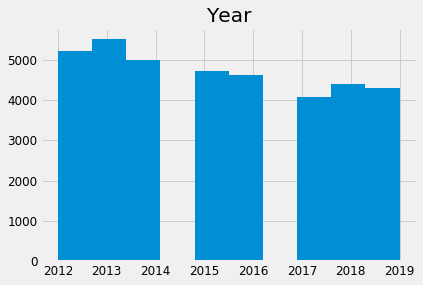

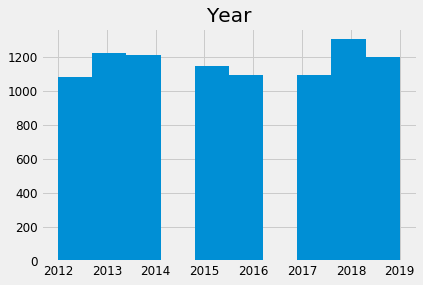

In [481]:
fw.groupby('Business').hist('Year')

Business
0    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
1    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
dtype: object

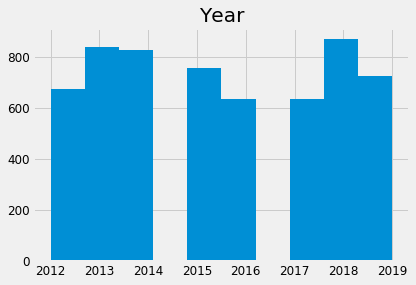

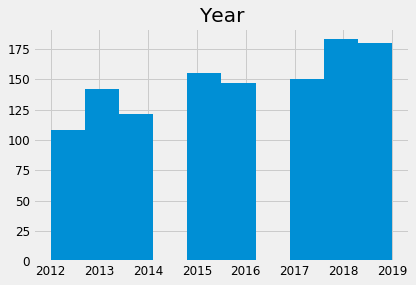

In [482]:
fh.groupby('Business').hist('Year')

Engineering
0    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
1    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
dtype: object

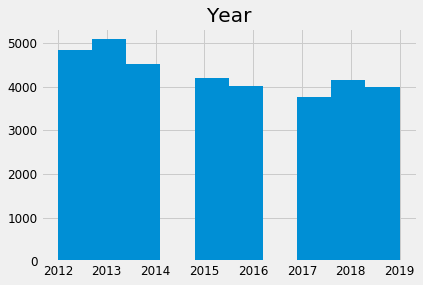

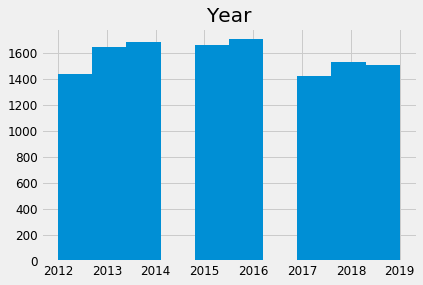

In [483]:
fw.groupby('Engineering').hist('Year')

Engineering
0    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
1    [[AxesSubplot(0.08,0.07;0.87x0.81)]]
dtype: object

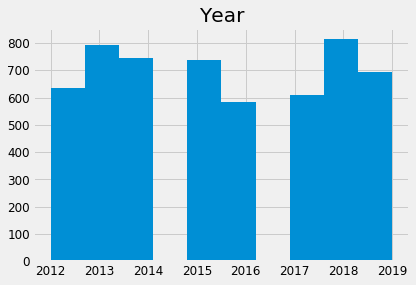

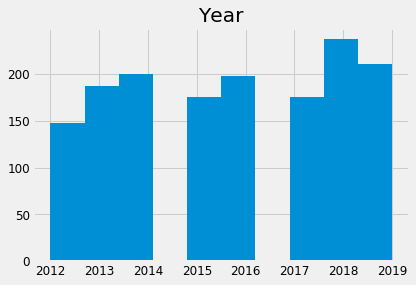

In [484]:
fh.groupby('Engineering').hist('Year')

The trend that is now obvious is that we have an increasing amount of female students over the years for engineering and business for hispanic students. This is important as the general trend does not depict this and therefore this will easily be overlooked.  

## 6. Final Analysis

After dividing the dataset into three distinct cohorts based on student types – domestic freshmen, domestic non-traditional, and international – we will be able to better analyze and dissect this data to allow further insight. 
The initial correlation analysis of the freshman data showed us that there is a positive correlation between in-state and admitted students and even stronger for in-state and enrolled students. When taking a closer look at female students, there was a negative correlation between female and enrolled, indicating that there were likely more male students enrolled vs. female students. The strongest negative correlation for female students was for the college of Engineering, yet the highest positive correlation was for the college of Arts & Sciences. <br>
When looking at this same analysis for the non-traditional students, there is a positive correlation between age and female students, indicating that female students tend to be older in this cohort. There is still the strong negative correlation between female and the college of Engineering, however, the positive correlation for females and the college of Arts & Sciences, while still existing, is not as strong as for freshmen. We also show a positive correlation for female students and Hispanic and a negative correlation for female students and degree seeking enrollment.<br>
When taking a direct correlation between the two features, male and age, for freshmen, we have a strong positive correlation while for non-traditional students we are showing a negative correlation confirming our previous assessment that non-traditional and younger students tend to be male vs. female. <br>
When performing a correlation analysis for male students and each of the colleges, the college of Business had a positive correlation for freshmen yet negative for non-traditional students. The college of Engineering had a strong positive correlation for both cohorts, again re-affirming our previous assessment of this being a predominately male college. The college of Arts & Sciences was negatively correlated for both cohorts, indicating a trend towards female students. <br>
Taking into account that we’d like to gleam insight into additional demographic factors, a correlation analysis for each ethnic group and male students is performed. This provides some interesting information, in that the female students may be underrepresented for the vast student body, however, when taking a look at specific ethnic groups, we can see that this is not the case across the board. For students who indicated being Hispanic, multi-racial, Native American, and Hawaiian Pacific Islander, they tended to be female vs. male for both, freshmen and non-traditional cohorts. This is an important insight when considering recruitment efforts in communities that have predominantly students of the above demographics. This may also be a consideration for a possible market when promoting programs in which currently mostly male students are enrolled. <br>
For the correlation analysis of the international student group, we are showing positive correlation for male white and Asian students, while for Hispanic students we again show a trend towards female. When looking at application numbers over the years, we can see that the trend in enrollment is downward, for female students for all three colleges. <br>
The models revealed and confirmed our correlation analysis in that generally male students are more dominant across the board. The recursive feature selection model performed the best, especially when looking at a diverse student group like non-traditional students for the college of Business or Engineering. At this point the model performed relatively well with an accuracy of almost 82%. 

## Storytelling

One of the main aspects of Enrollment Management is to ensure that students of all demographics are reached with the recruitment efforts of the university. Being able to analyze the current student body and depict which areas may be lacking students of a certain demographic, will allow Enrollment Management to strategize, focus, and refine recruitment efforts in the future. Furthermore, this ensures that a maximum number of prospect students can be reached and attracted to the university. Any increase in enrollment will in turn allow for an increase in the budget which has far-reaching influence across the university in regards to programs being offered, faculty and staff being employed to support students, as well as amenities provided. <br>
In this analysis, the focus was to see how the student population is made up between male vs. female students with a focus on three colleges, Business, Arts & Sciences, and Engineering. While the general consensus has been that some programs lack female students, it will be beneficial to see if we can gleam any insight of whether this is across the board for all demographics within such ‘traditional’ male colleges and programs. <br>
The results we have gathered that there are demographics that tend to be mostly  female allows us to market predominantly  male programs to this existing student group. For demographics that lack female representation, we can strategize to increase recruitment efforts in these markets towards the female population. Also, when taking a look exclusively at female students within specific demographics, the downward enrollment trend does not hold true. We can see that for the college of business, and even engineering, enrollment of hispanic female students actually increased over the years. This is an important find in that it allows us to perhaps use the model of recruitment efforts by the college of business and engineering and apply it to other colleges that experience a downward trend in this already underrepresented population. <br>
One of the most surprising and interesting finds of this analysis is that we actually have an increasing trend of female, hispanic students over the years, especially for the colleges of business and engineering, where the general consensus is that we have not only a downward trend in enrollment overall, but especially have an underrepresented female student body. <br>
This is an important point to mention in recruitment and diversity efforts of the strategic enrollment management efforts.